In [230]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)
library(dplyr)
library(readxl)

## <font color='#5CCD3A'>**1. Poblacion**</font>

In [231]:
dat <- read.csv("HAVD_Exo02.csv", fileEncoding = 'UTF-8')
# Leer el archivo Excel
cp <- read_excel("cp.xlsx")
dat$Dte. <- NULL
dat$TOTAL <- NULL
# Eliminar la primera observación del DataFrame 'dat'
dat <- dat[-1, ]
# Obtener la suma de todas las columnas excepto "Barris"
dat$poblacion <- rowSums(dat[, !names(dat) %in% "Barris"])
head(cp)
head(dat)

Barris,Codi_Postal
<chr>,<dbl>
1. el Raval,8001
2. el Barri Gòtic,8002
3. la Barceloneta,8003
"4. Sant Pere, Santa Caterina i la Ribera",8003
5. el Fort Pienc,8013
6. la Sagrada Família,8025


,Barris,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X92,X93,X94,X95,X96,X97,X98,X99,X100,poblacion
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2,1. el Raval,449,431,409,396,457,475,462,414,439,...,67,50,30,30,20,12,9,2,12,47986
3,2. el Barri Gòtic,99,97,93,88,99,97,89,81,82,...,36,27,25,11,9,11,3,0,11,16240
4,3. la Barceloneta,94,100,86,101,80,71,86,86,80,...,37,29,15,15,12,6,3,5,5,15101
5,"4. Sant Pere, Santa Caterina i la Ribera",177,168,166,145,166,164,145,138,181,...,42,31,28,12,9,6,8,5,14,22923
6,5. el Fort Pienc,251,266,268,240,281,238,262,241,246,...,73,75,49,44,31,17,16,7,14,32048
7,6. la Sagrada Família,395,406,405,343,375,361,345,338,343,...,166,115,80,84,53,34,22,13,24,51651


In [232]:
# Realizar la fusión por la variable "Barris"
merged_data <- merge(dat, cp, by = "Barris")

# Mostrar las primeras filas del conjunto de datos fusionado
head(merged_data)

,Barris,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X93,X94,X95,X96,X97,X98,X99,X100,poblacion,Codi_Postal
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1. el Raval,449,431,409,396,457,475,462,414,439,...,50,30,30,20,12,9,2,12,47986,8001
2,10. Sant Antoni,285,330,294,312,251,258,250,263,260,...,91,61,50,46,25,14,6,38,38412,8001
3,11. el Poble Sec - AEI Parc Montjuïc,363,349,345,318,319,314,301,329,332,...,66,50,28,21,15,9,15,10,40358,8004
4,12. la Marina del Prat Vermell - AEI Zona Franca,18,11,10,10,8,8,10,5,12,...,1,0,1,0,0,0,0,0,1151,8039
5,13. la Marina de Port,234,260,243,261,264,274,267,291,331,...,39,30,18,14,8,5,4,6,30622,8019
6,14. la Font de la Guatlla,84,67,77,75,68,60,77,75,75,...,18,24,13,6,2,7,9,3,10422,8028


## <font color='#5CCD3A'>**2. Consumo electrico**</font>

In [233]:
data_2019 = read.csv(file='2019_consum_electricitat_bcn.csv', header=TRUE, sep=',', dec='.', fileEncoding = 'UTF-8')
data_2020 = read.csv(file='2020_consum_electricitat_bcn.csv', header=TRUE, sep=',', dec='.', fileEncoding = 'UTF-8')
data_2021 = read.csv(file='2021_consum_electricitat_bcn.csv', header=TRUE, sep=',', dec='.', fileEncoding = 'UTF-8')
data_2022 = read.csv(file='2022_consum_electricitat_bcn.csv', header=TRUE, sep=',', dec='.', fileEncoding = 'UTF-8')
data_2023 = read.csv(file='2023_consum_electricitat_bcn.csv', header=TRUE, sep=',', dec='.', fileEncoding = 'UTF-8')

In [234]:
# Convertir la Data a formato de Data en R
data_2019$Data <- as.Date(data_2019$Data)
data_2020$Data <- as.Date(data_2020$Data)
data_2021$Data <- as.Date(data_2021$Data)
data_2022$Data <- as.Date(data_2022$Data)
data_2023$Data <- as.Date(data_2023$Data)

#Mergeamos las bases de datos
# Combina los dataframes en uno solo
valor_diario_total <- rbind(data_2019, 
                            data_2020, 
                            data_2021, 
                            data_2022, 
                            data_2023)

# Agrupar y sumar por las variables especificadas
aggregated_data <- valor_diario_total %>%
  filter(Sector_Economic == "Residencial") %>%
  group_by(Data, Codi_Postal, Sector_Economic) %>%
  summarize(Valor_total = sum(Valor))

# Mostrar las primeras filas del conjunto de datos agregado
head(aggregated_data)

`summarise()` has grouped output by 'Data', 'Codi_Postal'. You can override
using the `.groups` argument.


Data,Codi_Postal,Sector_Economic,Valor_total
<date>,<int>,<chr>,<int>
2019-01-01,8001,Residencial,156961
2019-01-01,8002,Residencial,121080
2019-01-01,8003,Residencial,186718
2019-01-01,8004,Residencial,183584
2019-01-01,8005,Residencial,230079
2019-01-01,8006,Residencial,143924


## <font color='#5CCD3A'>**3. Consumo electrico y poblacion**</font>

In [235]:
# Realizar la fusión por la variable "Codi_Postal"
merged_data2 <- merged_data %>%
  select(Barris, Codi_Postal, poblacion)
datos <- merge(aggregated_data, merged_data2, by = "Codi_Postal")

library(dplyr)

# Ordenar los datos por la variable "Data" en orden ascendente
datos_ordenados <- datos %>%
  arrange(Data)

# Mostrar las primeras filas del conjunto de datos ordenado
head(datos_ordenados)

,Codi_Postal,Data,Sector_Economic,Valor_total,Barris,poblacion
,<int>,<date>,<chr>,<int>,<chr>,<dbl>
1,8001,2019-01-01,Residencial,156961,1. el Raval,47986
2,8001,2019-01-01,Residencial,156961,10. Sant Antoni,38412
3,8002,2019-01-01,Residencial,121080,2. el Barri Gòtic,16240
4,8003,2019-01-01,Residencial,186718,3. la Barceloneta,15101
5,8003,2019-01-01,Residencial,186718,"4. Sant Pere, Santa Caterina i la Ribera",22923
6,8004,2019-01-01,Residencial,183584,11. el Poble Sec - AEI Parc Montjuïc,40358


In [236]:
# Agrupar y sumar por las variables especificadas
aggregated_data2 <- datos_ordenados %>%
  group_by(Data, Codi_Postal, Sector_Economic, Valor_total) %>%
  summarize(poblacion_total = sum(poblacion))

head(aggregated_data2)

`summarise()` has grouped output by 'Data', 'Codi_Postal', 'Sector_Economic'.
You can override using the `.groups` argument.


Data,Codi_Postal,Sector_Economic,Valor_total,poblacion_total
<date>,<int>,<chr>,<int>,<dbl>
2019-01-01,8001,Residencial,156961,86398
2019-01-01,8002,Residencial,121080,16240
2019-01-01,8003,Residencial,186718,38024
2019-01-01,8004,Residencial,183584,40358
2019-01-01,8005,Residencial,230079,43335
2019-01-01,8013,Residencial,325965,32048


In [237]:
aggregated_data2$consumo_per_capita <- aggregated_data2$Valor_total / aggregated_data2$poblacion_total
head(aggregated_data2)

Data,Codi_Postal,Sector_Economic,Valor_total,poblacion_total,consumo_per_capita
<date>,<int>,<chr>,<int>,<dbl>,<dbl>
2019-01-01,8001,Residencial,156961,86398,1.816720
2019-01-01,8002,Residencial,121080,16240,7.455665
2019-01-01,8003,Residencial,186718,38024,4.910530
2019-01-01,8004,Residencial,183584,40358,4.548887
2019-01-01,8005,Residencial,230079,43335,5.309311
2019-01-01,8013,Residencial,325965,32048,10.171150


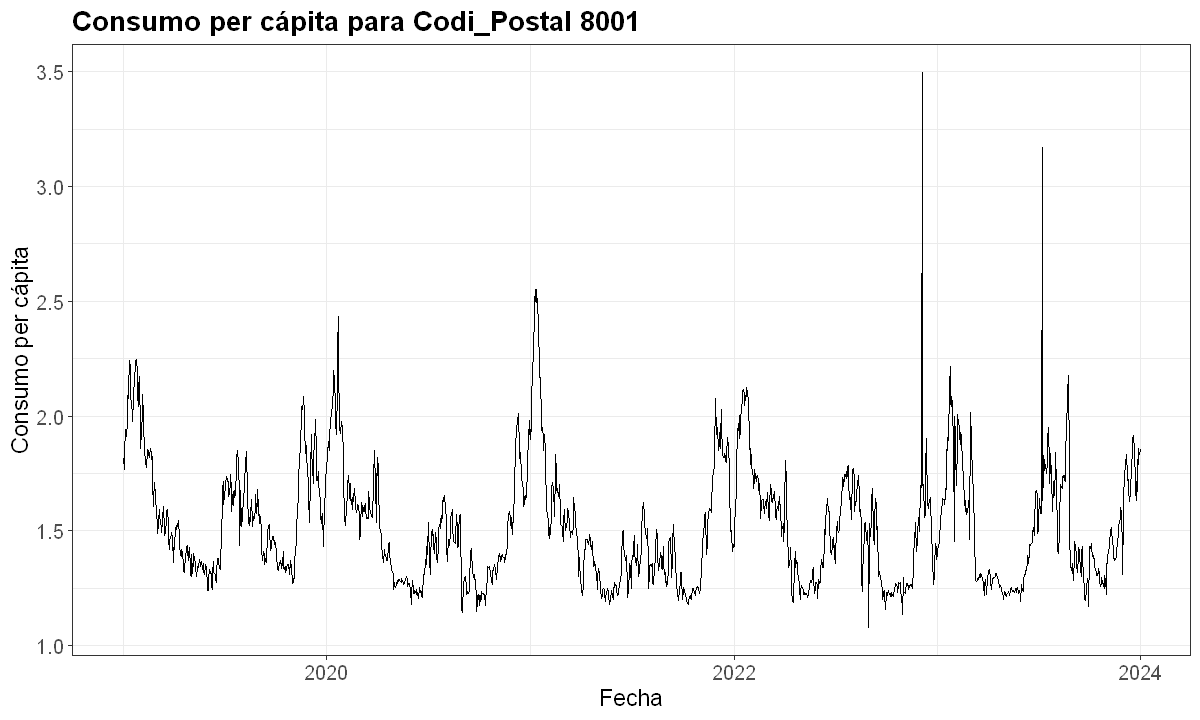

In [238]:
library(ggplot2)

# Establecer el tamaño del gráfico
options(repr.plot.width=10, repr.plot.height=6) # Puedes ajustar estos valores según tu preferencia

# Filtrar datos para Codi_Postal igual a 8001
datos_cp_8001 <- aggregated_data2 %>% 
  filter(Codi_Postal == 8001)

# Crear el gráfico de líneas
ggplot(data = datos_cp_8001, aes(x = Data, y = consumo_per_capita)) +
  geom_line() +
  labs(x = "Fecha", y = "Consumo per cápita", title = "Consumo per cápita para Codi_Postal 8001") +
  theme_bw() + # Opcional: Establecer el tema de fondo blanco
  theme(
    plot.title = element_text(size = 16, face = "bold"),  # Tamaño y estilo del título
    axis.title = element_text(size = 14),  # Tamaño del texto de los ejes
    axis.text = element_text(size = 12),   # Tamaño del texto de las etiquetas de los ejes
    legend.title = element_text(size = 12),  # Tamaño del texto de la leyenda
    legend.text = element_text(size = 10)    # Tamaño del texto dentro de la leyenda
  )


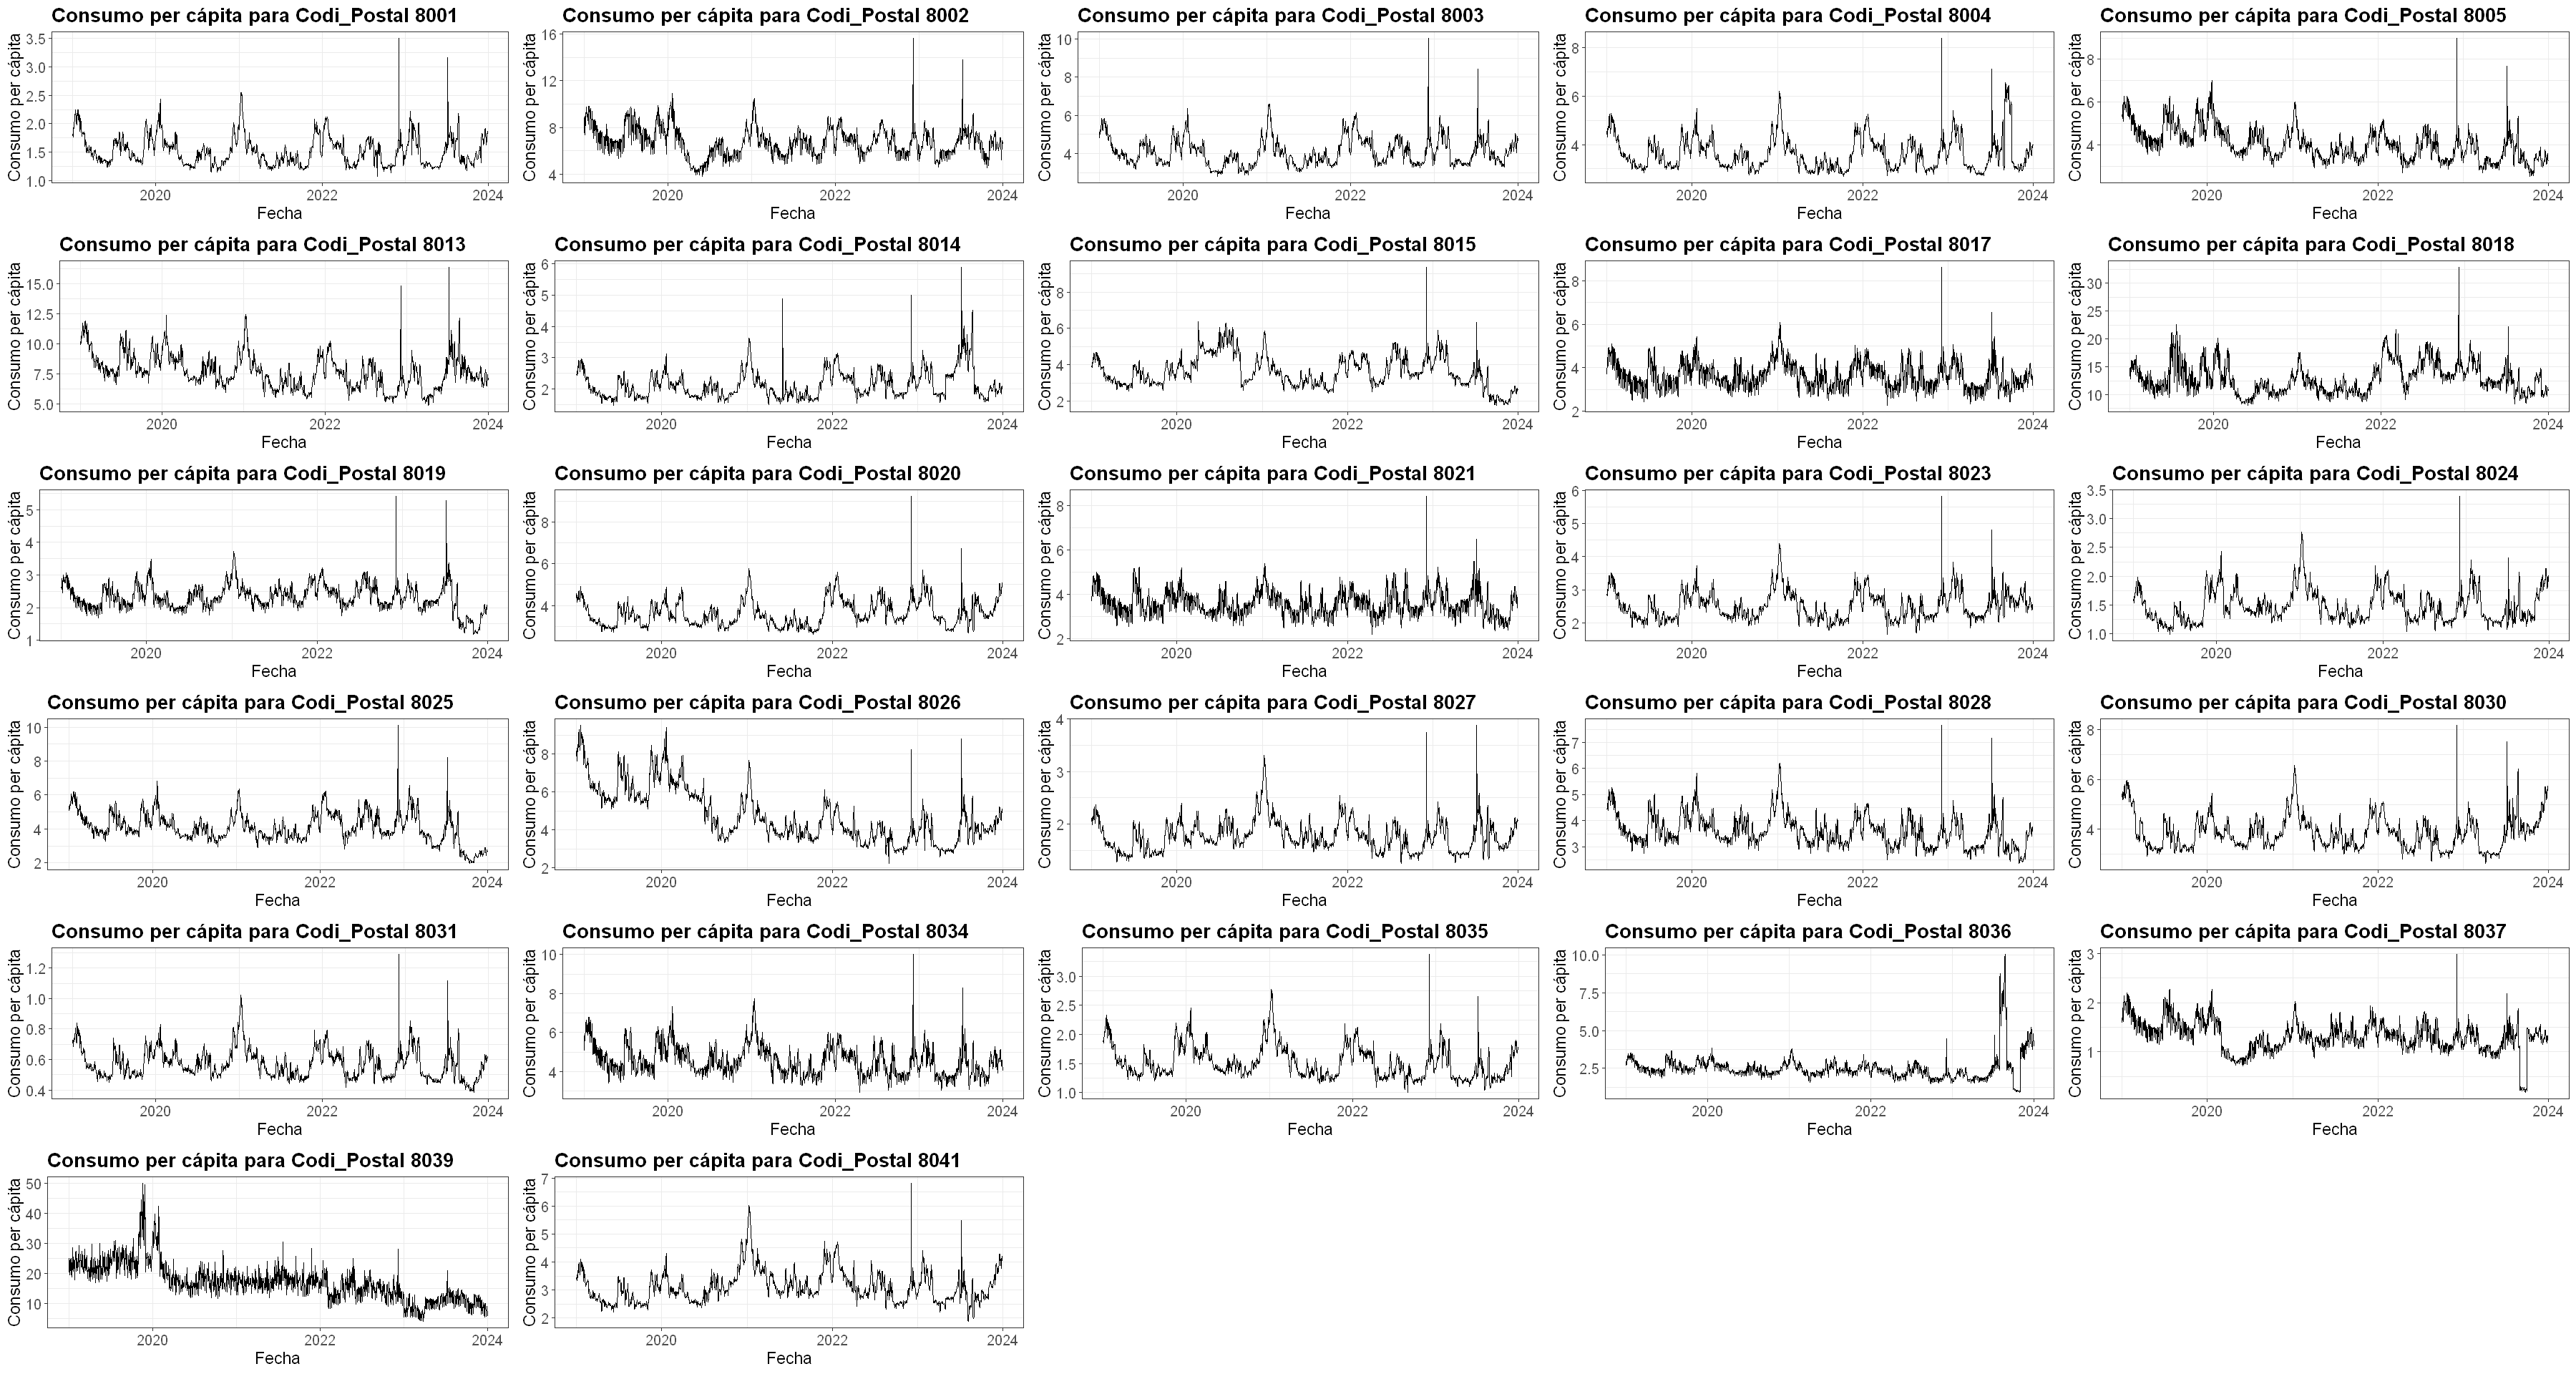

In [239]:
library(ggplot2)

# Establecer el tamaño del gráfico
options(repr.plot.width=30, repr.plot.height=16) # Ajusta los valores según tu preferencia

# Obtener los valores únicos de Codi_Postal
codigos_postales <- unique(aggregated_data2$Codi_Postal)

# Crear una lista para almacenar los gráficos
lista_graficos <- list()

# Iterar sobre cada código postal
for (cp in codigos_postales) {
  # Filtrar datos para el código postal actual
  datos_cp <- aggregated_data2 %>% filter(Codi_Postal == cp)
  
  # Crear el gráfico de líneas para el código postal actual y guardarlo en la lista
  grafico <- ggplot(data = datos_cp, aes(x = Data, y = consumo_per_capita)) +
    geom_line() +
    labs(x = "Fecha", y = "Consumo per cápita", title = paste("Consumo per cápita para Codi_Postal", cp)) +
    theme_bw() +
    theme(
      plot.title = element_text(size = 16, face = "bold"),
      axis.title = element_text(size = 14),
      axis.text = element_text(size = 12),
      legend.title = element_text(size = 12),
      legend.text = element_text(size = 10)
    )
  
  # Agregar el gráfico a la lista
  lista_graficos[[as.character(cp)]] <- grafico
}

# Mostrar los gráficos en una cuadrícula
gridExtra::grid.arrange(grobs = lista_graficos)


### <font color='#5CCD3A'>**3.1 ARIMA**</font>

In [240]:
head(aggregated_data2)

Data,Codi_Postal,Sector_Economic,Valor_total,poblacion_total,consumo_per_capita
<date>,<int>,<chr>,<int>,<dbl>,<dbl>
2019-01-01,8001,Residencial,156961,86398,1.816720
2019-01-01,8002,Residencial,121080,16240,7.455665
2019-01-01,8003,Residencial,186718,38024,4.910530
2019-01-01,8004,Residencial,183584,40358,4.548887
2019-01-01,8005,Residencial,230079,43335,5.309311
2019-01-01,8013,Residencial,325965,32048,10.171150


En este código:

Primero, convertimos la columna Data a un tipo de dato fecha para que R reconozca que se trata de una serie temporal.
Luego, creamos una serie temporal (ts_data) con los datos de consumo per cápita.
Ajustamos un modelo ARIMA automáticamente a los datos utilizando la función auto.arima().
Finalmente, hacemos predicciones para los 12 meses de 2024 utilizando la función forecast(), con h = 12 especificando que queremos predecir los próximos 12 meses.

#### <font color='#5CCD3A'>**3.1.1 CP 8001**</font>

In [241]:
tail(datos_cp_8001)

Data,Codi_Postal,Sector_Economic,Valor_total,poblacion_total,consumo_per_capita
<date>,<int>,<chr>,<int>,<dbl>,<dbl>
2023-12-26,8001,Residencial,146965,86398,1.701023
2023-12-27,8001,Residencial,156596,86398,1.812496
2023-12-28,8001,Residencial,154779,86398,1.791465
2023-12-29,8001,Residencial,160755,86398,1.860633
2023-12-30,8001,Residencial,158429,86398,1.833711
2023-12-31,8001,Residencial,160368,86398,1.856154


        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 153       1.834144 1.714130 1.954158 1.650598 2.017689
Apr 153       1.822521 1.676673 1.968369 1.599465 2.045576
May 153       1.812662 1.648268 1.977056 1.561243 2.064081
Jun 153       1.803129 1.623112 1.983145 1.527818 2.078440
Jul 153       1.793910 1.600422 1.987397 1.497996 2.089823
Aug 153       1.784995 1.579708 1.990281 1.471036 2.098954
Sep 153       1.776373 1.560636 1.992111 1.446431 2.106316
Oct 153       1.768037 1.542965 1.993109 1.423819 2.112255
Nov 153       1.759975 1.526511 1.993438 1.402923 2.117026
Dec 153       1.752178 1.511132 1.993225 1.383529 2.120828
Jan 154       1.744639 1.496711 1.992568 1.365466 2.123813
Feb 154       1.737349 1.483154 1.991544 1.348591 2.126106


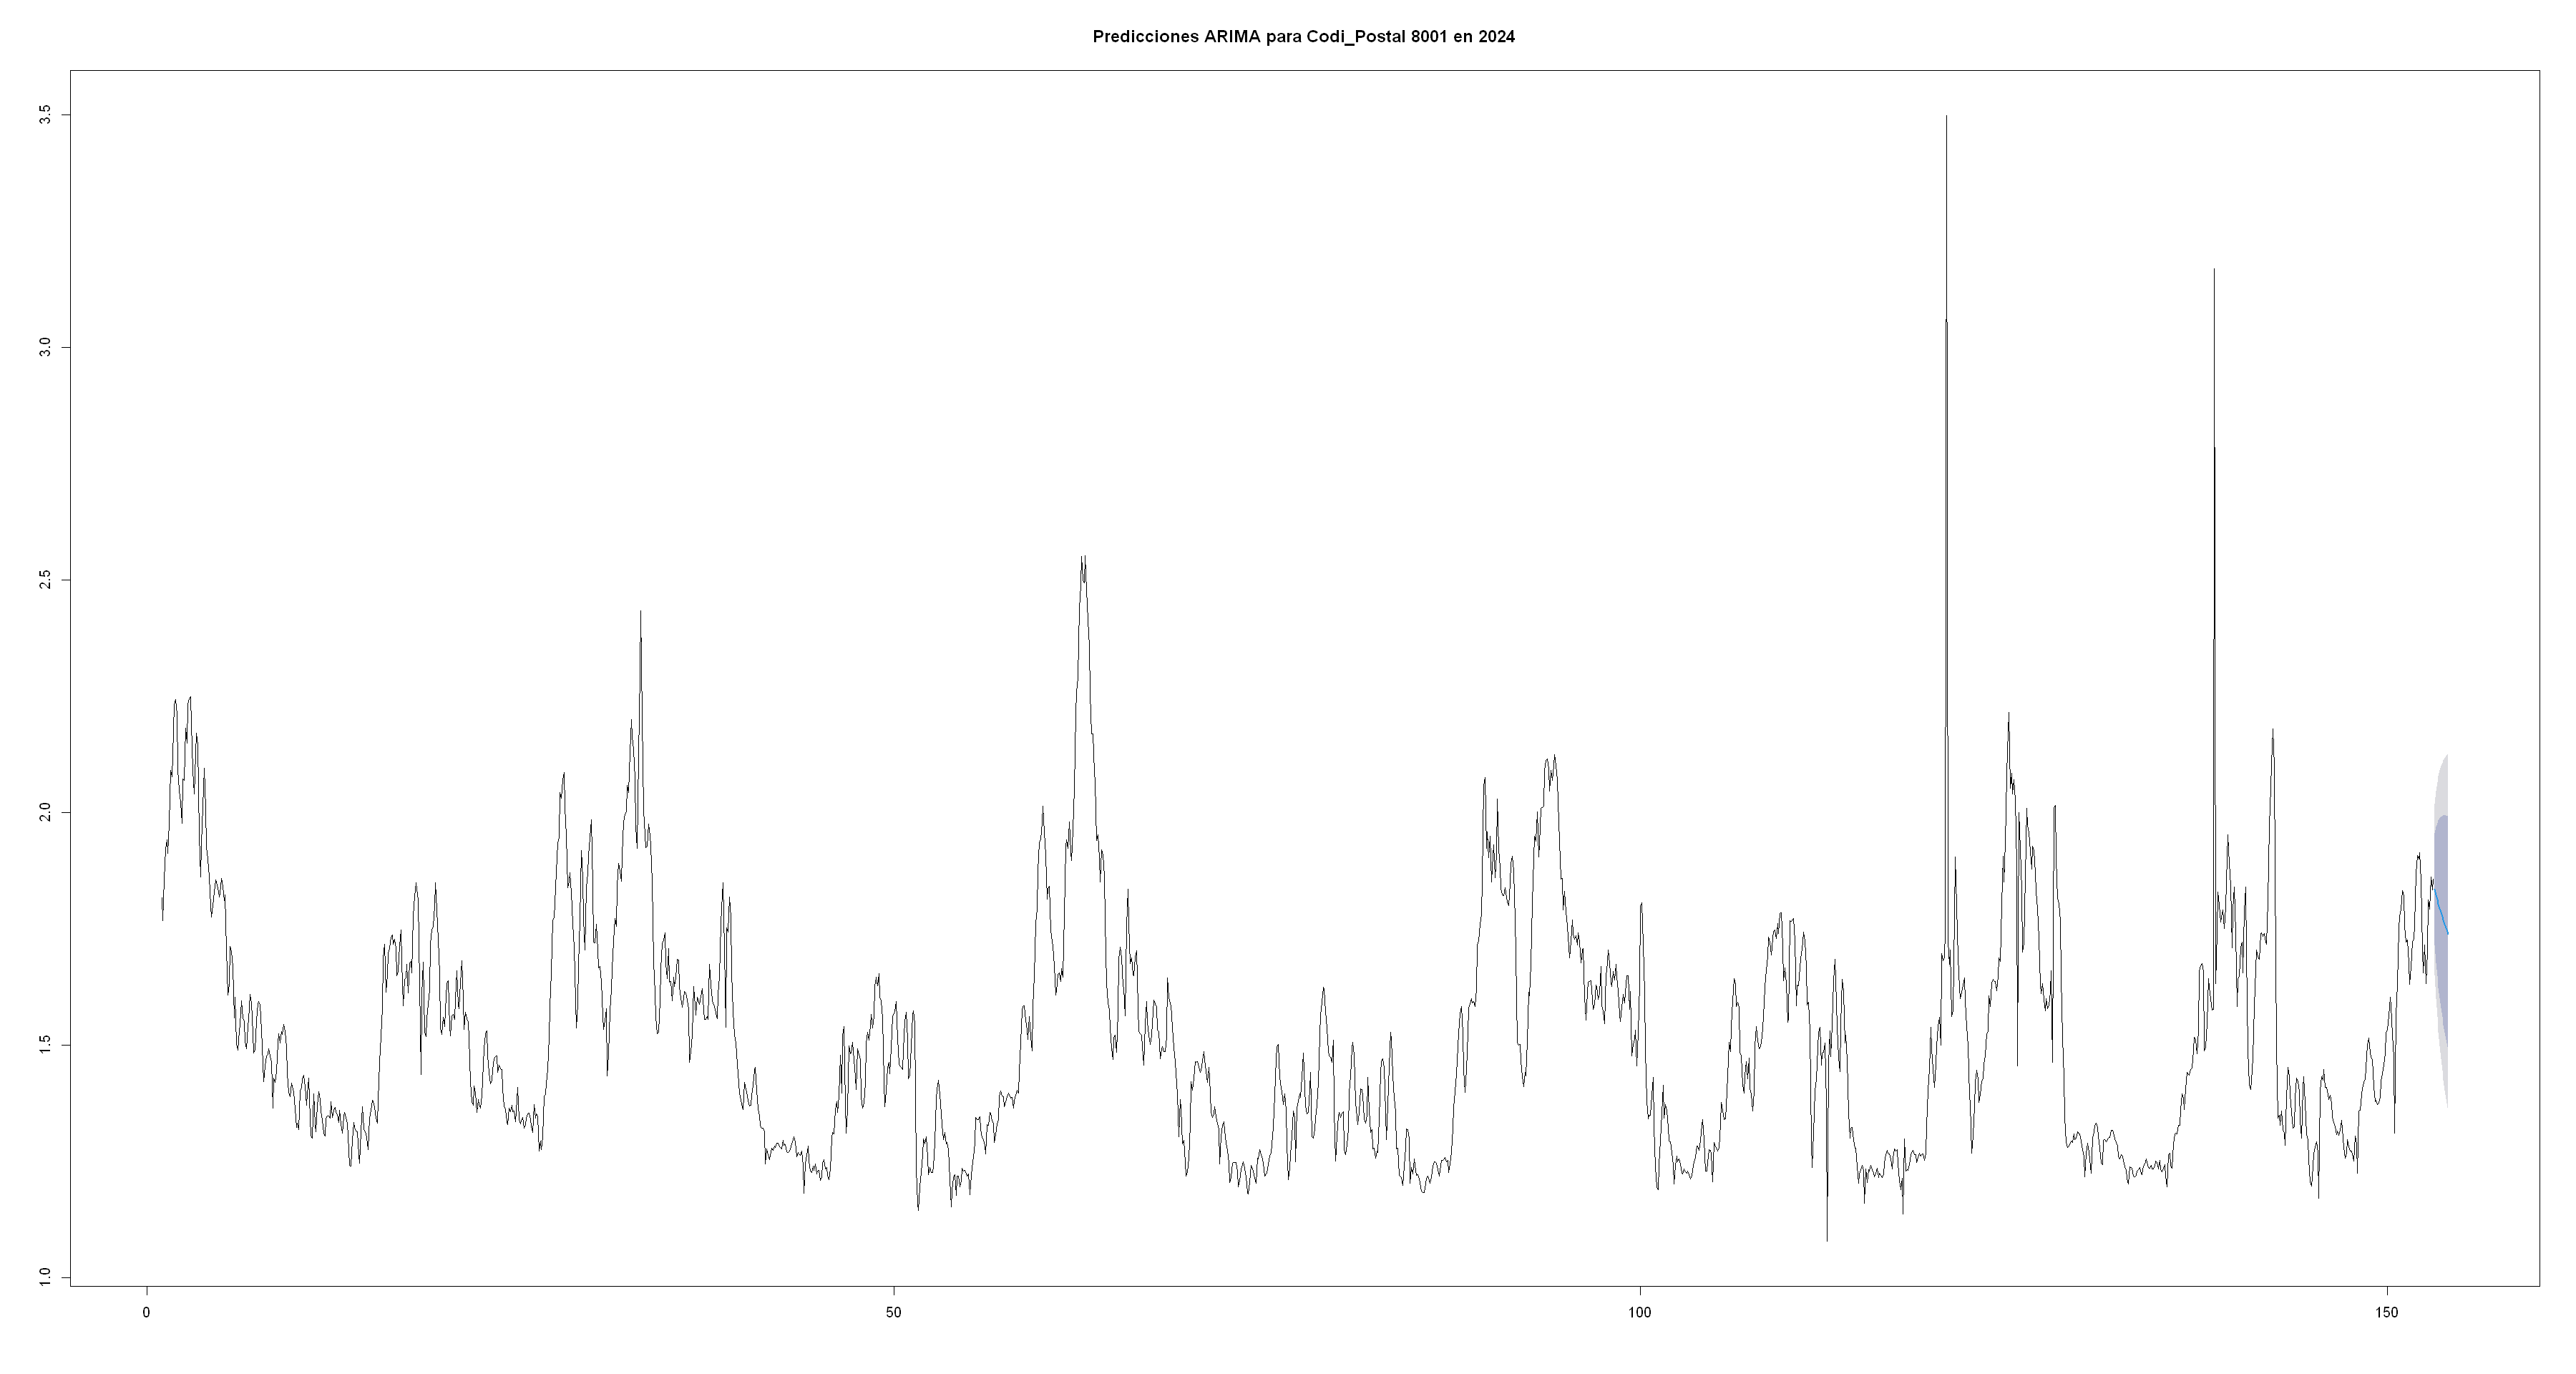

In [242]:
library(forecast)

# Convertir la columna Data a tipo de dato fecha
datos_cp_8001$Data <- as.Date(datos_cp_8001$Data)

# Crear una serie temporal con los datos
ts_data_cp_8001 <- ts(datos_cp_8001$consumo_per_capita, frequency = 12)

# Ajustar el modelo ARIMA a los datos
arima_model_cp_8001 <- auto.arima(ts_data_cp_8001)

# Hacer predicciones para 2024
predictions_2024_cp_8001 <- forecast(arima_model_cp_8001, h = 12)  # Predicciones para los 12 meses de 2024

# Mostrar las predicciones
print(predictions_2024_cp_8001)
# Graficar el modelo ARIMA y las predicciones
plot(predictions_2024_cp_8001, main = "Predicciones ARIMA para Codi_Postal 8001 en 2024")


Las variables "Point Forecast", "Lo 80", "Hi 80", "Lo 95" y "Hi 95" son los resultados típicos de un intervalo de predicción generado por el modelo de predicción, en este caso, un modelo ARIMA. Aquí está el significado de cada una:

Point Forecast: Es la predicción puntual del valor esperado para el período de tiempo dado. En otras palabras, es la estimación central de la serie de tiempo para el momento en cuestión.

Lo 80: Es el límite inferior del intervalo de predicción del 80%. Esto significa que hay un 80% de probabilidad de que el valor real se encuentre por encima de este límite.

Hi 80: Es el límite superior del intervalo de predicción del 80%. Similarmente, hay un 80% de probabilidad de que el valor real se encuentre por debajo de este límite.

Lo 95: Es el límite inferior del intervalo de predicción del 95%. Ahora, hay un 95% de probabilidad de que el valor real se encuentre por encima de este límite.

Hi 95: Es el límite superior del intervalo de predicción del 95%. Y hay un 95% de probabilidad de que el valor real se encuentre por debajo de este límite.

Estos intervalos son útiles para comprender la incertidumbre asociada con las predicciones. Cuanto más amplio sea el intervalo, mayor será la incertidumbre en la predicción.

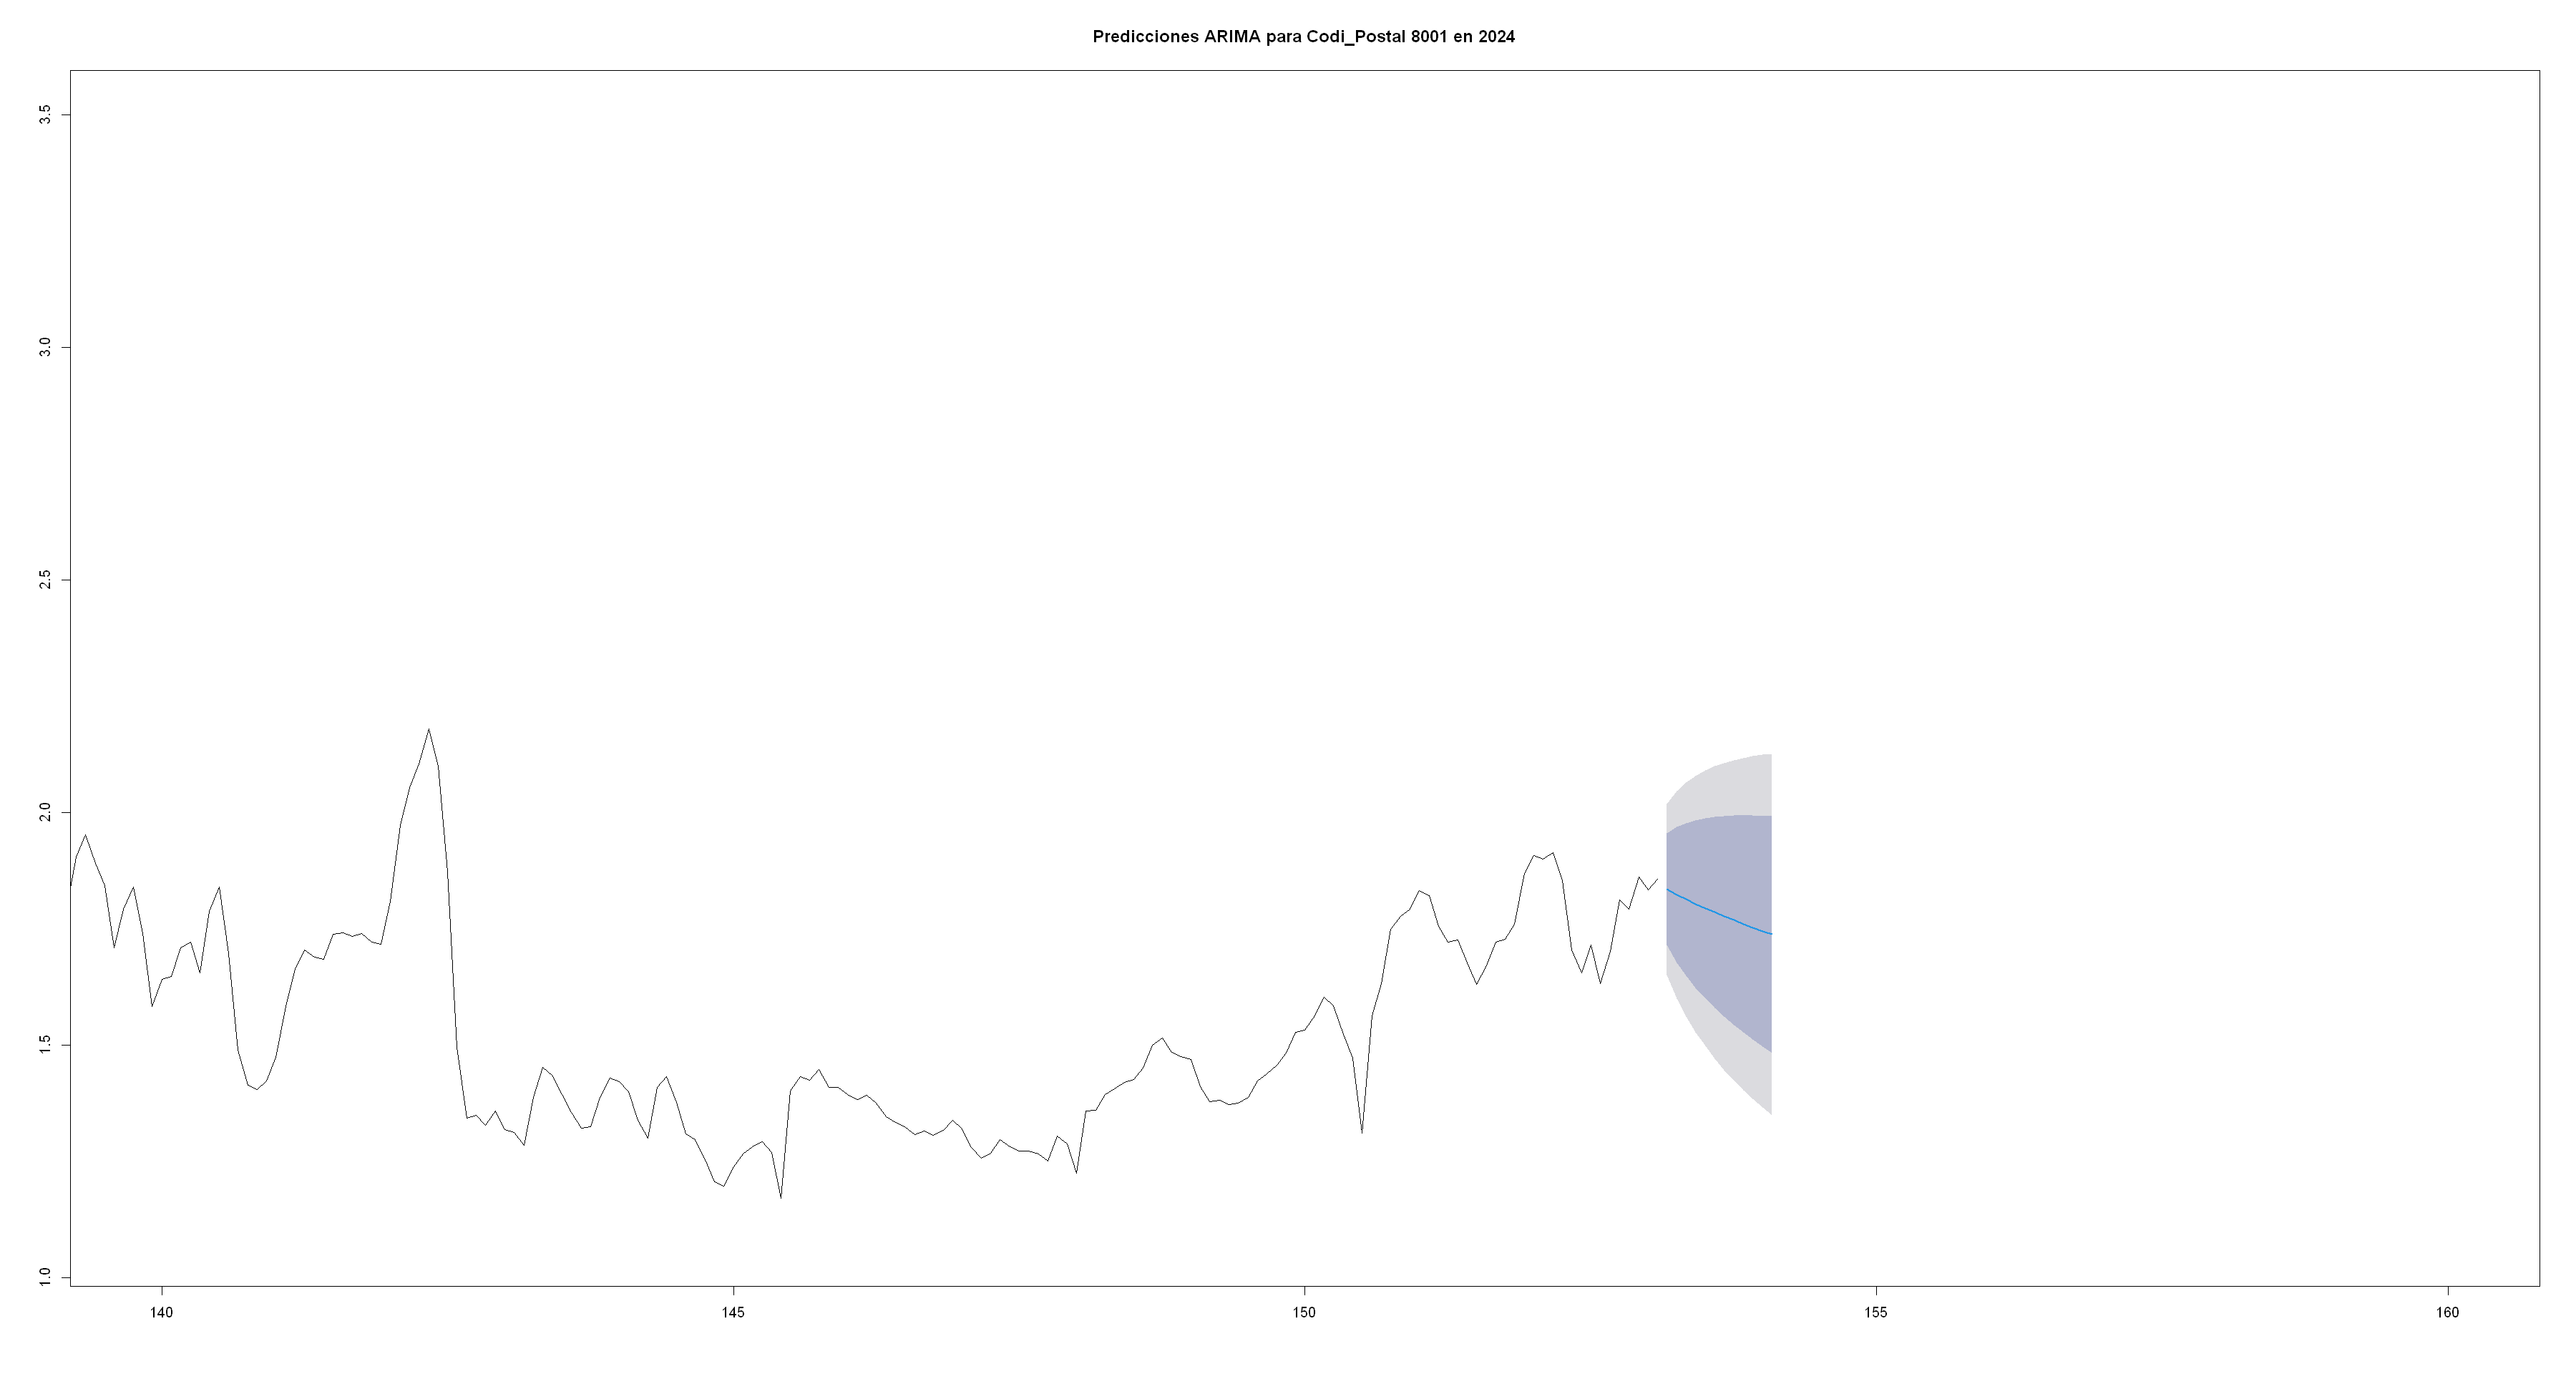

In [243]:
# Graficar el modelo ARIMA y las predicciones con límites específicos en el eje y
plot(predictions_2024_cp_8001, main = "Predicciones ARIMA para Codi_Postal 8001 en 2024", xlim = c(140, 160))


#### <font color='#5CCD3A'>**3.2 ARIMA para todos los CP de Barcelona**</font>

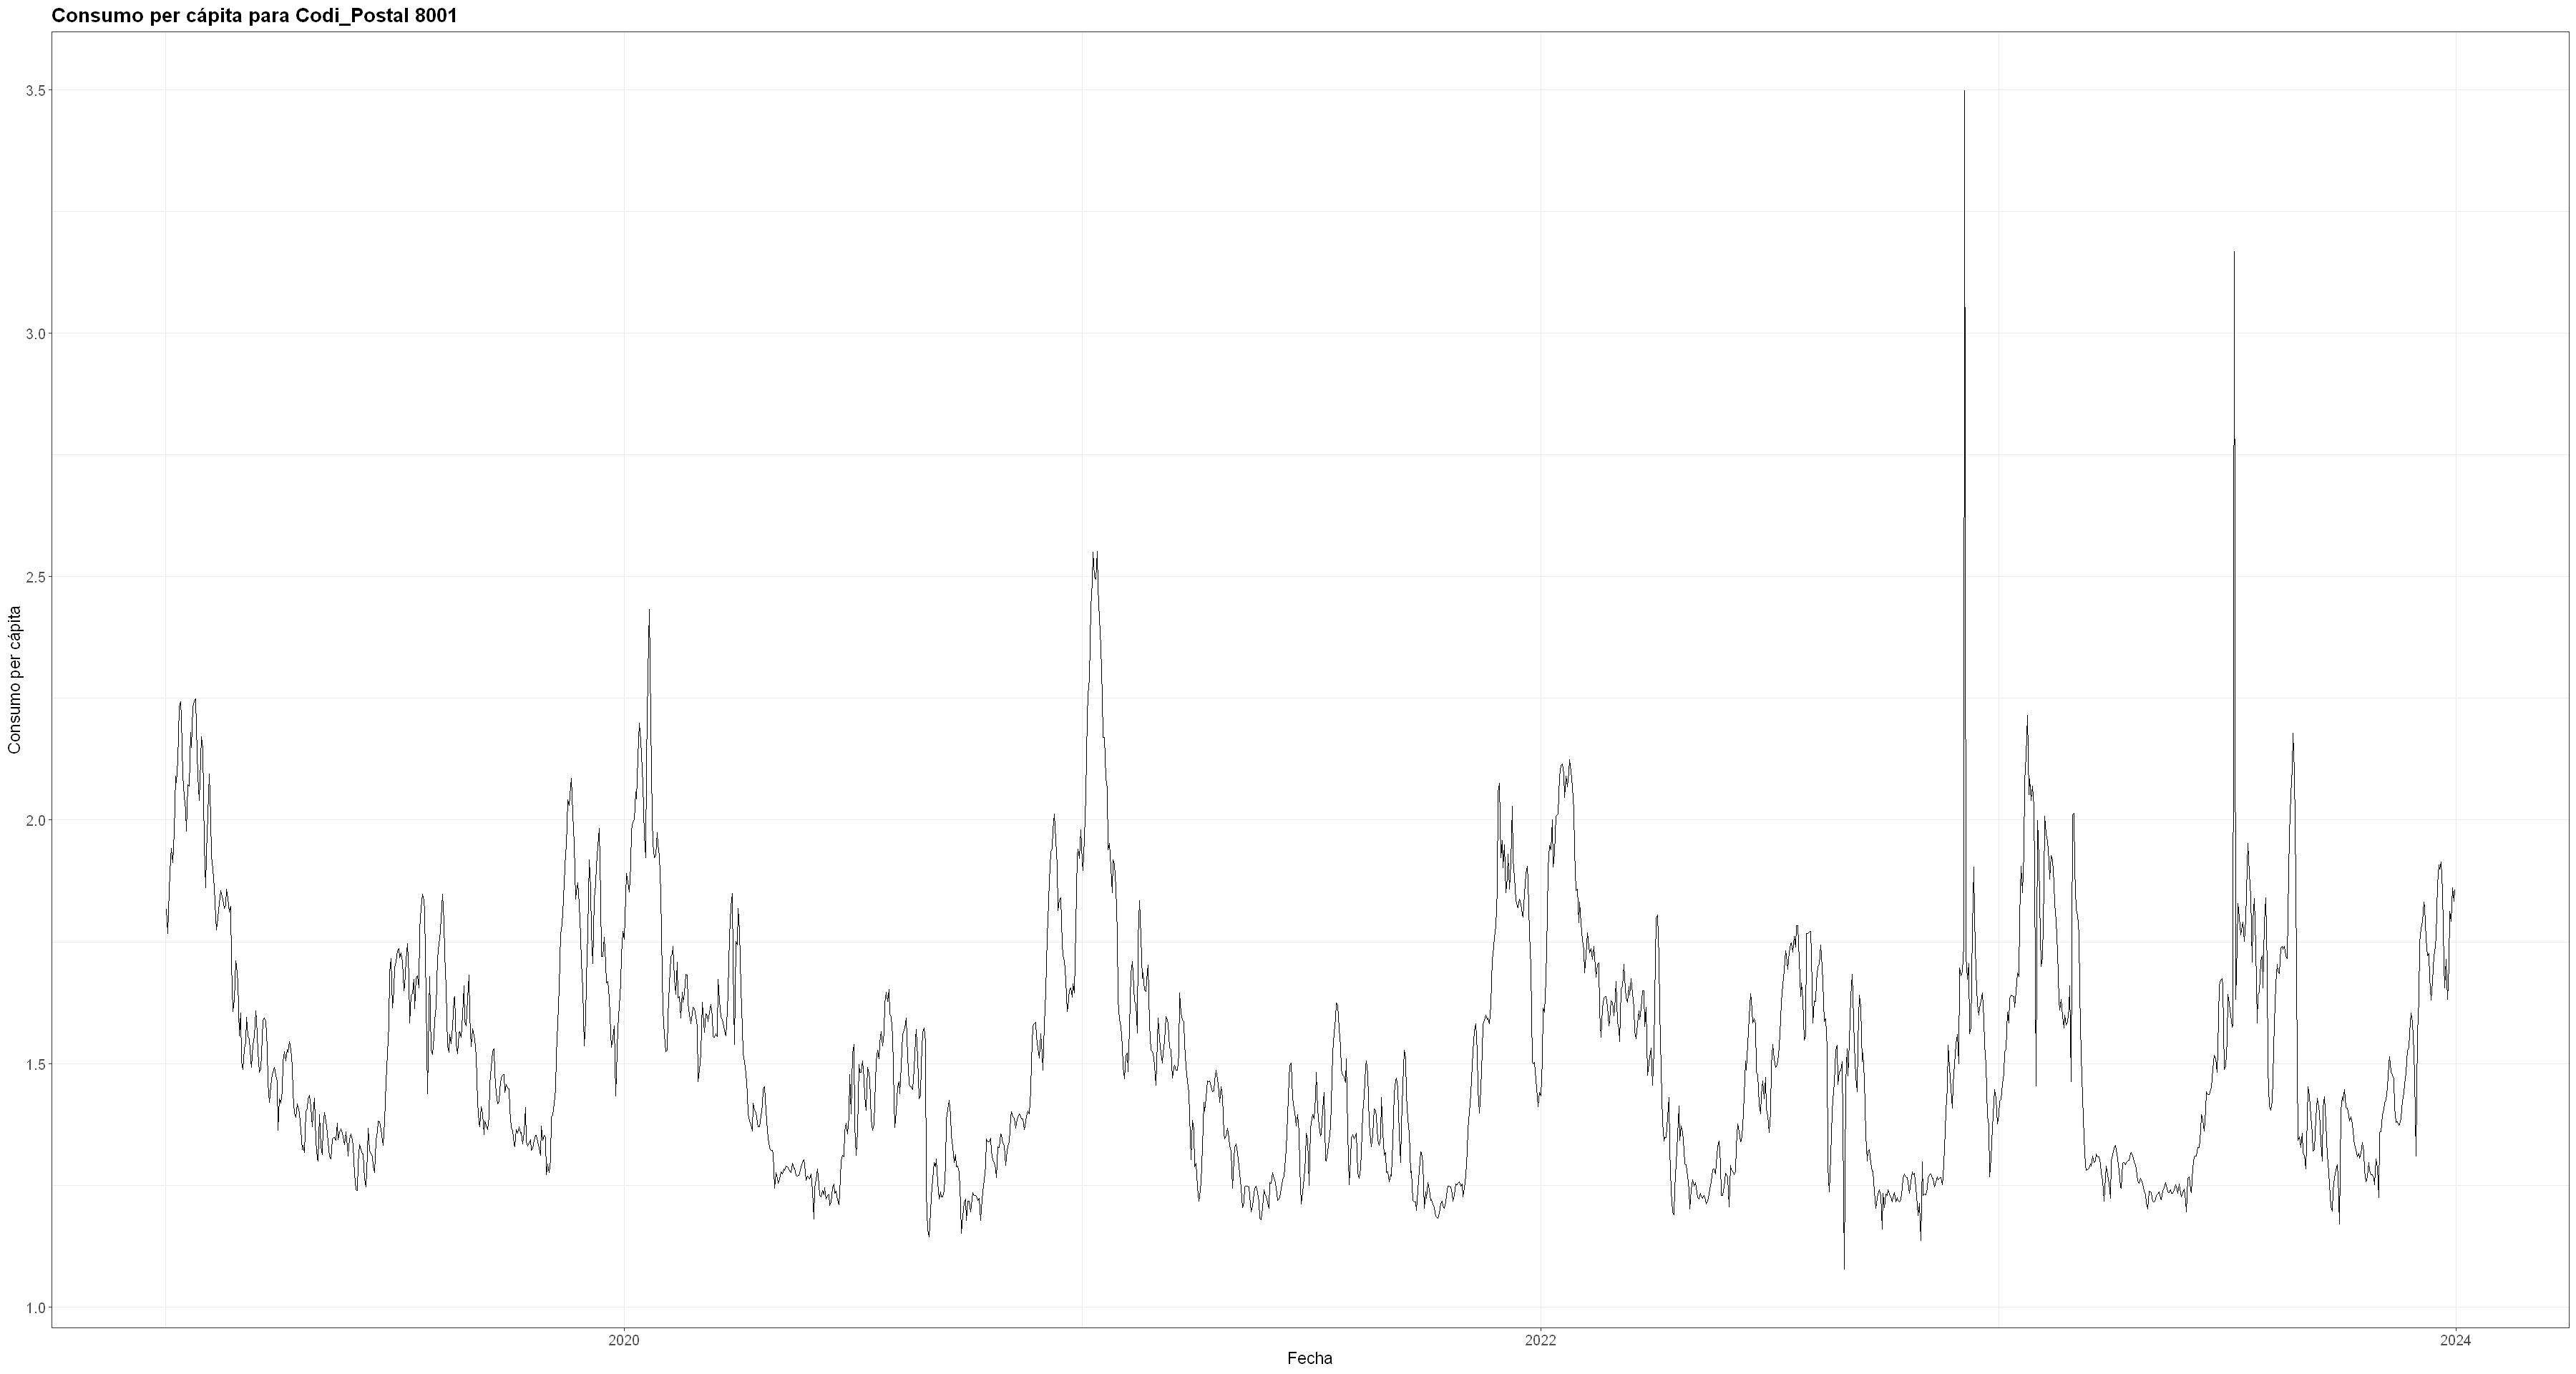

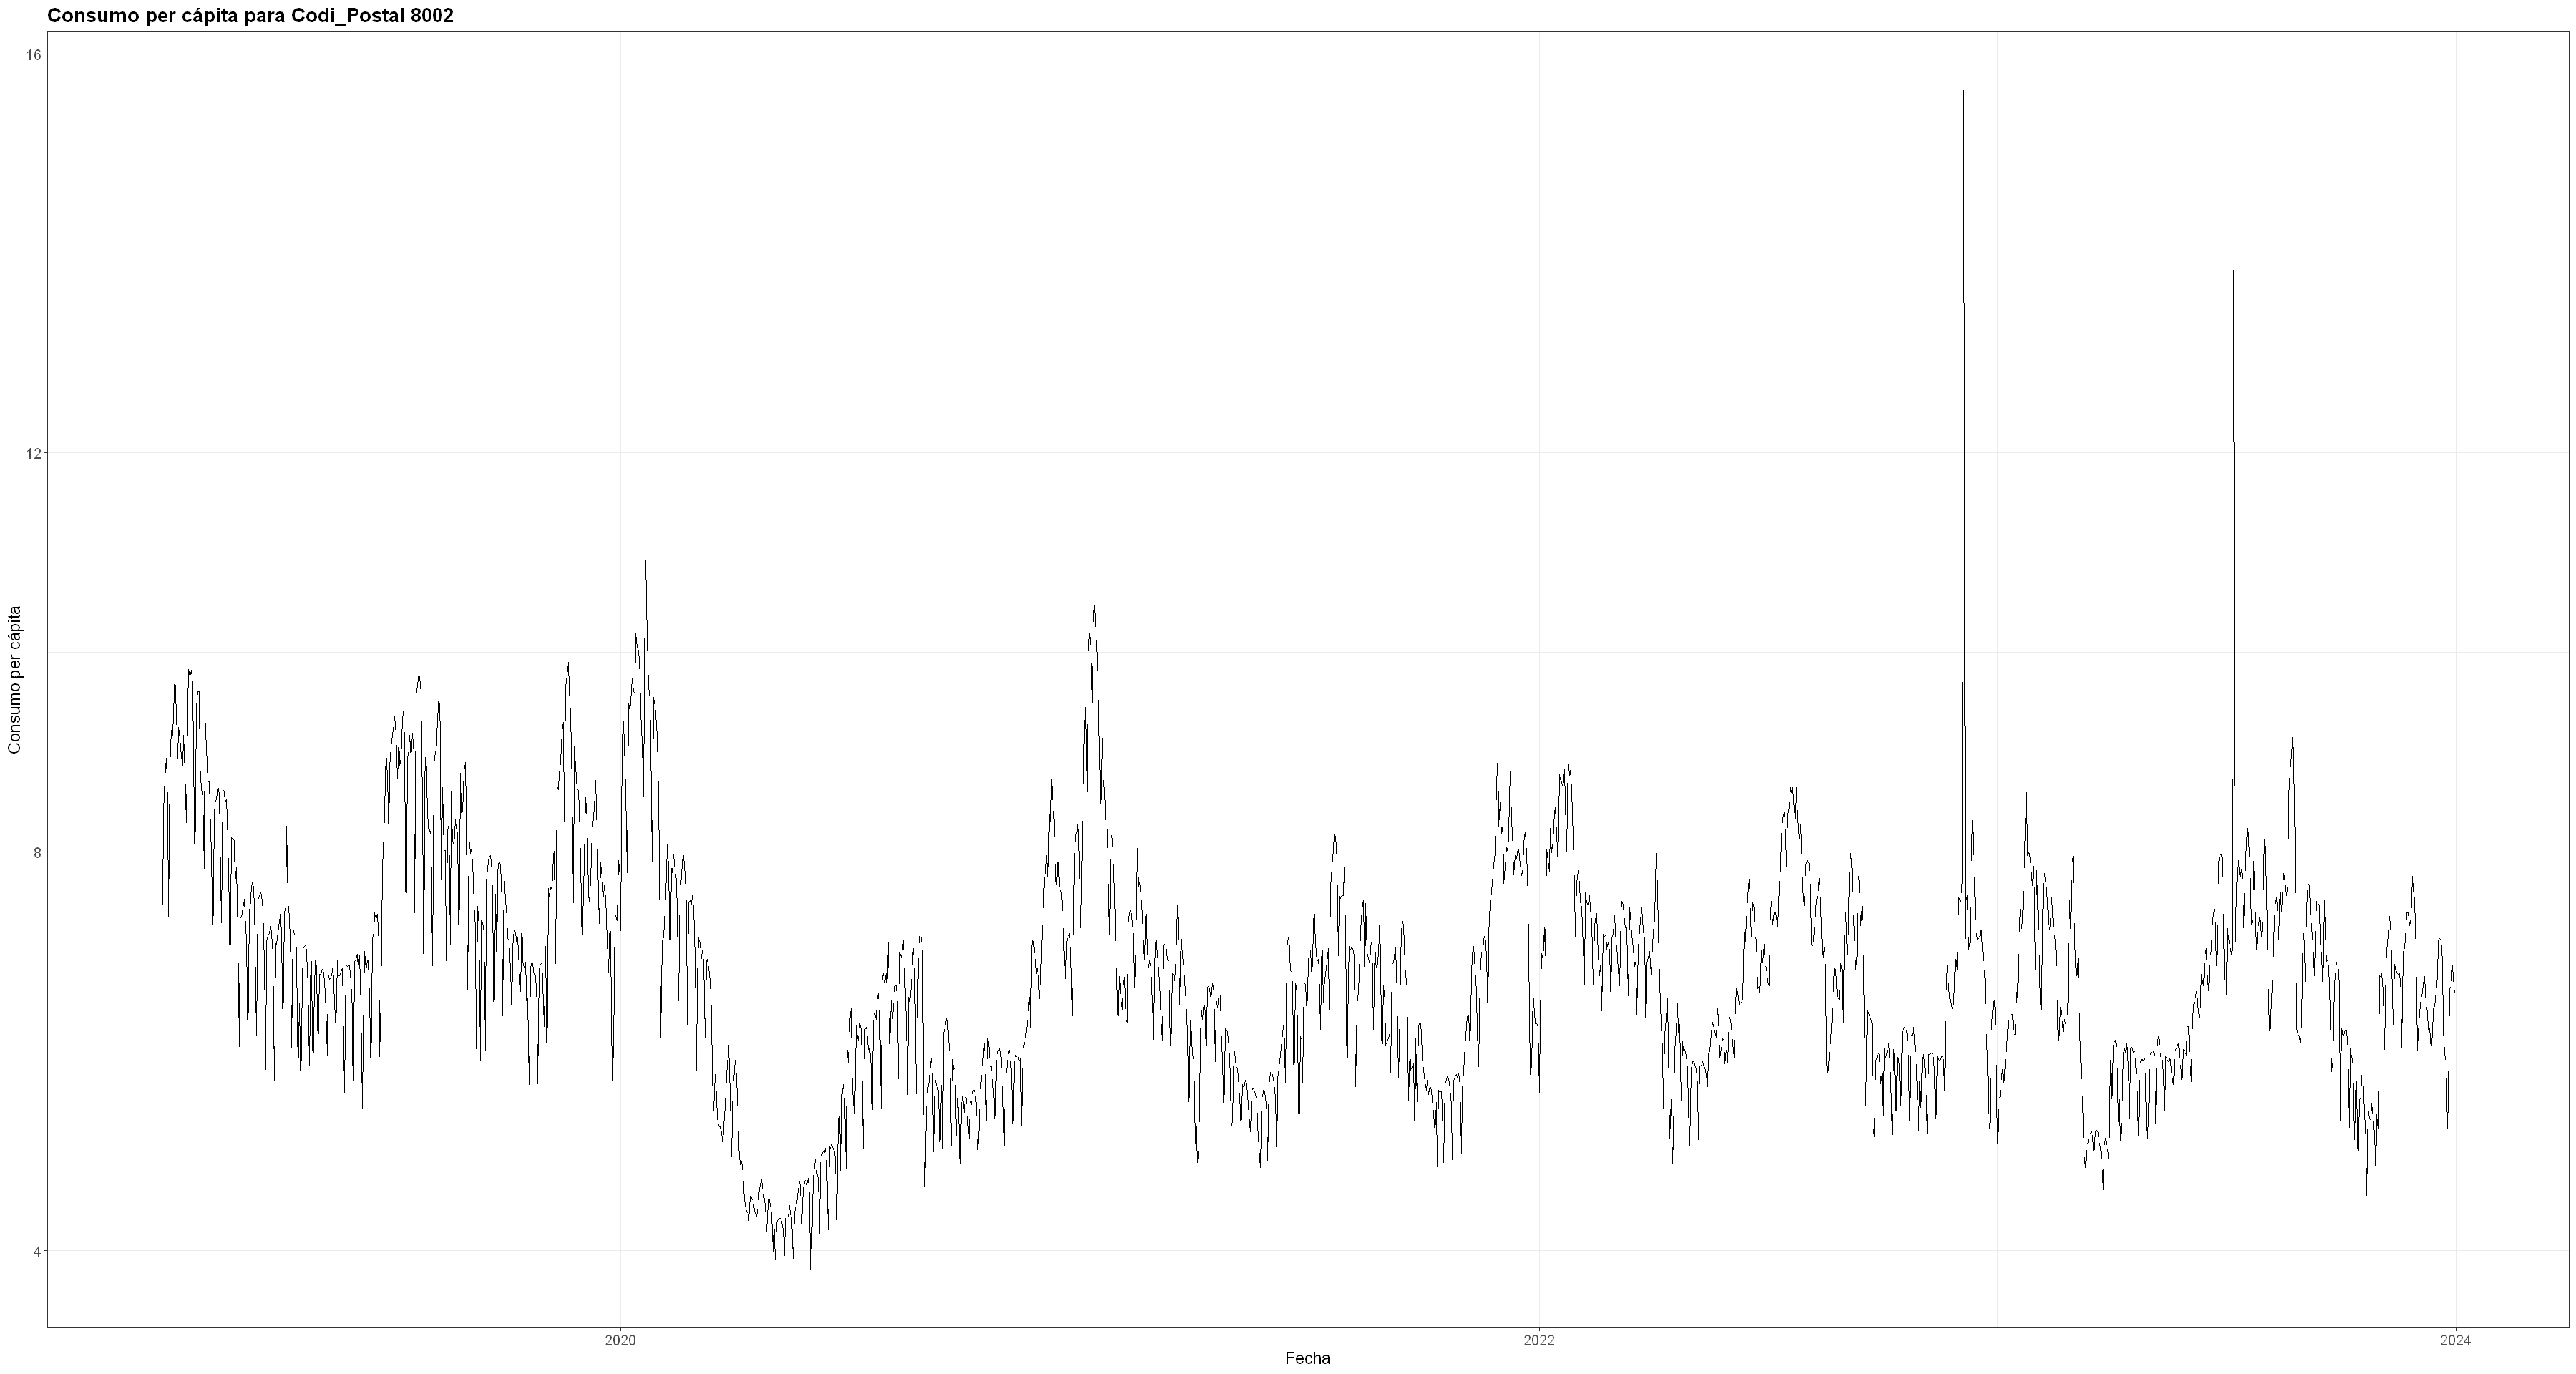

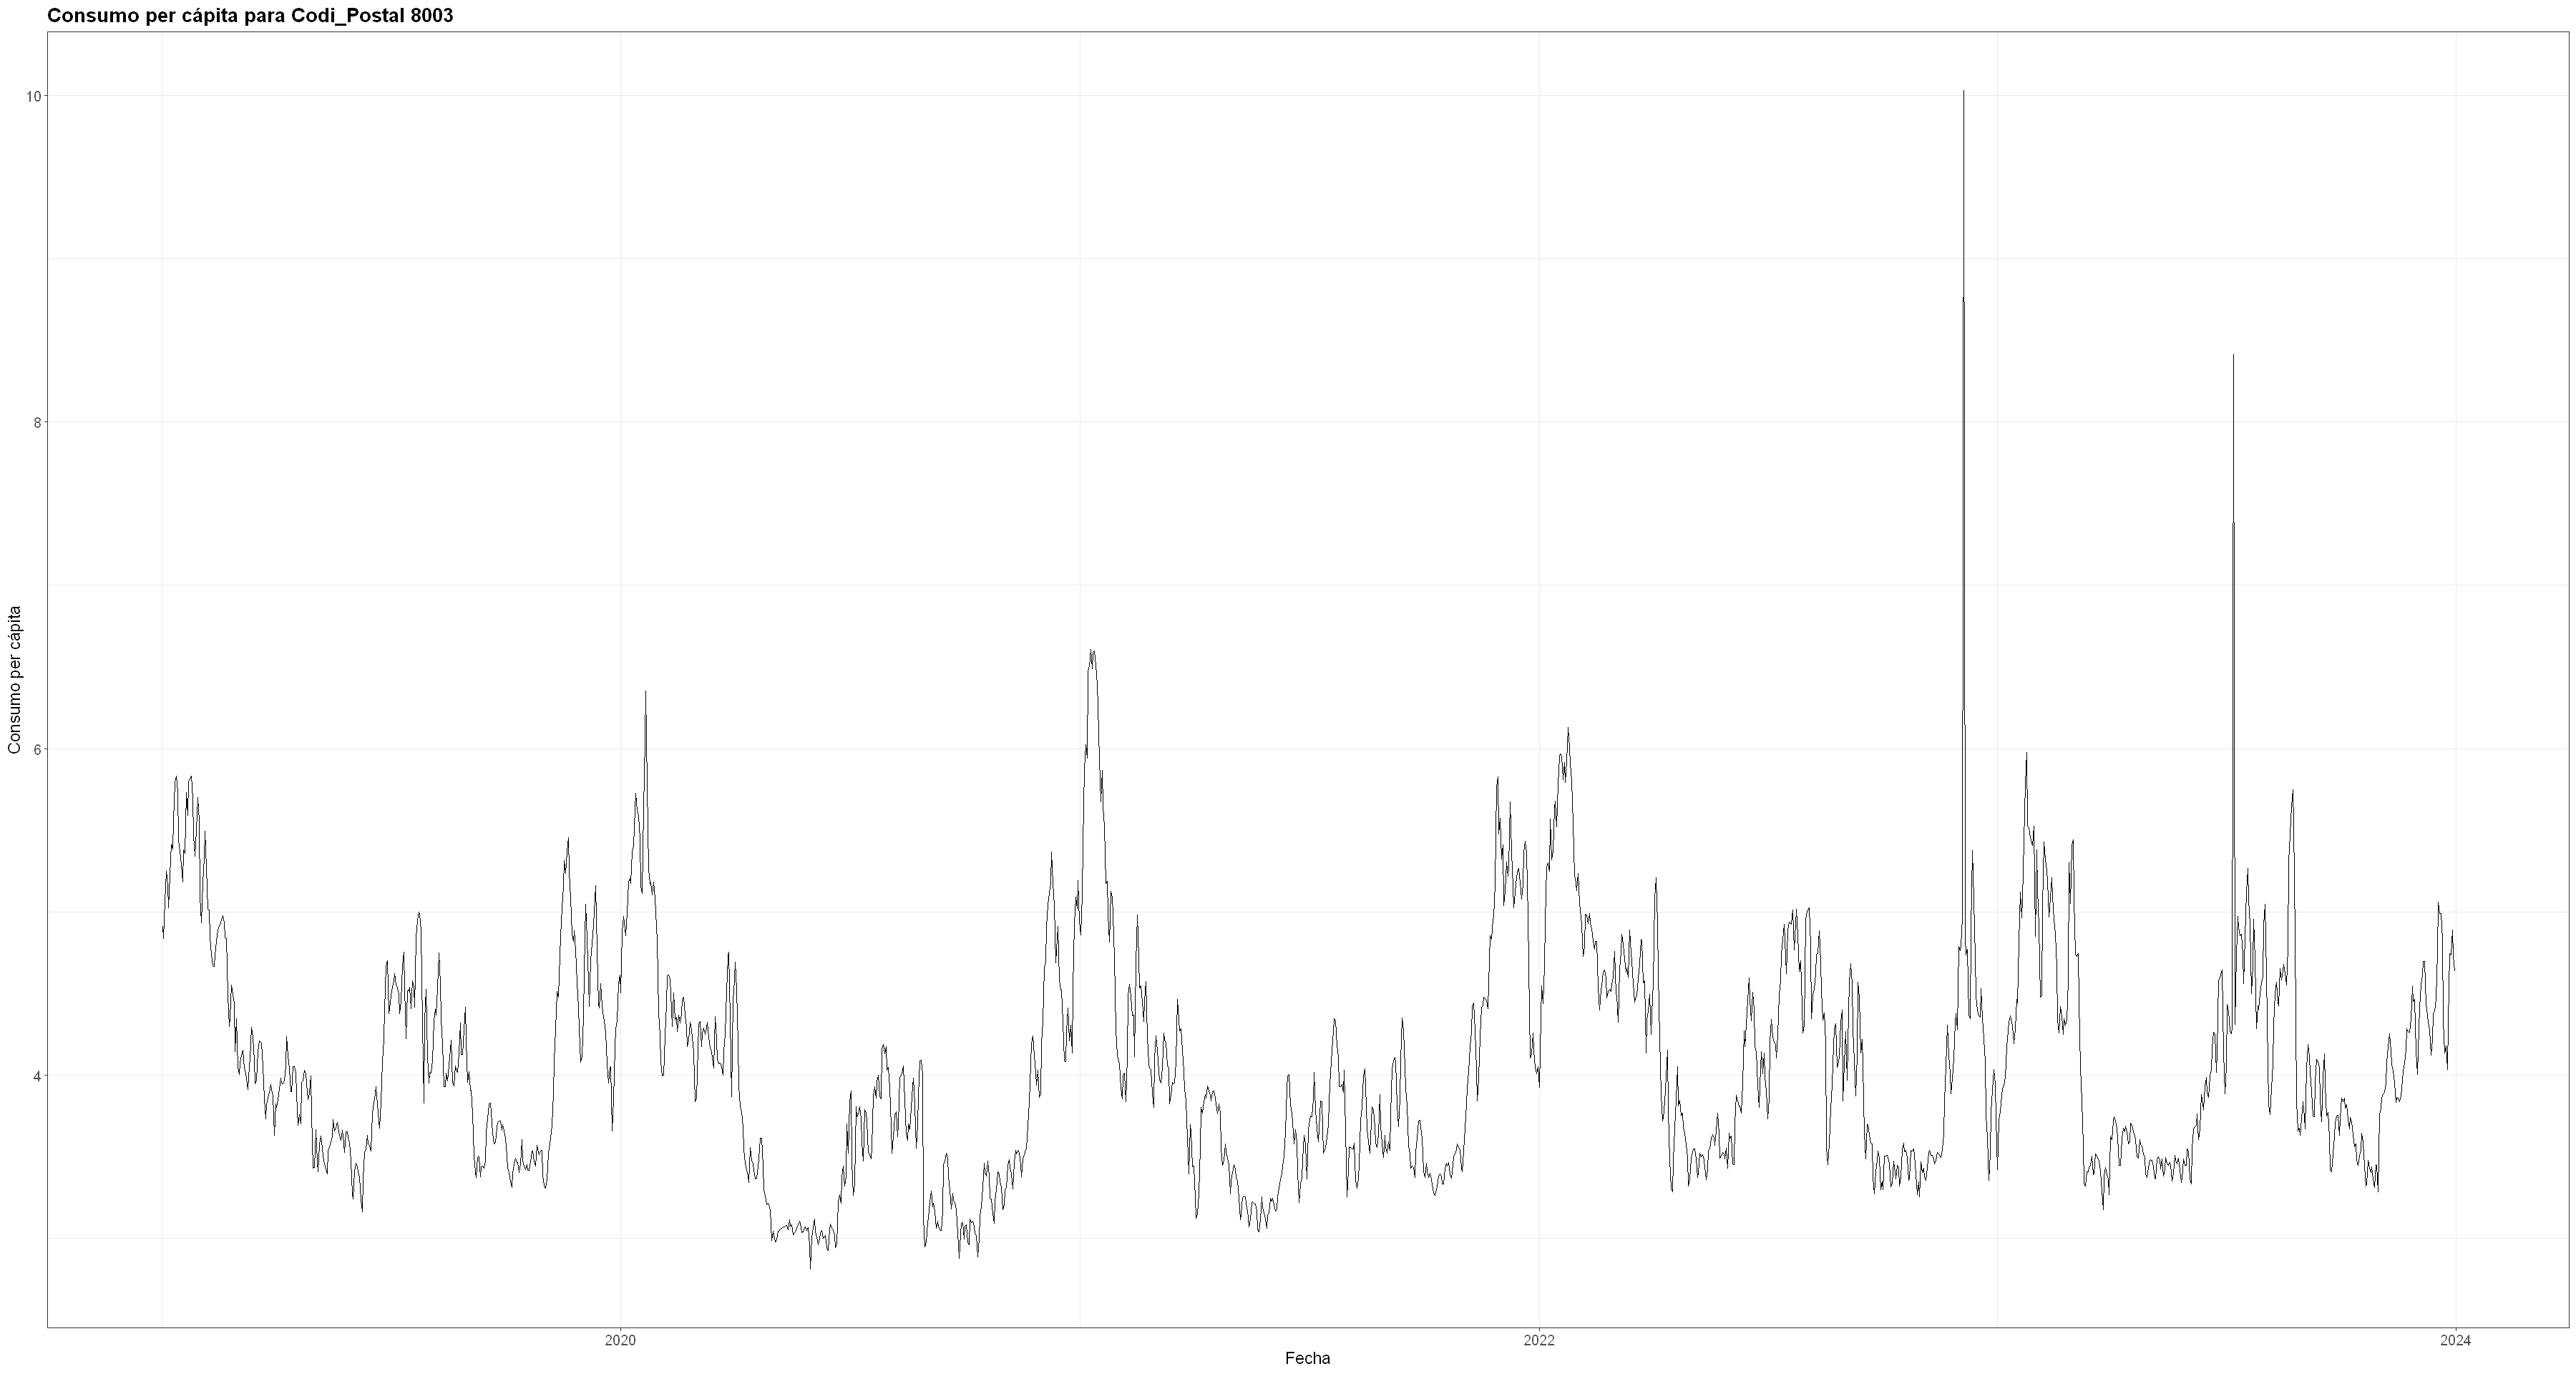

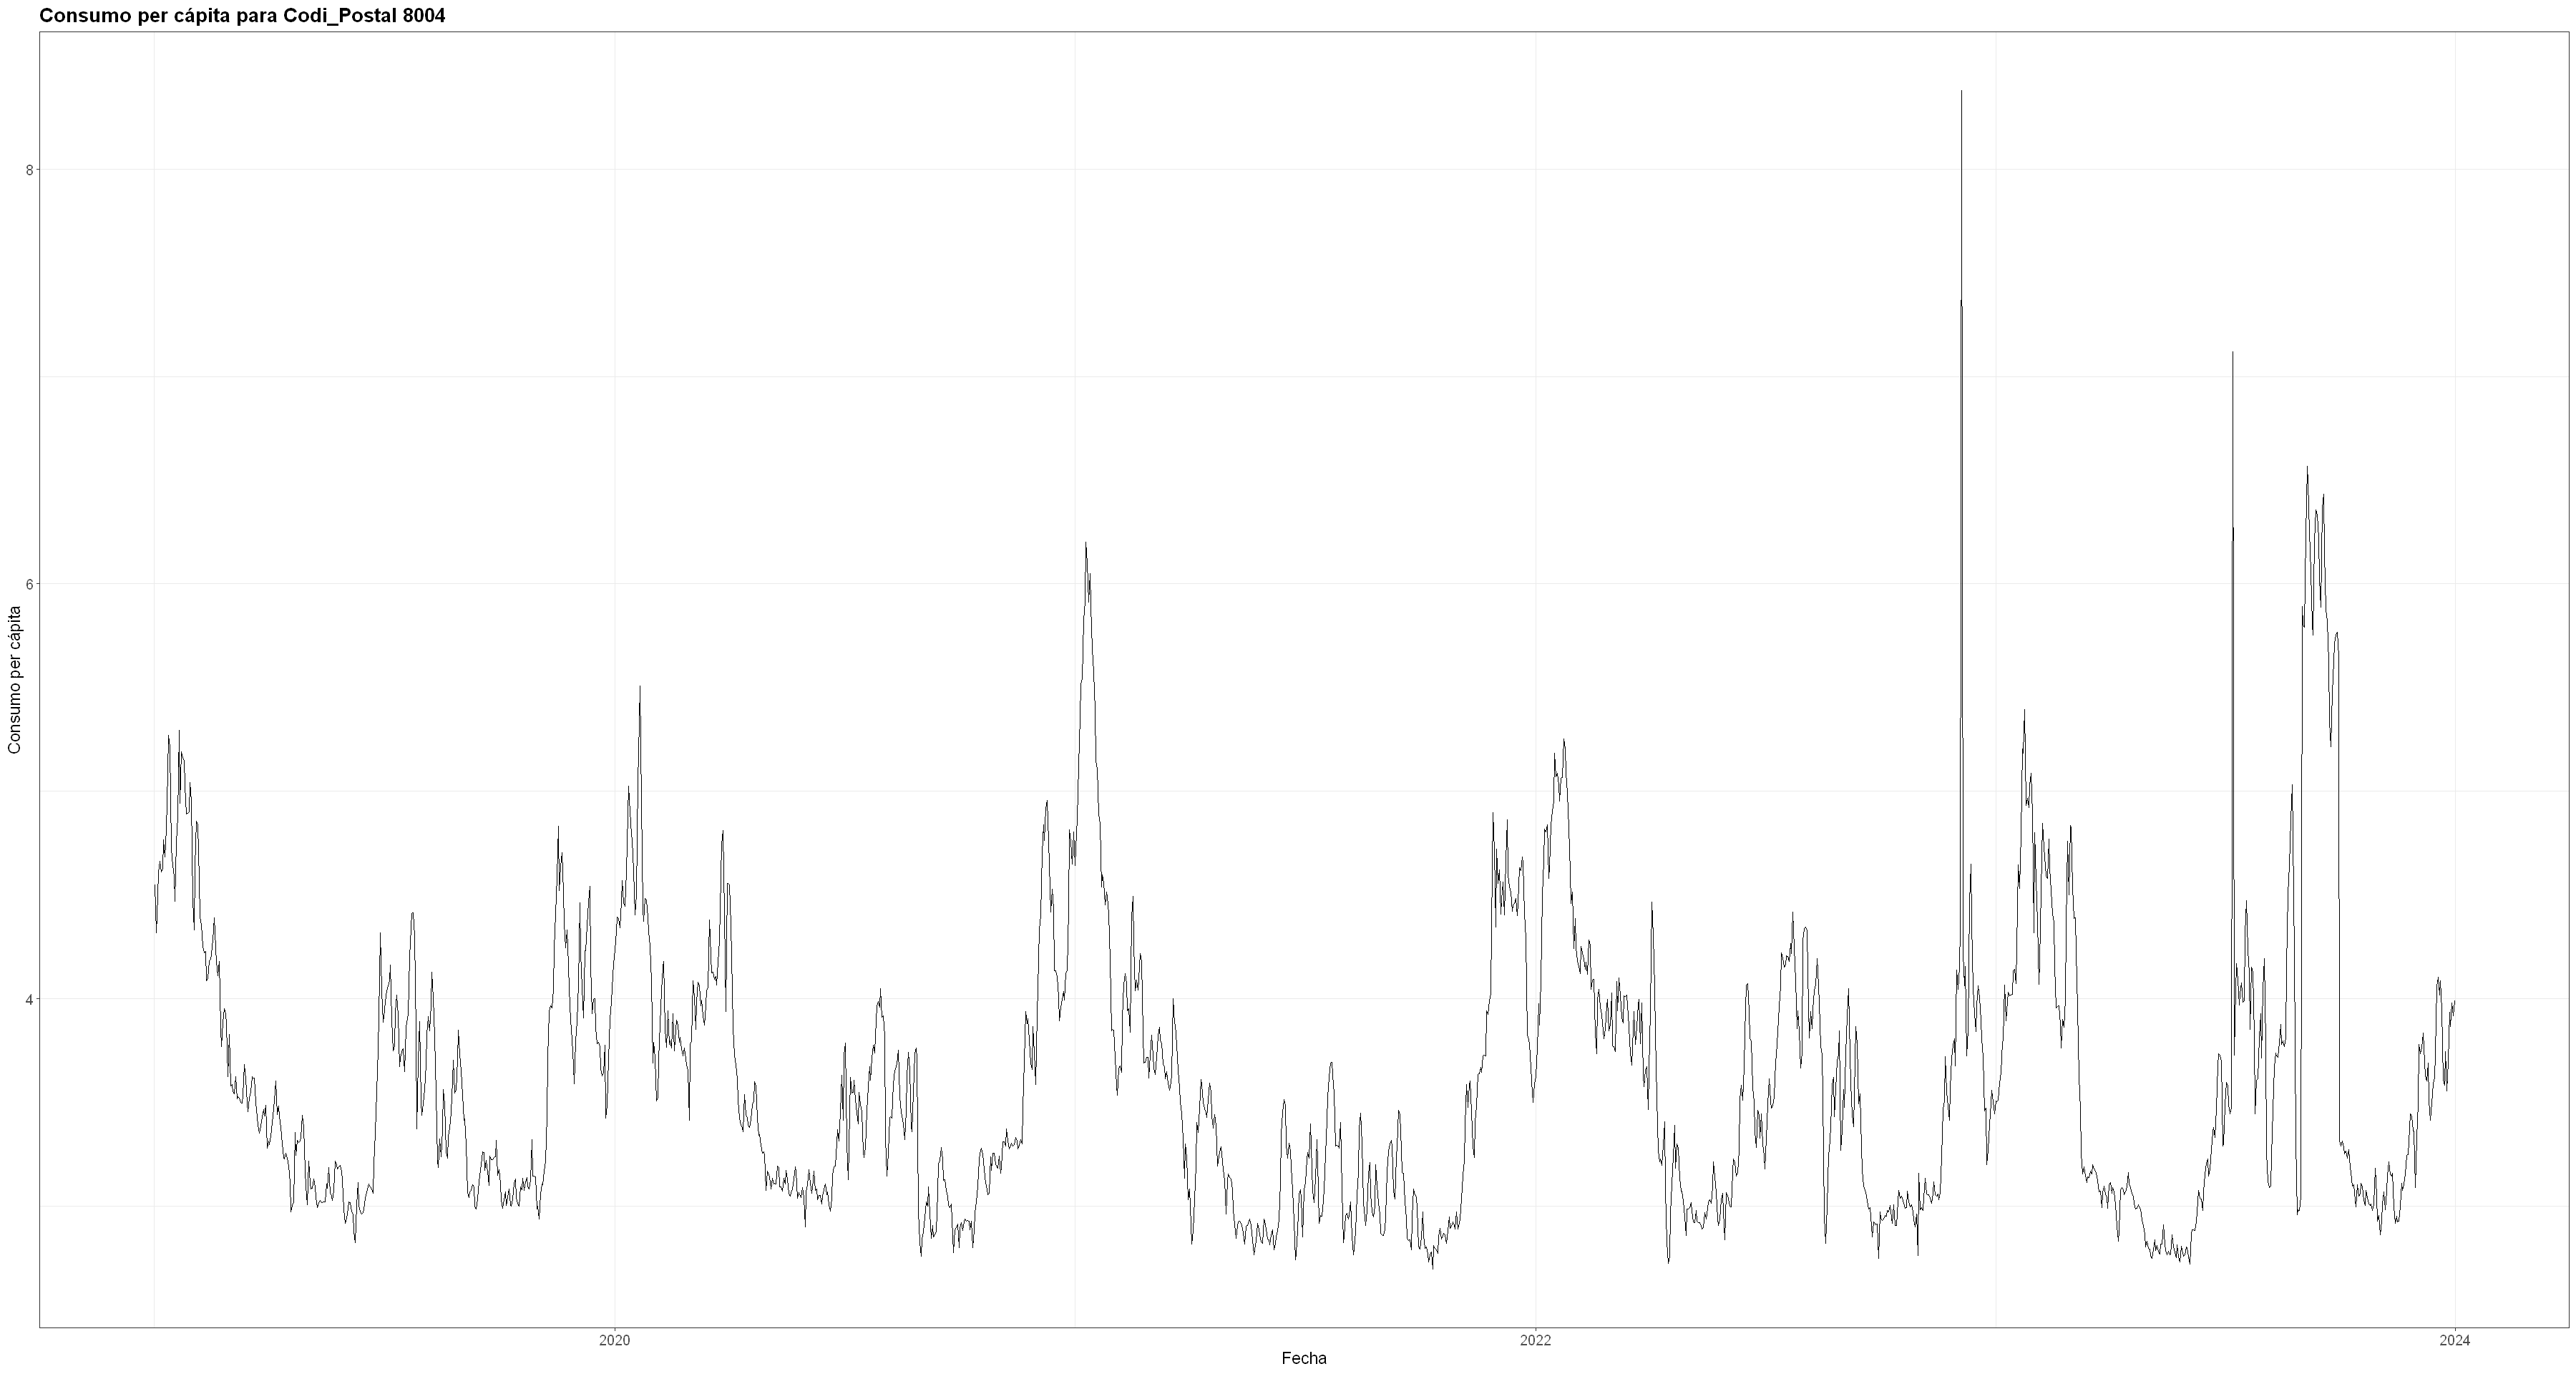

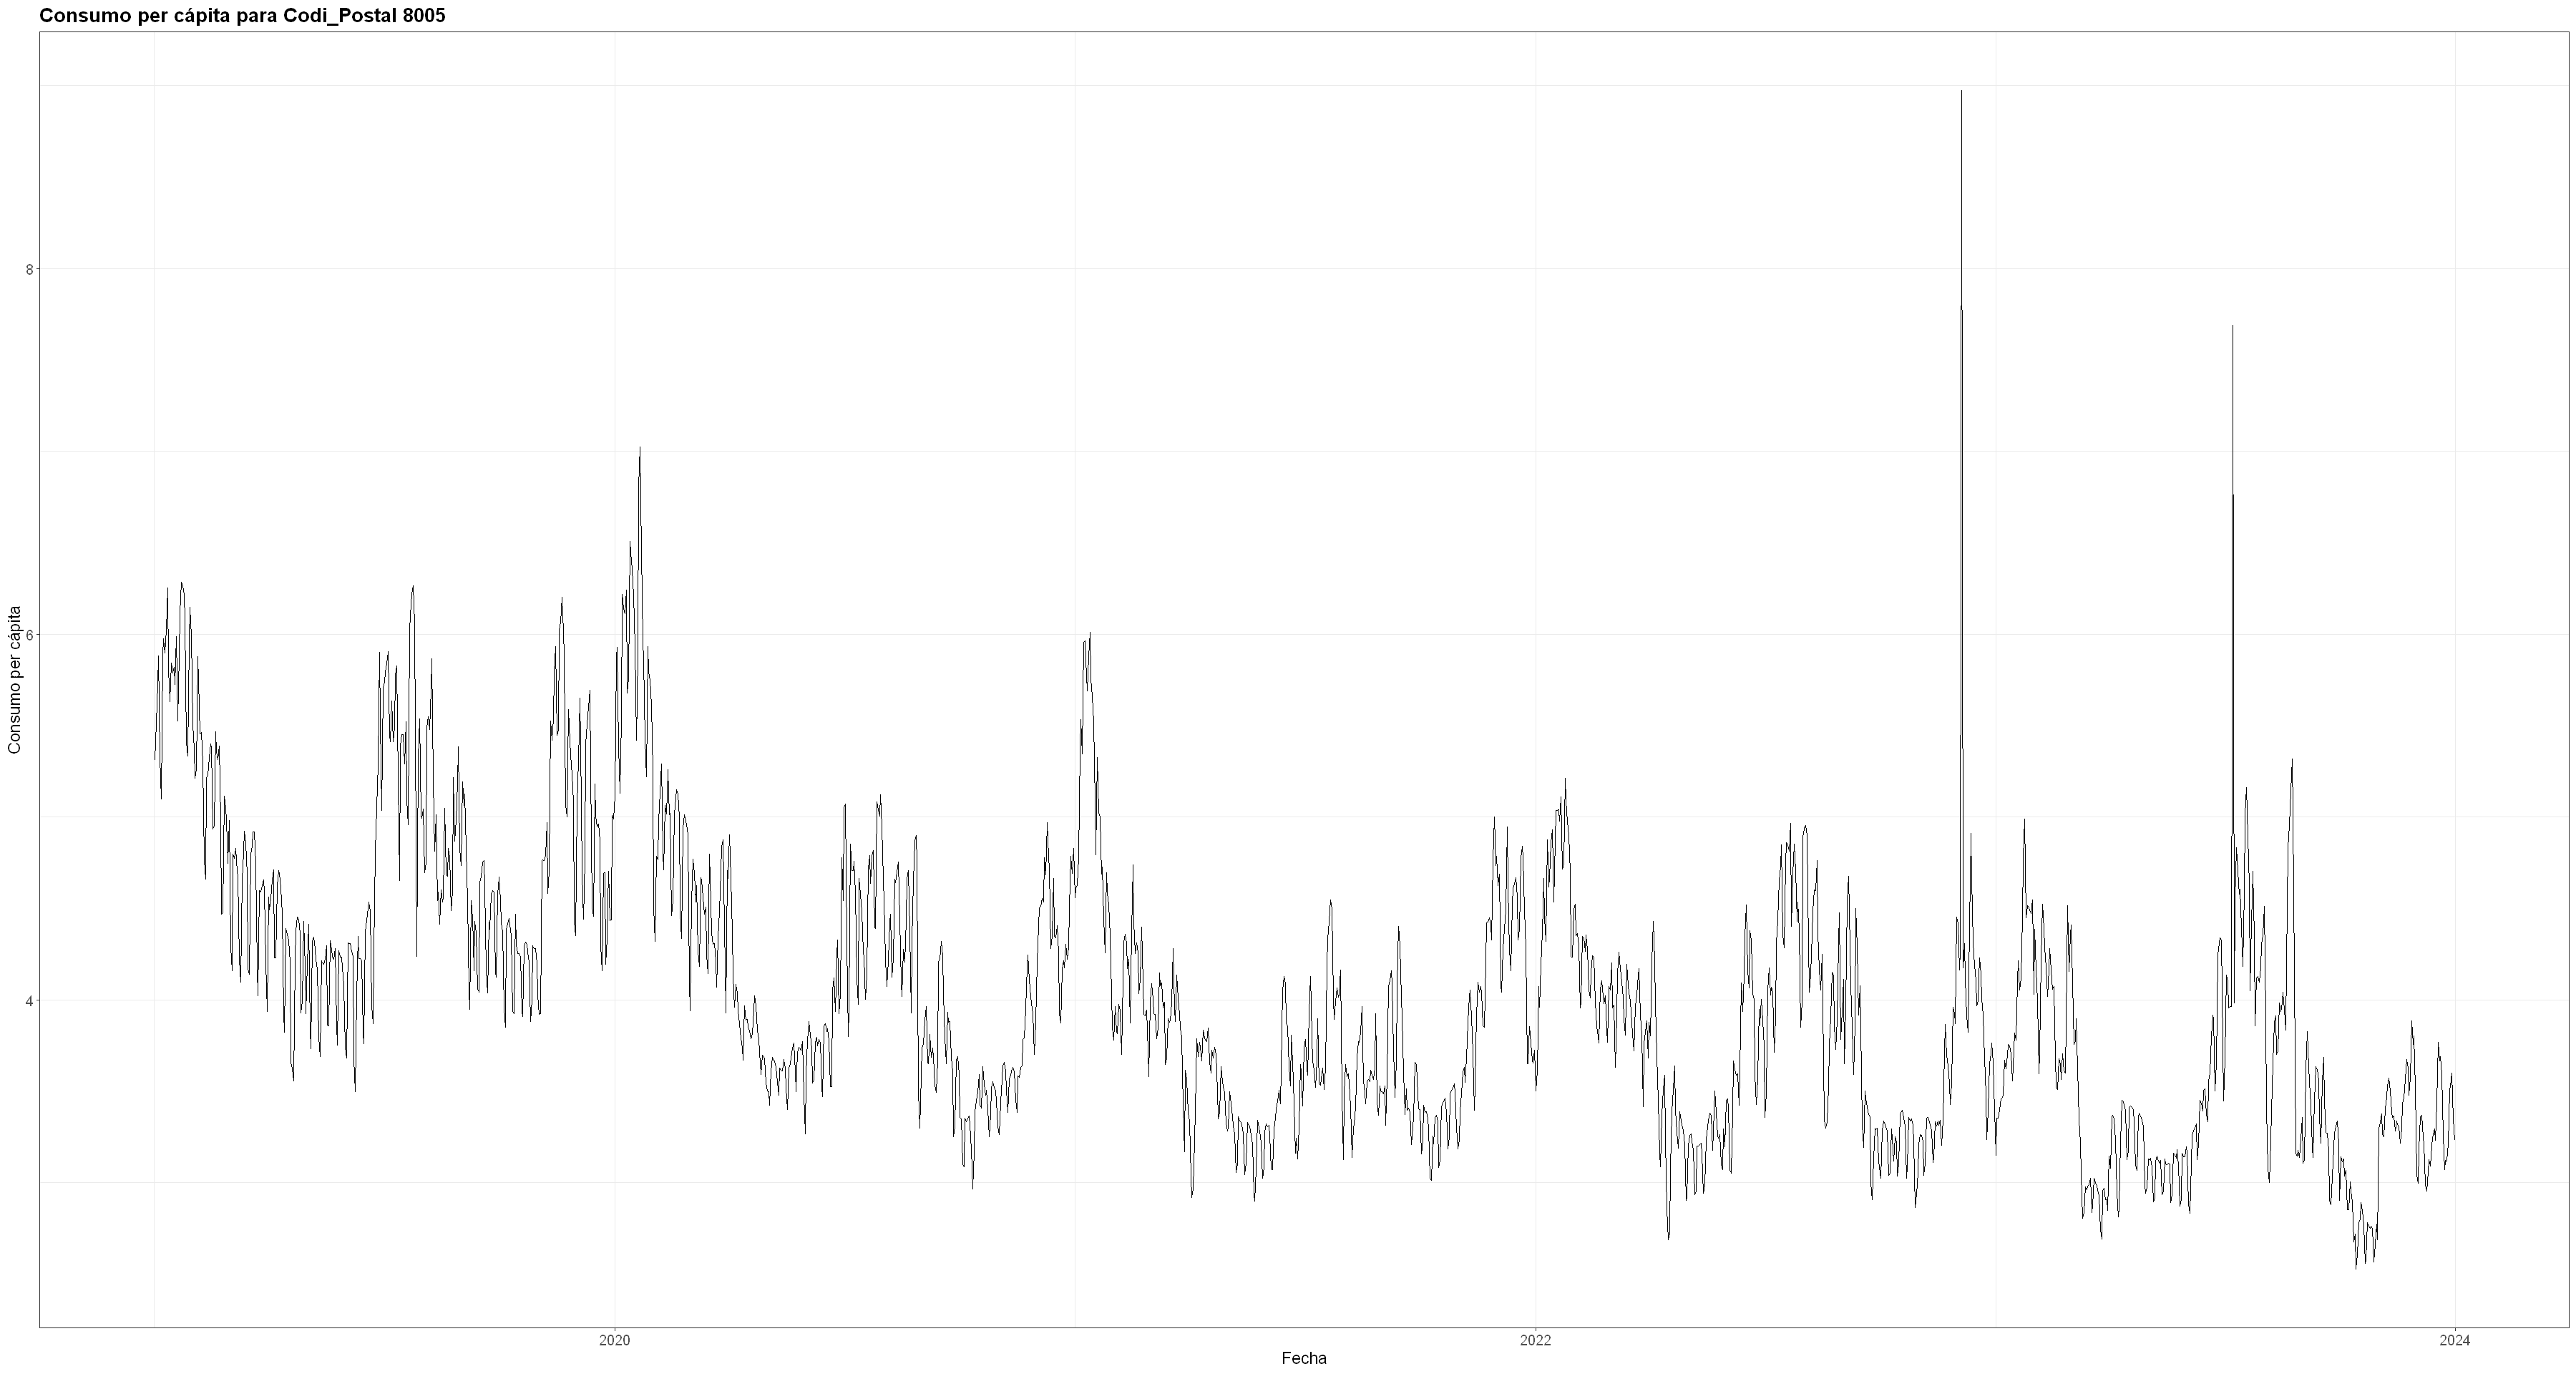

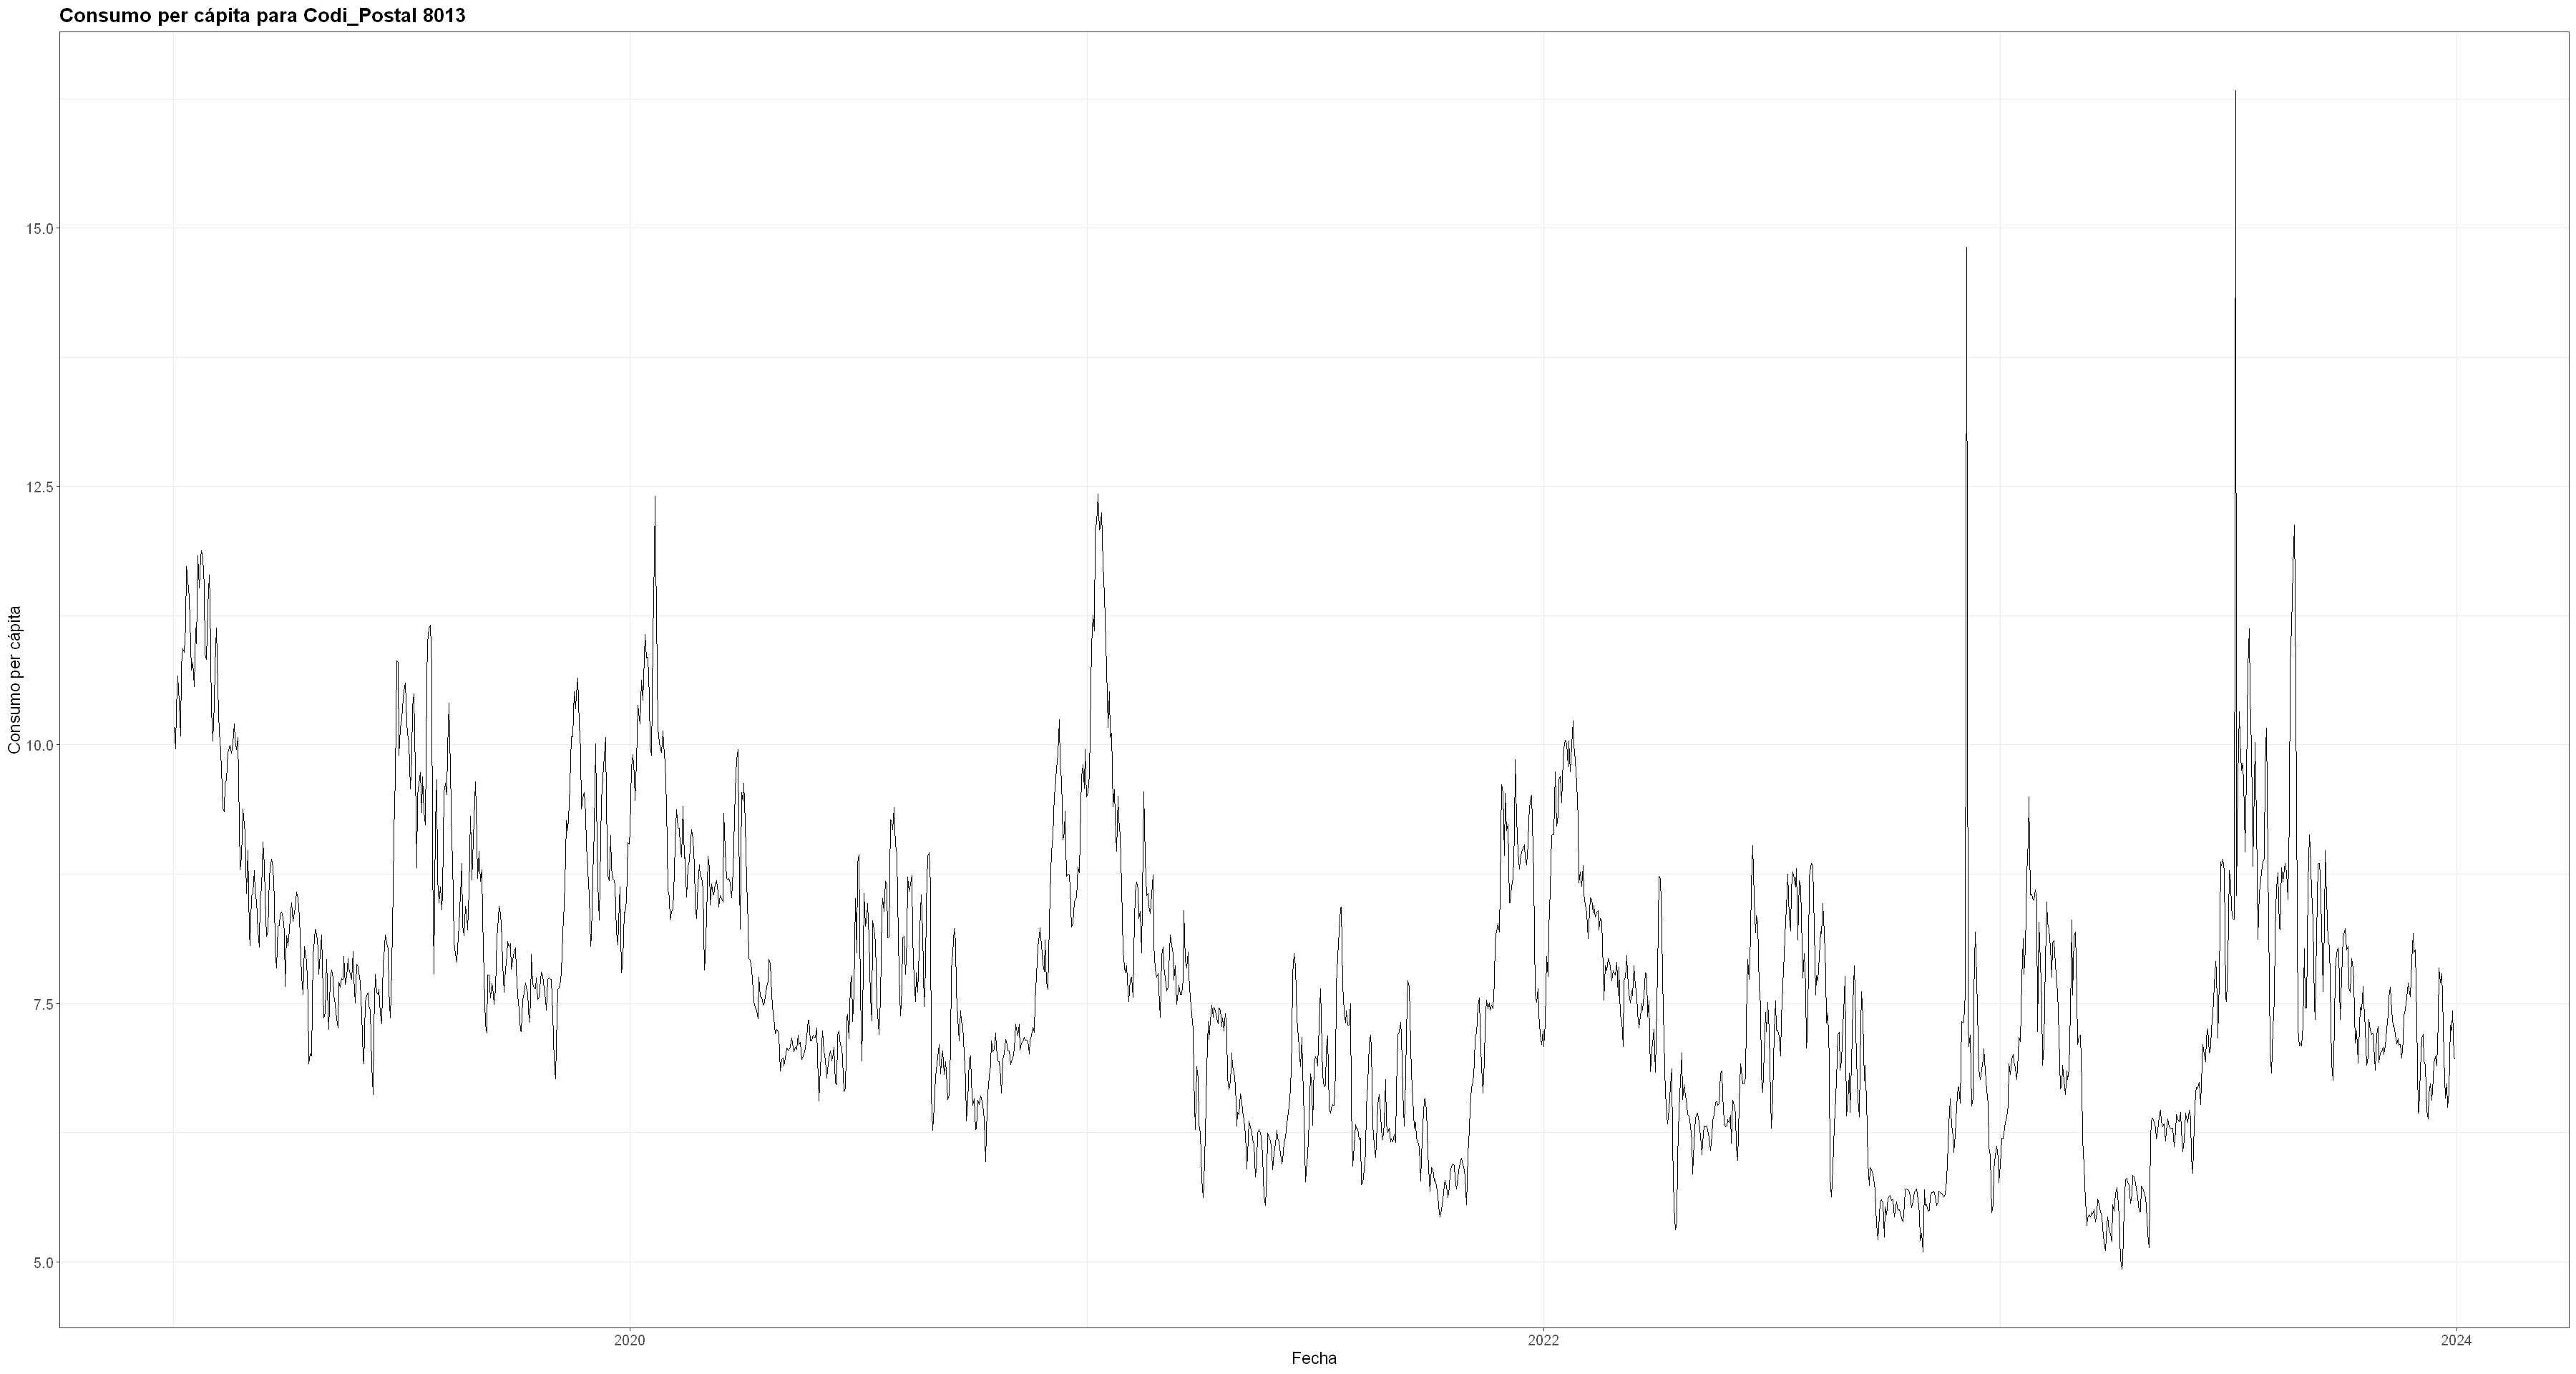

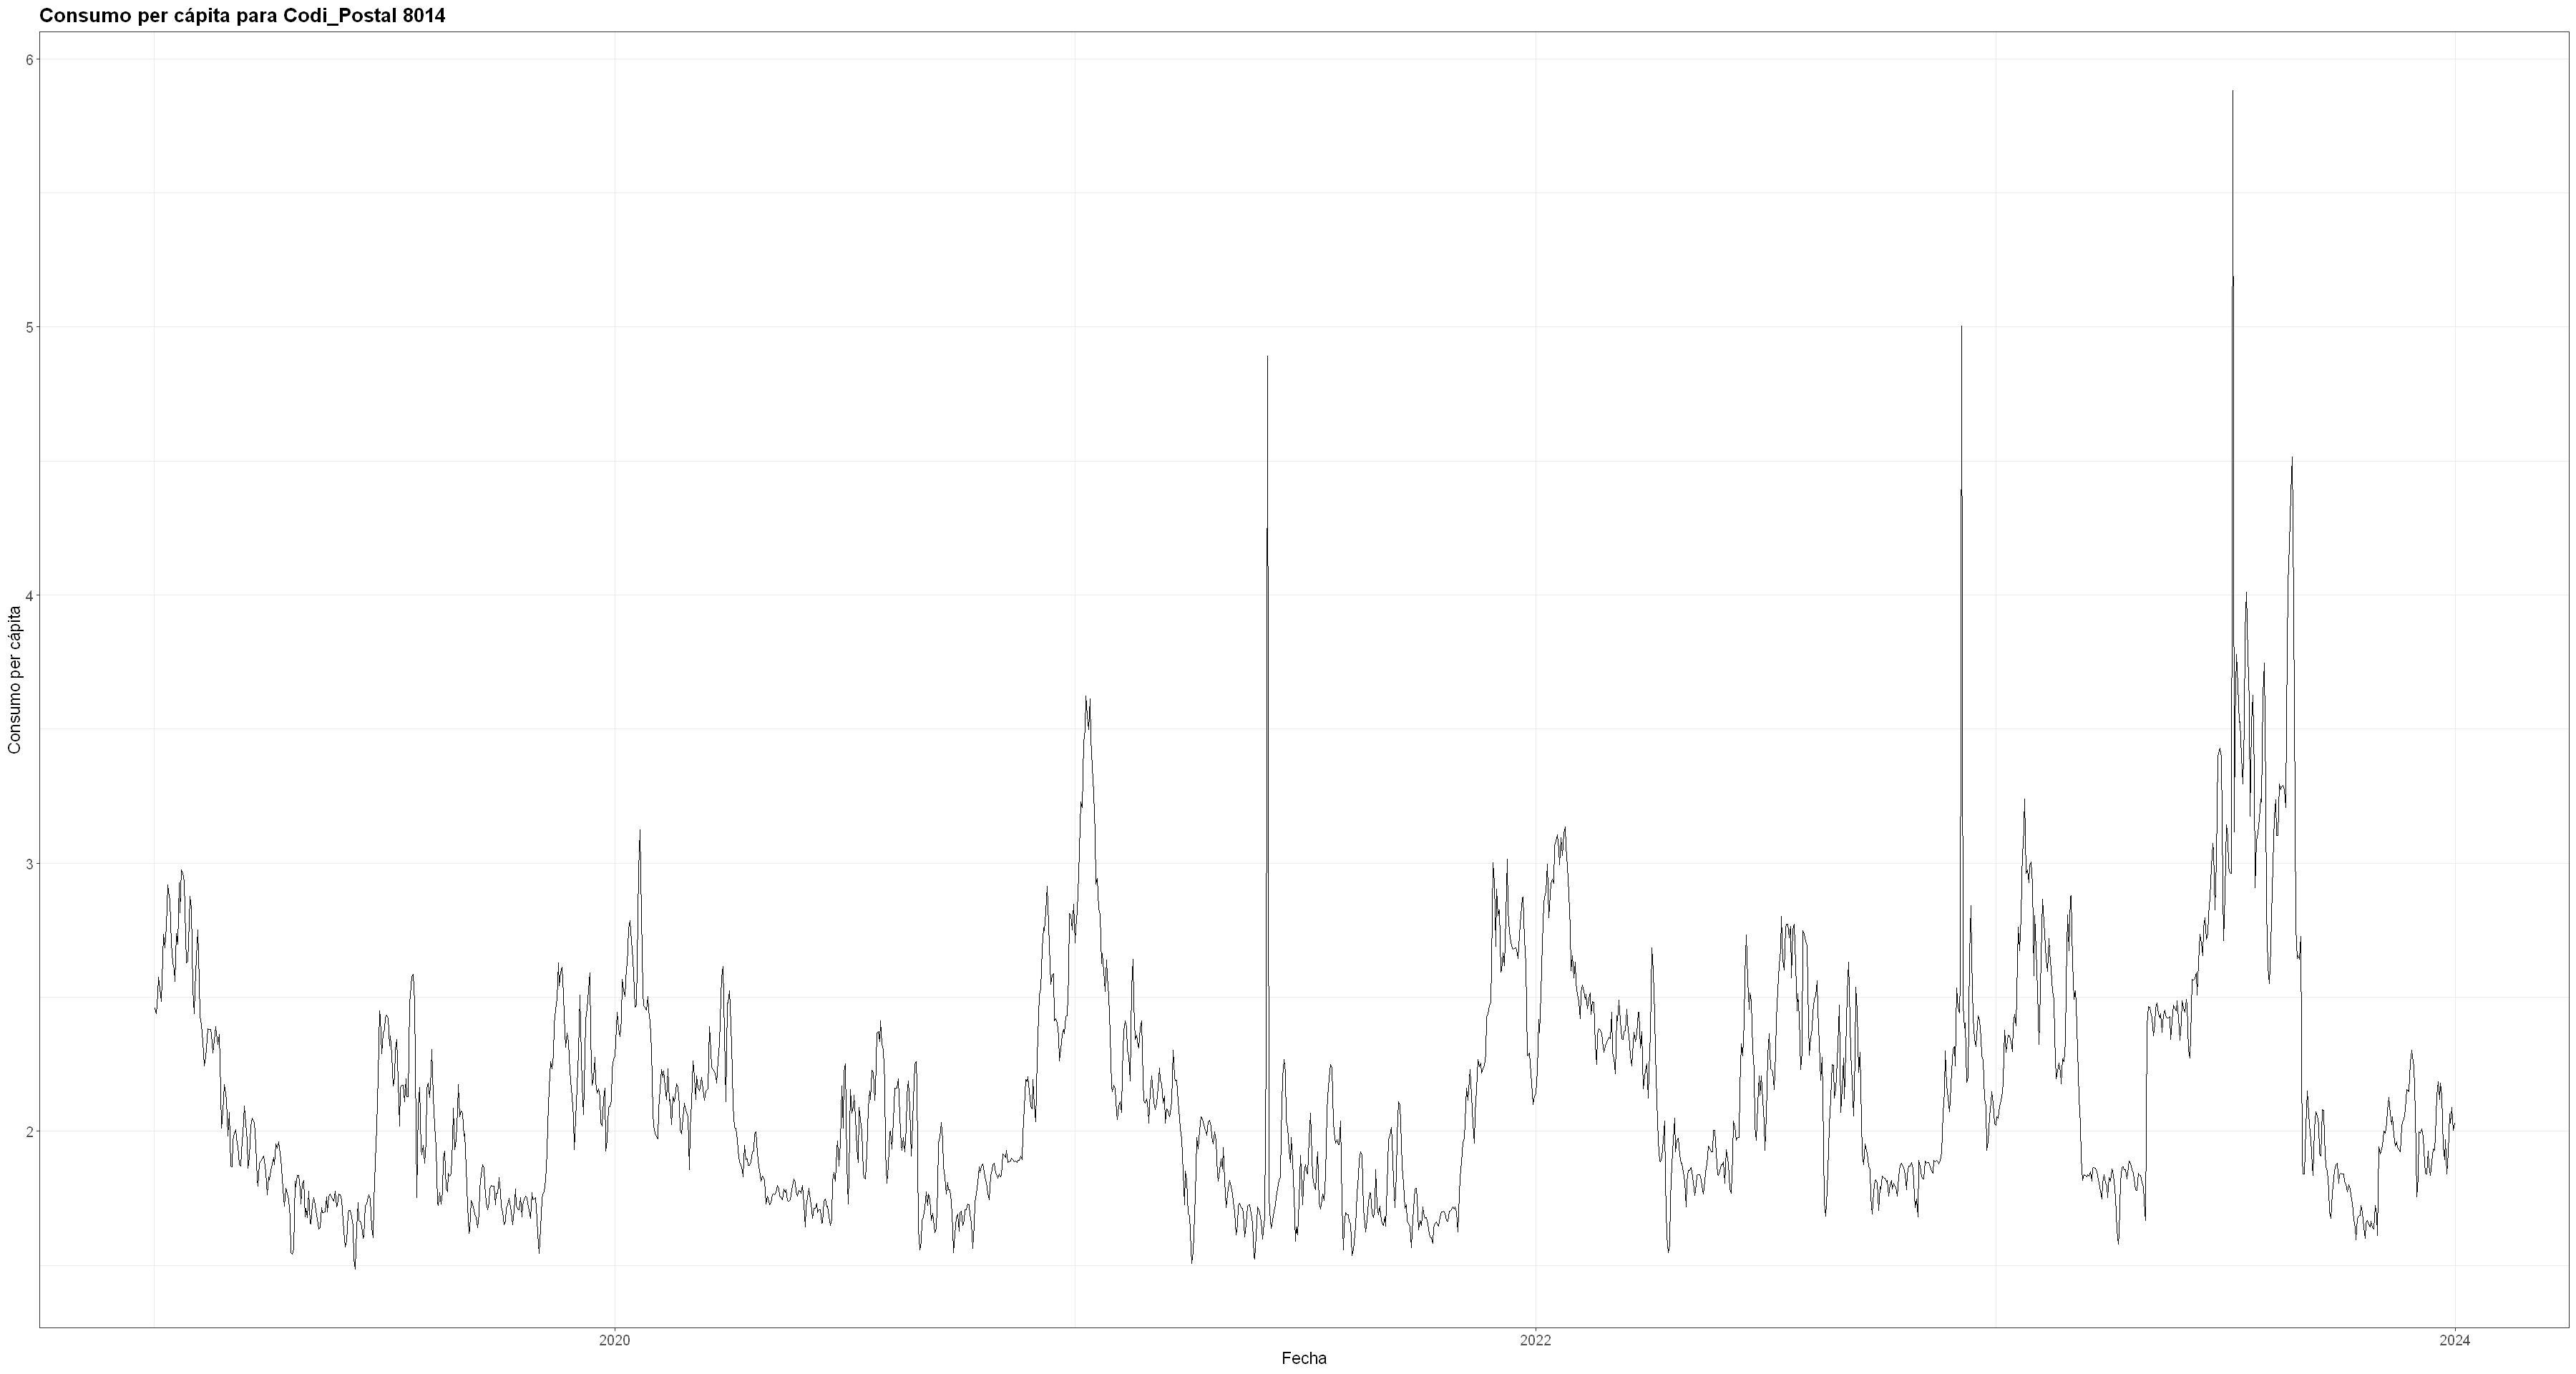

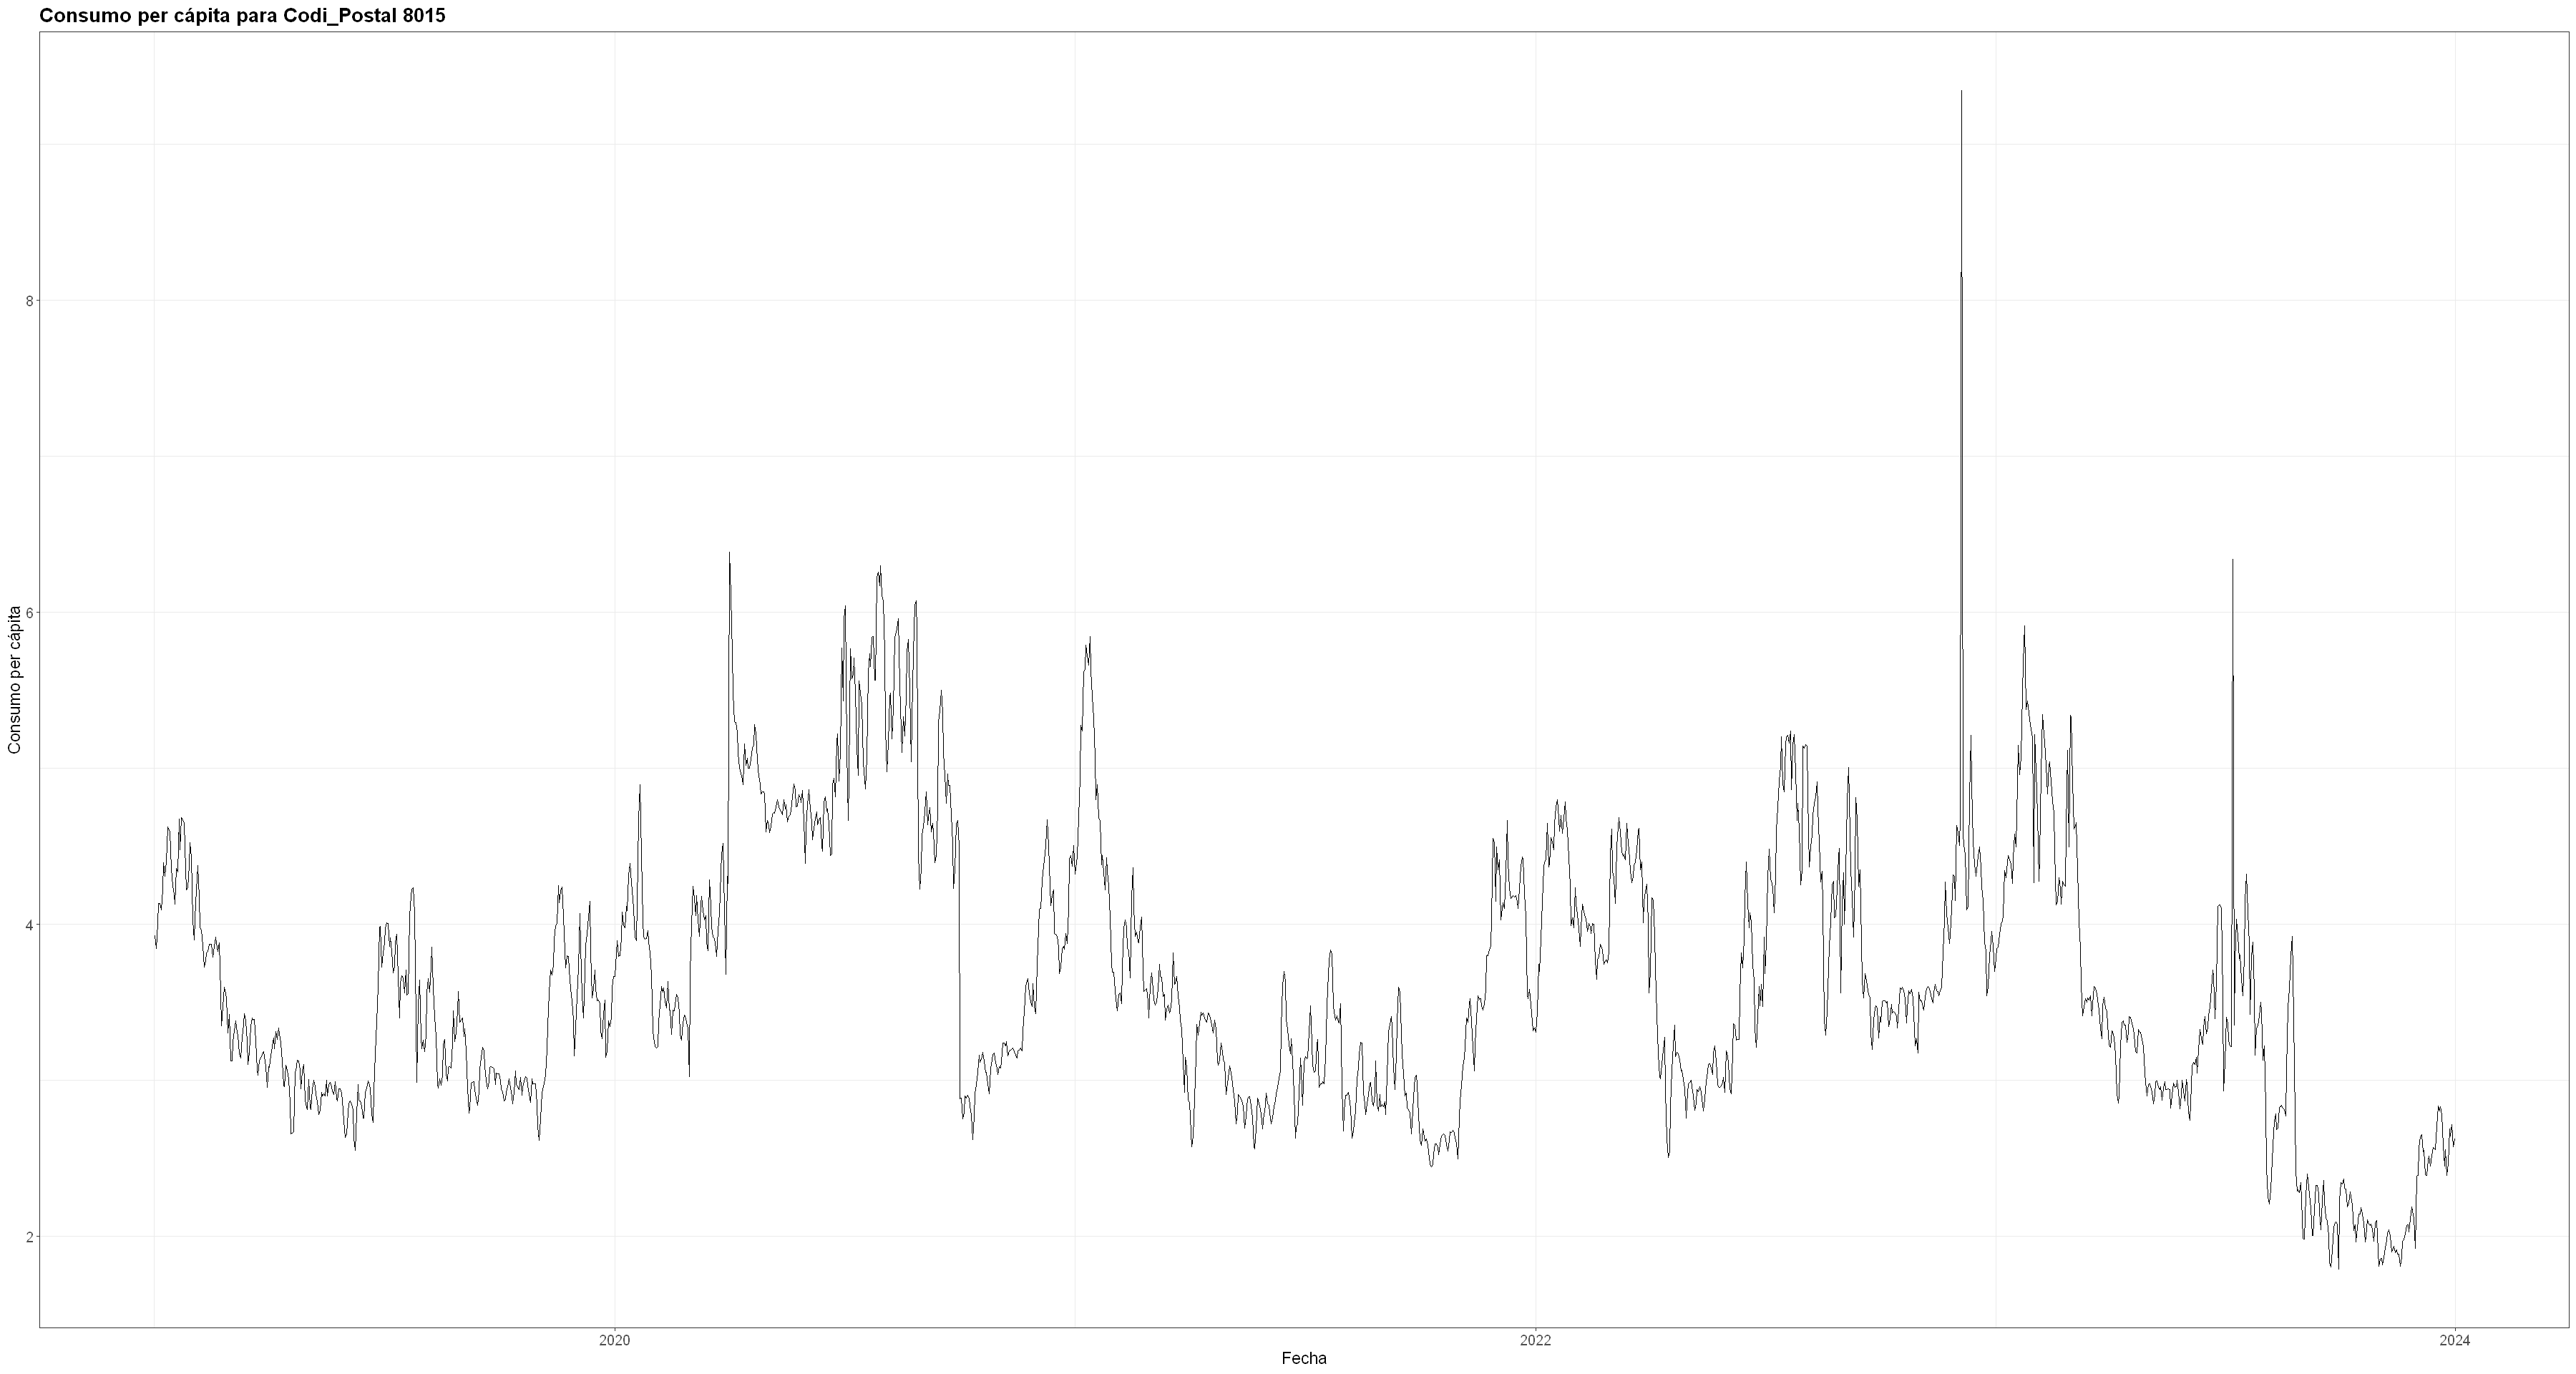

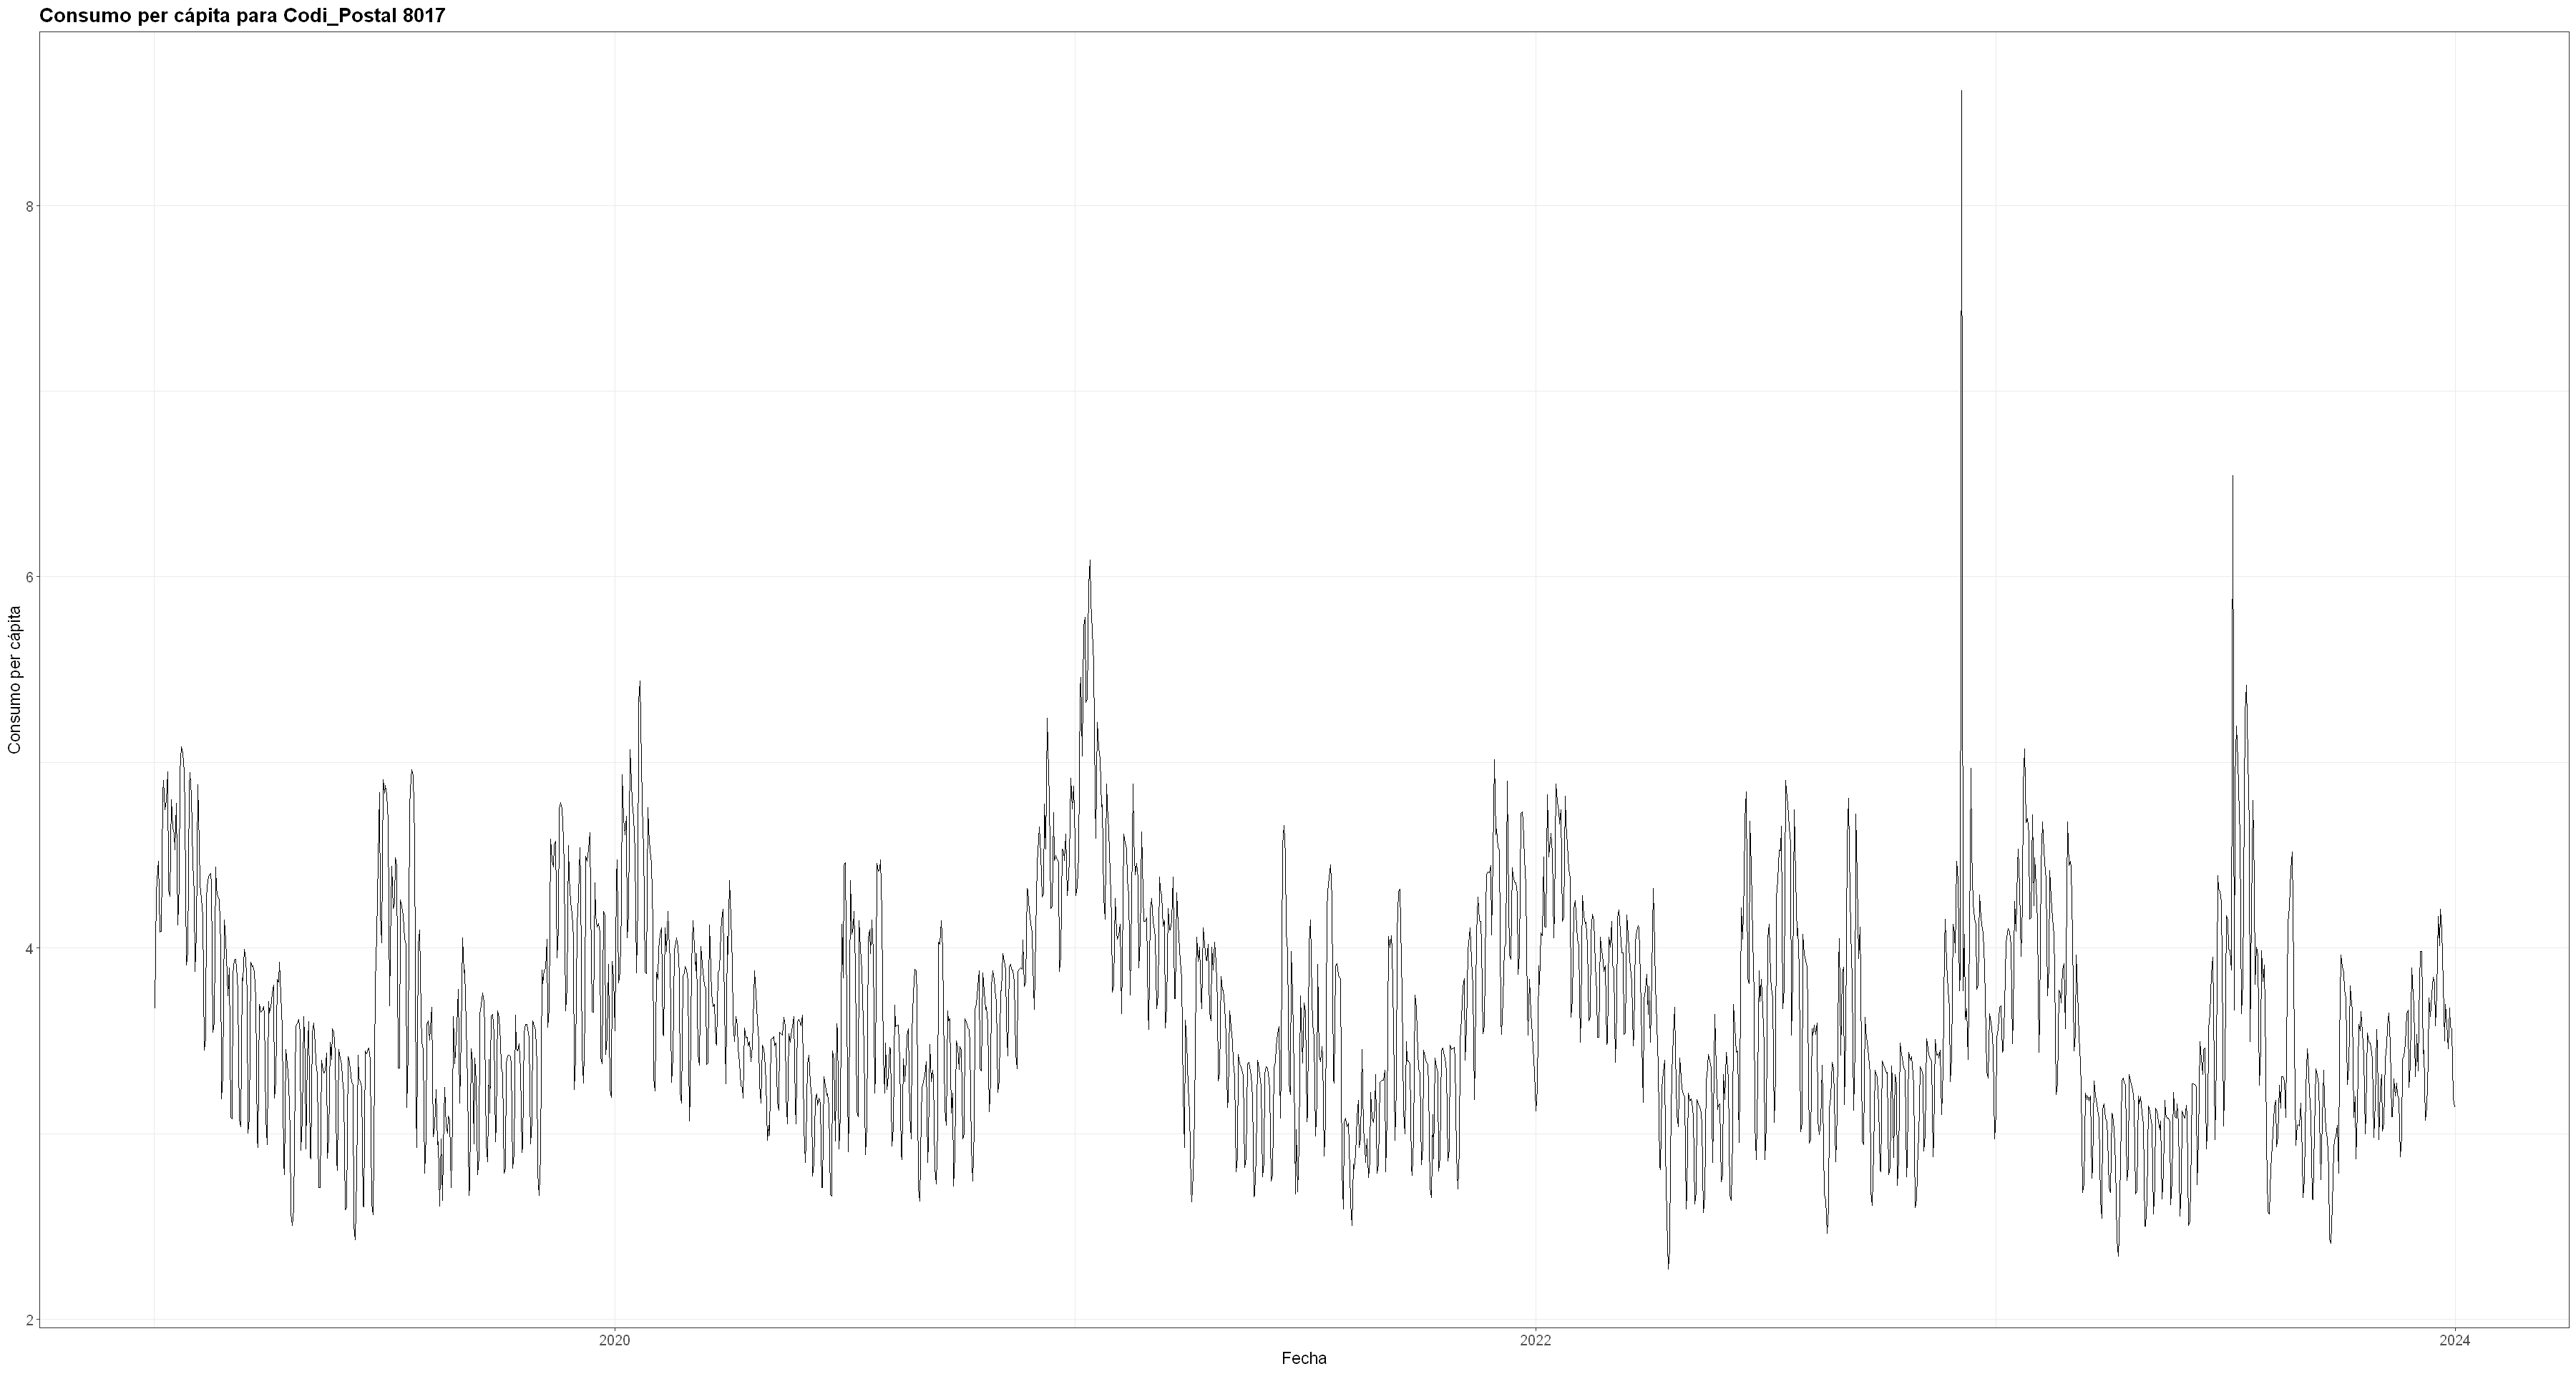

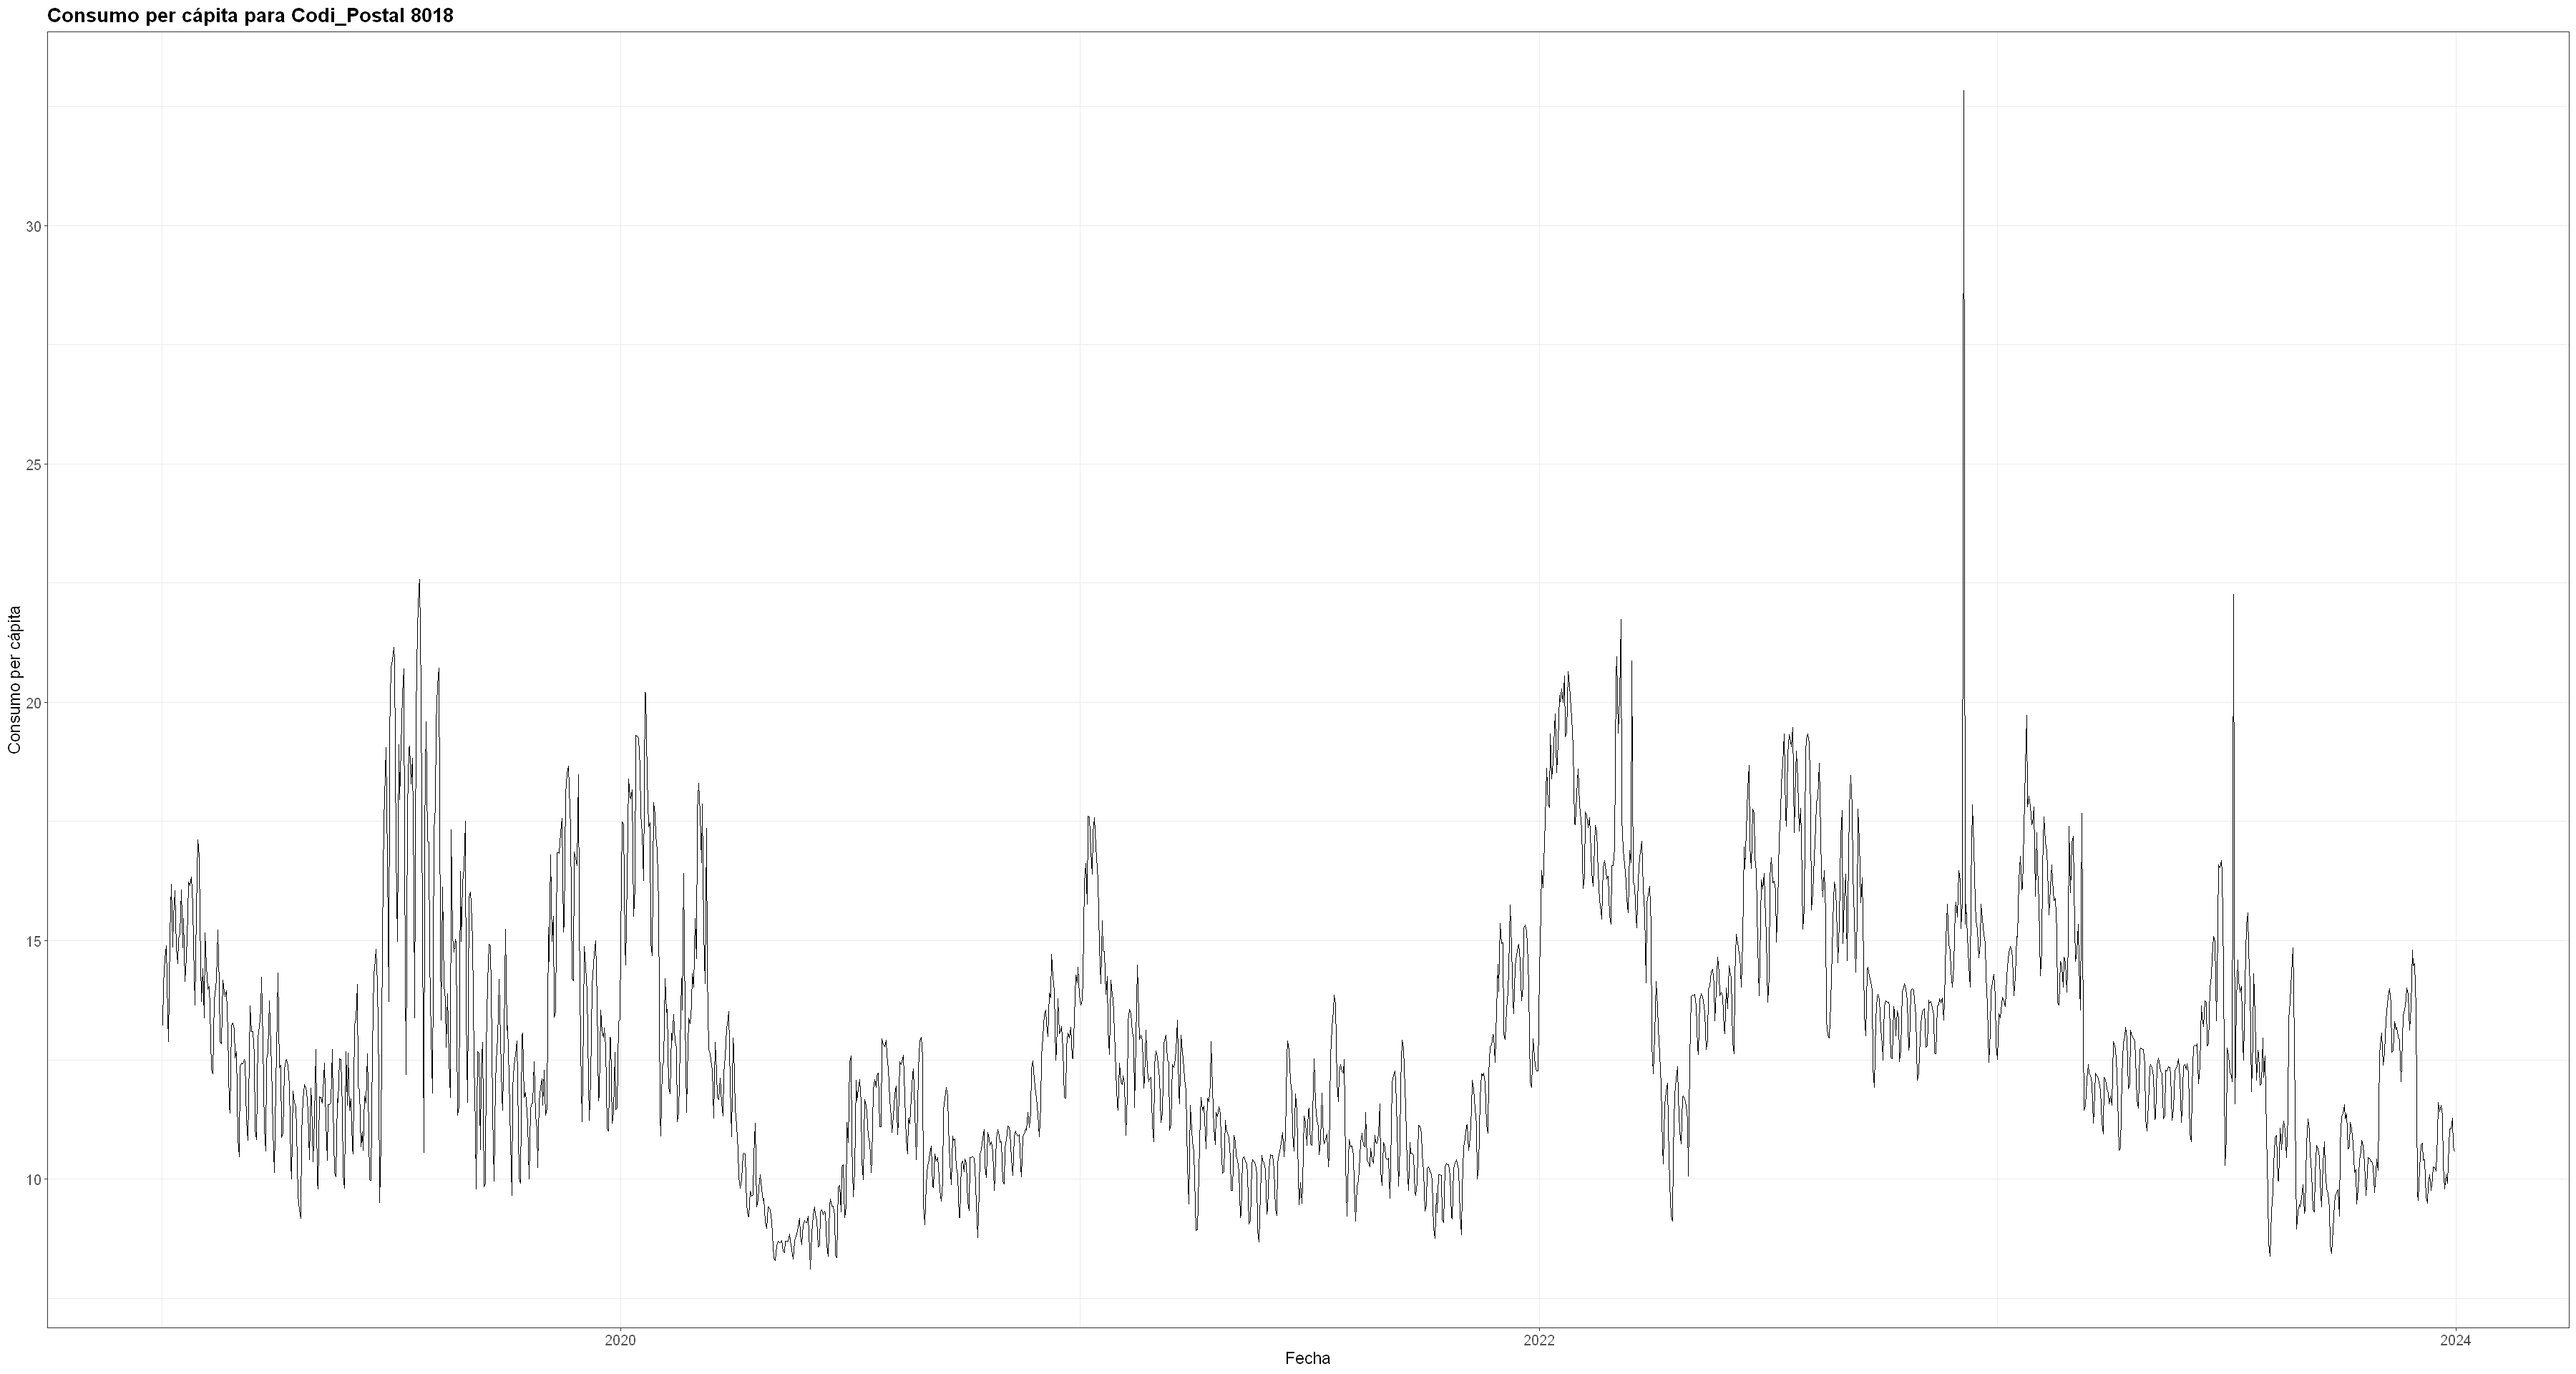

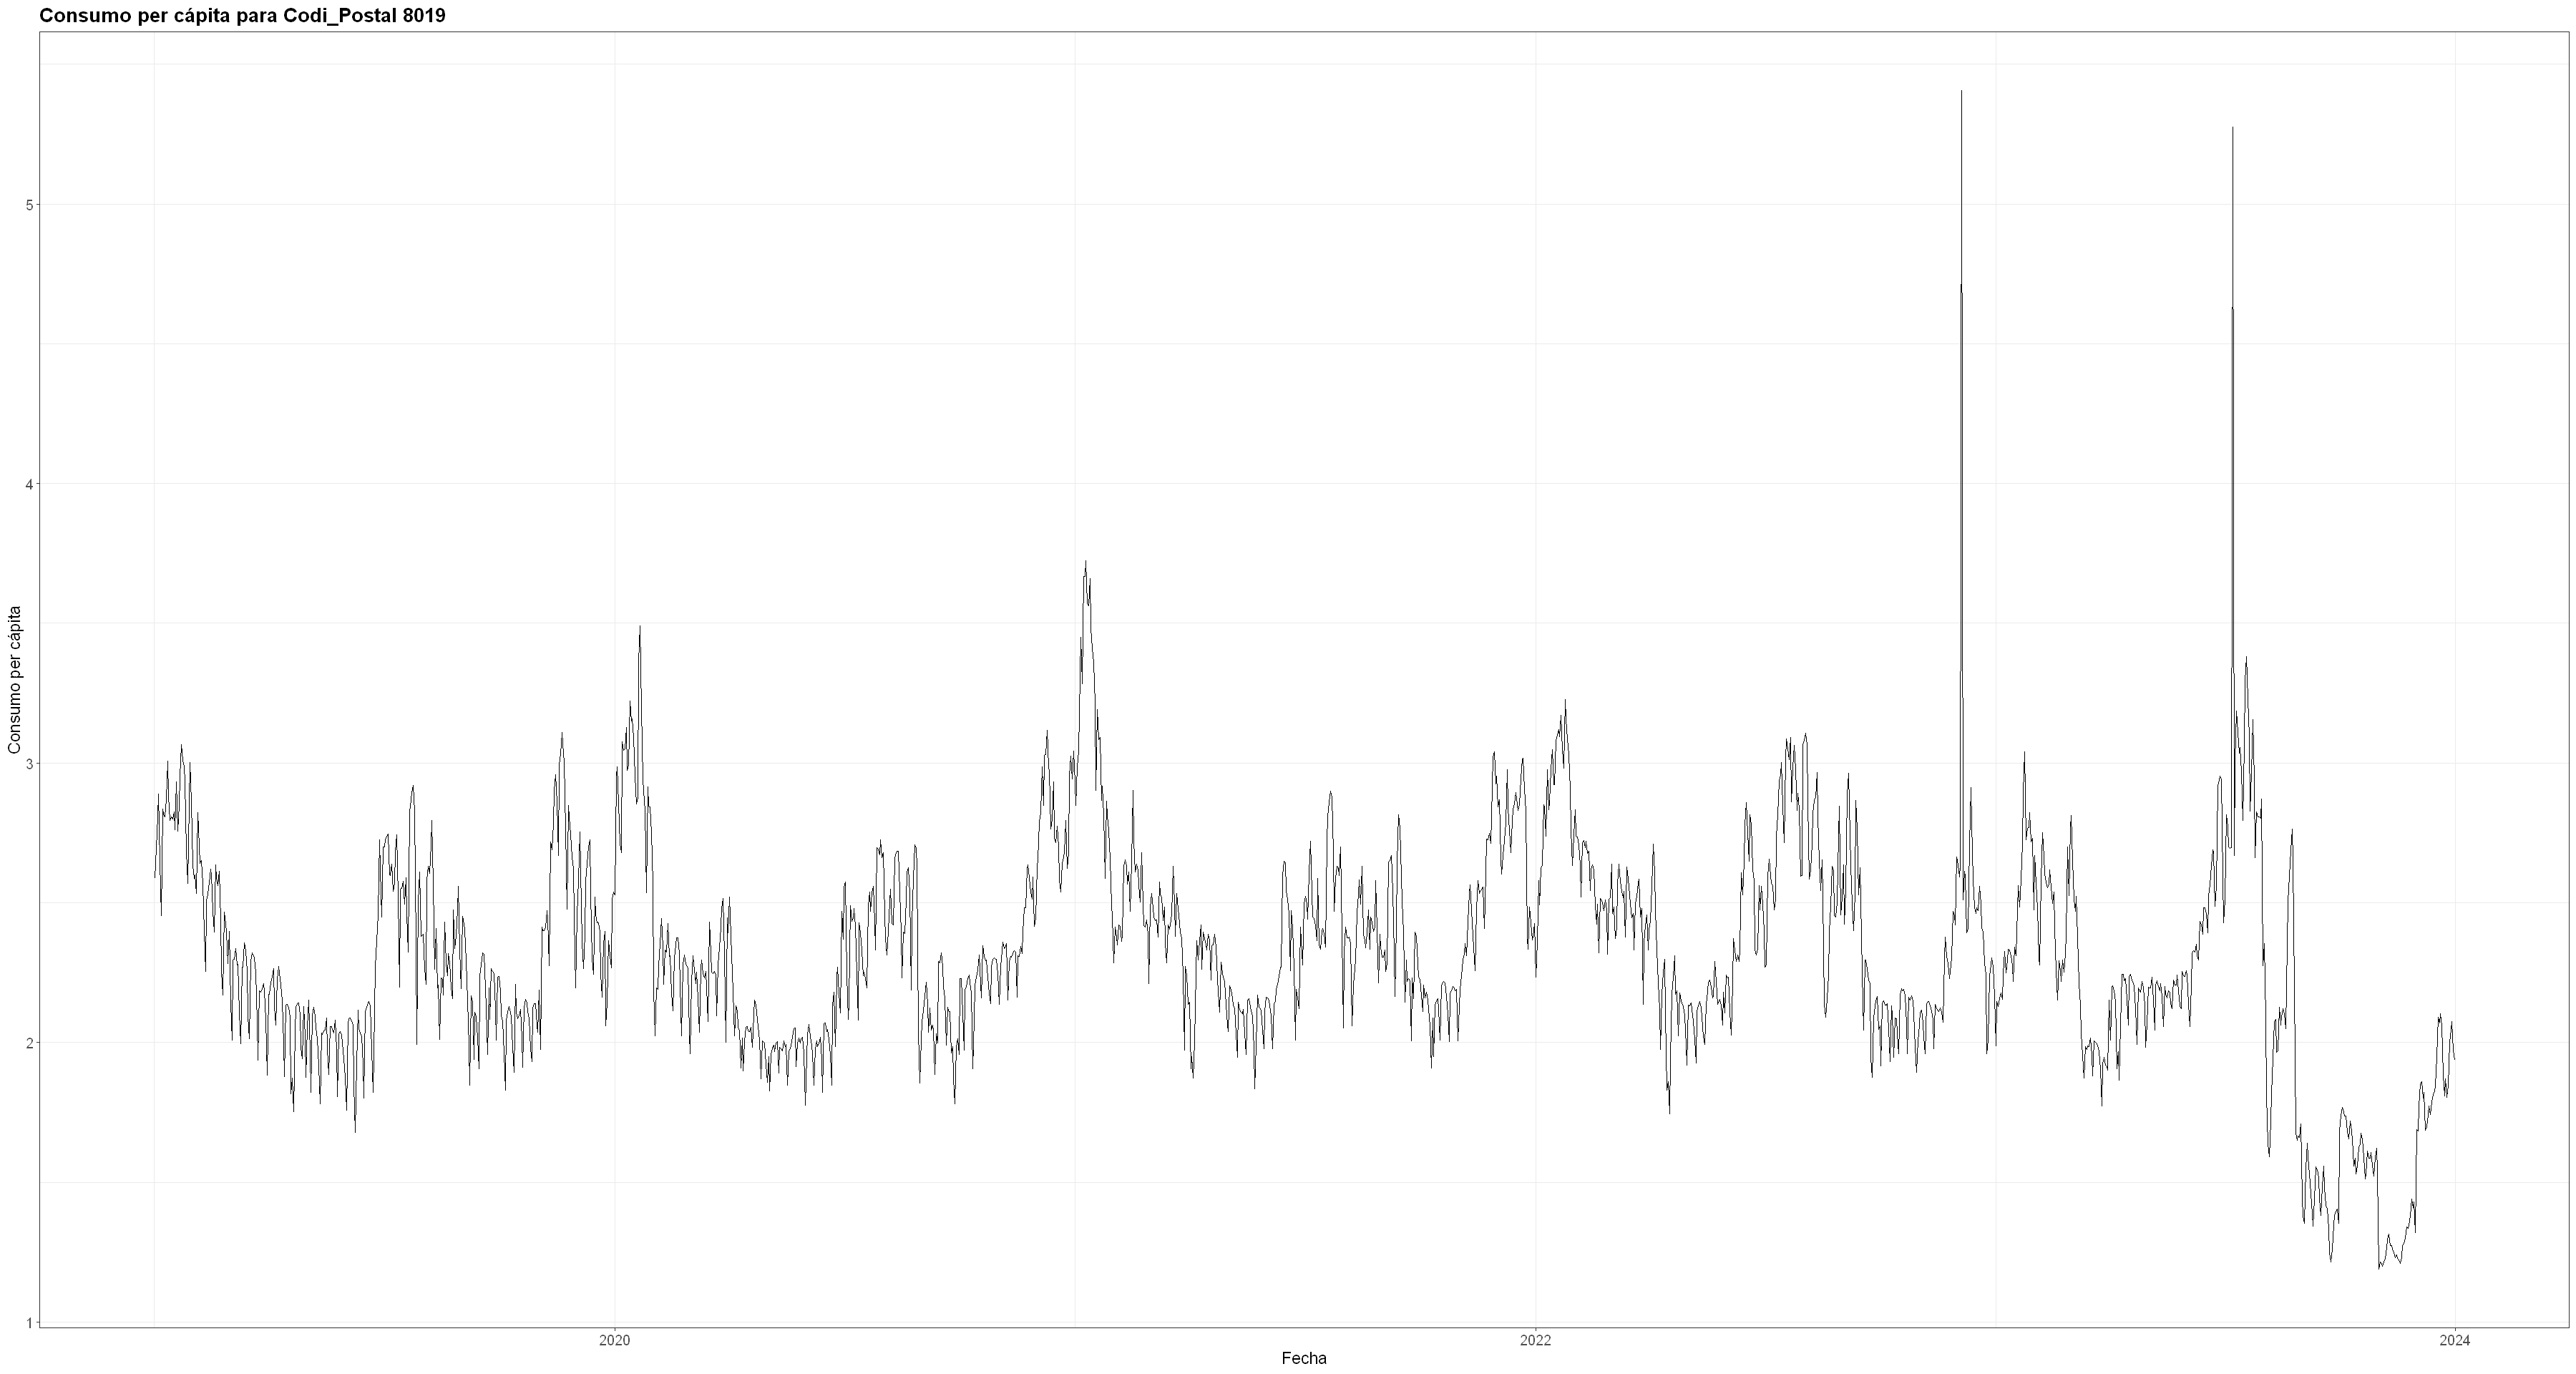

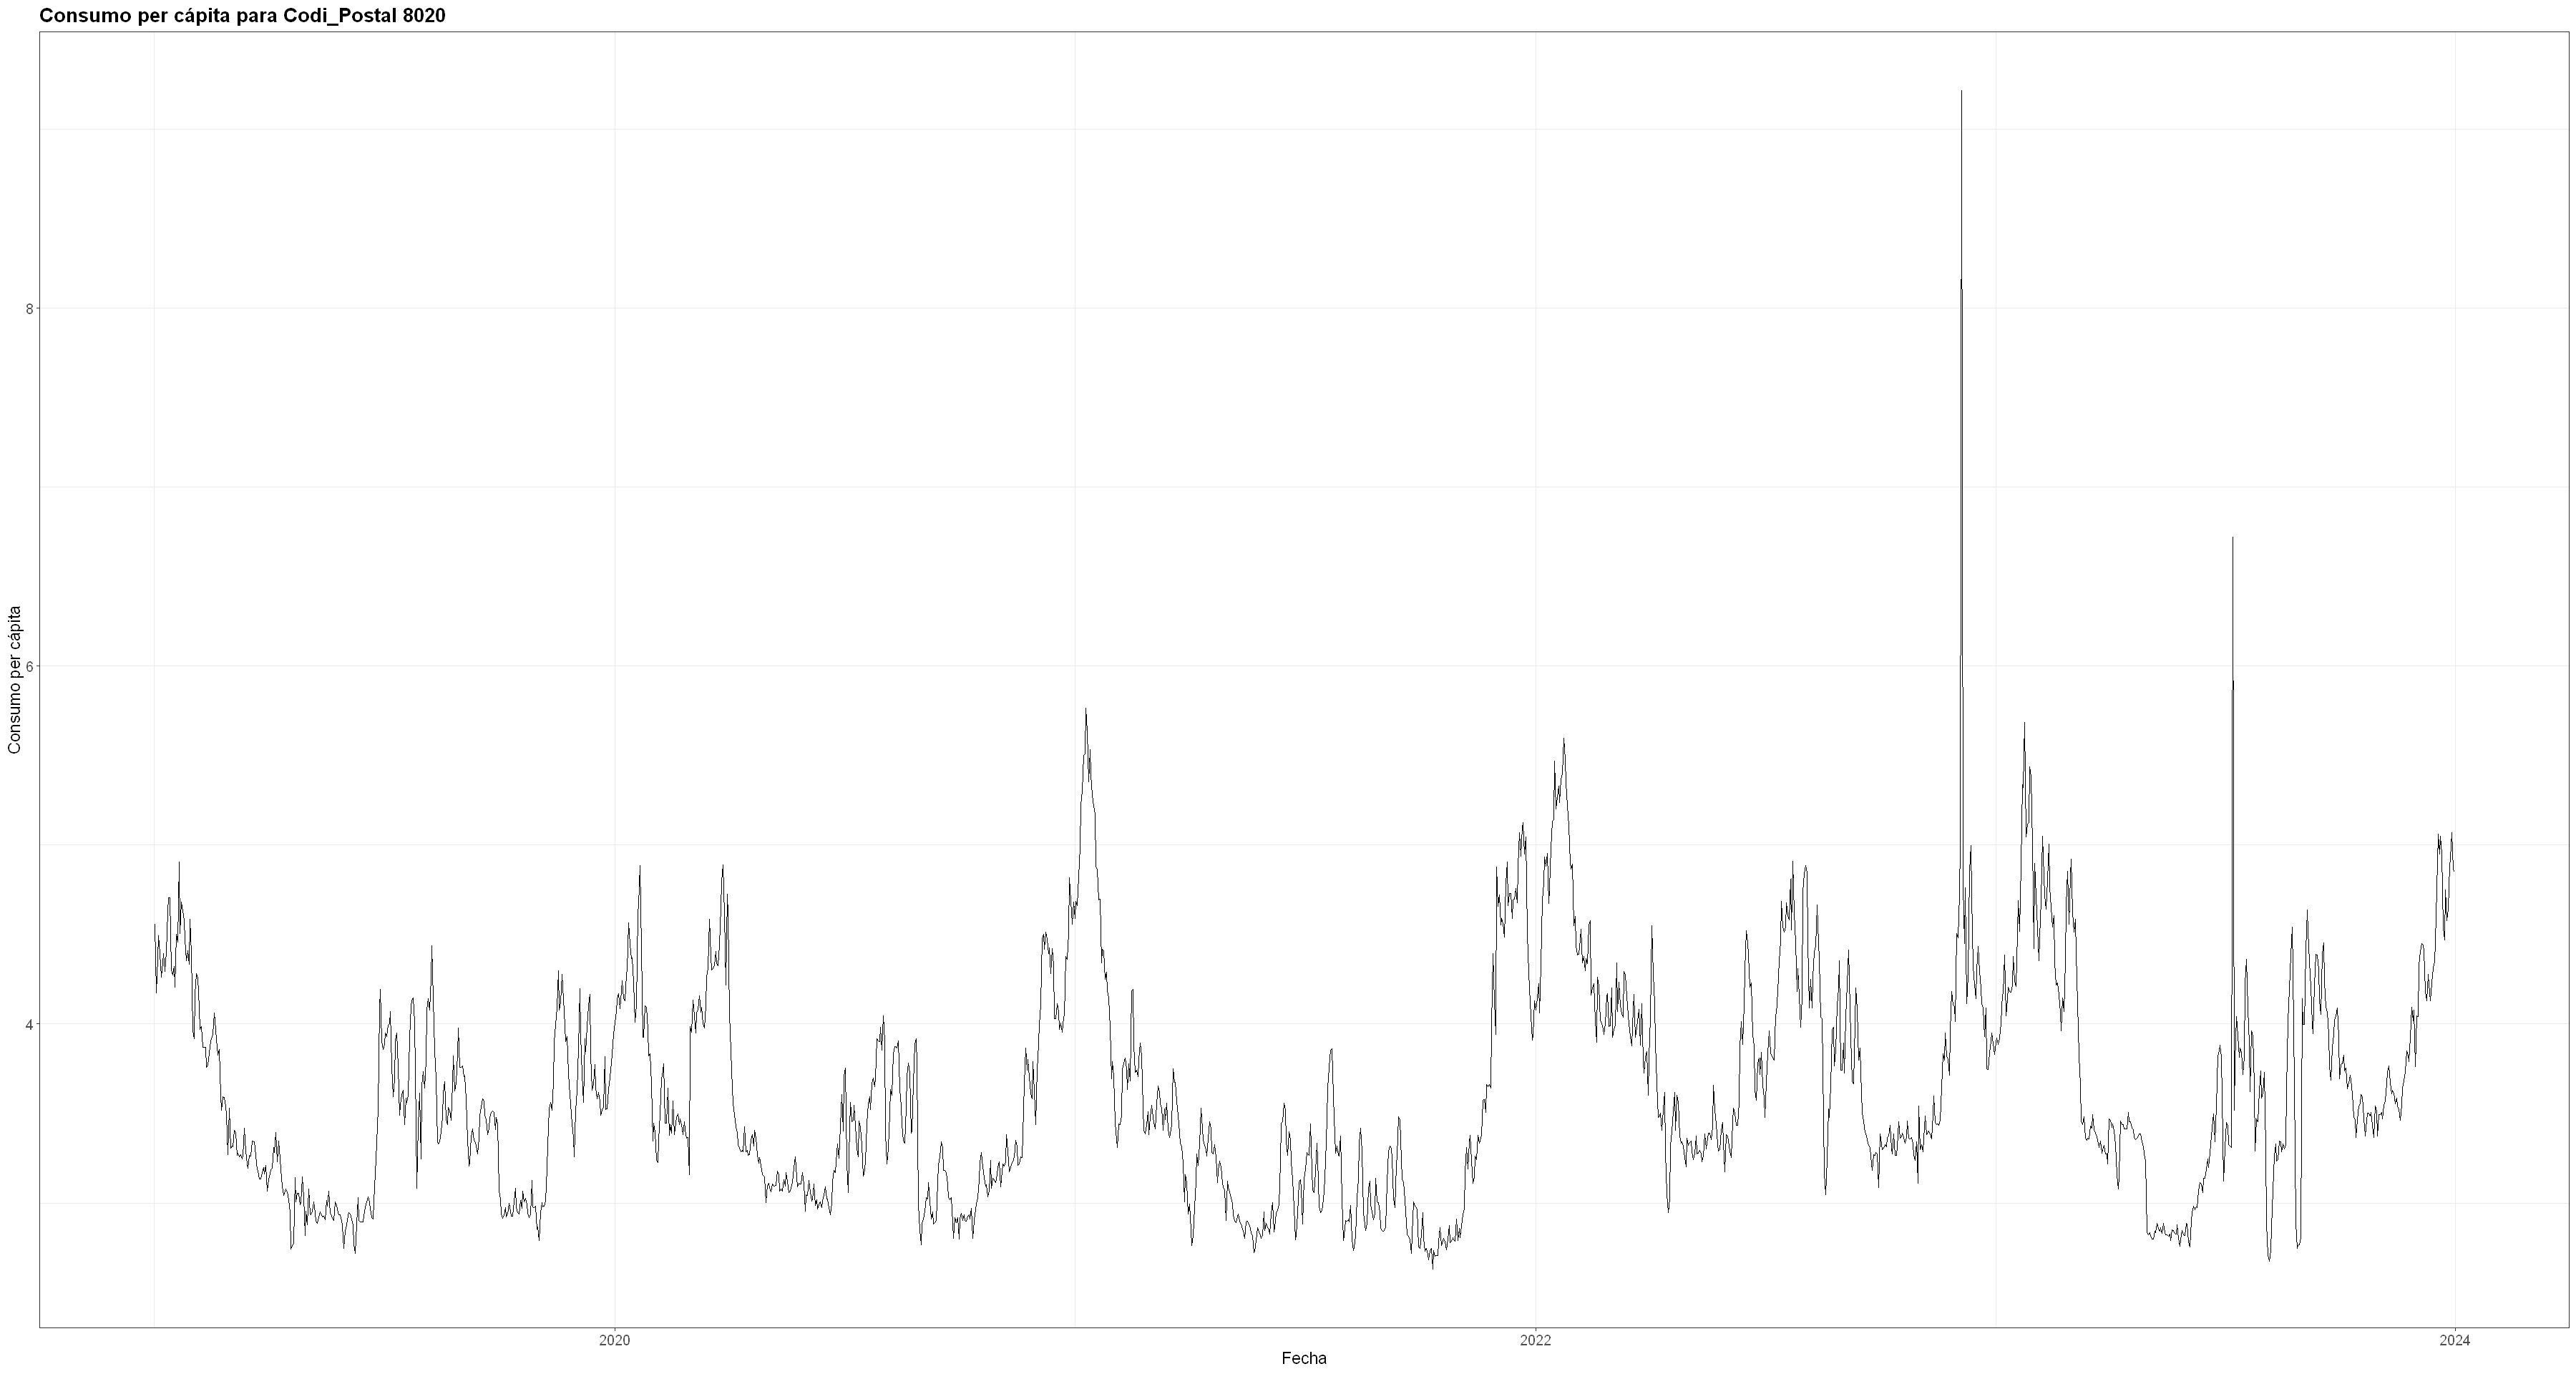

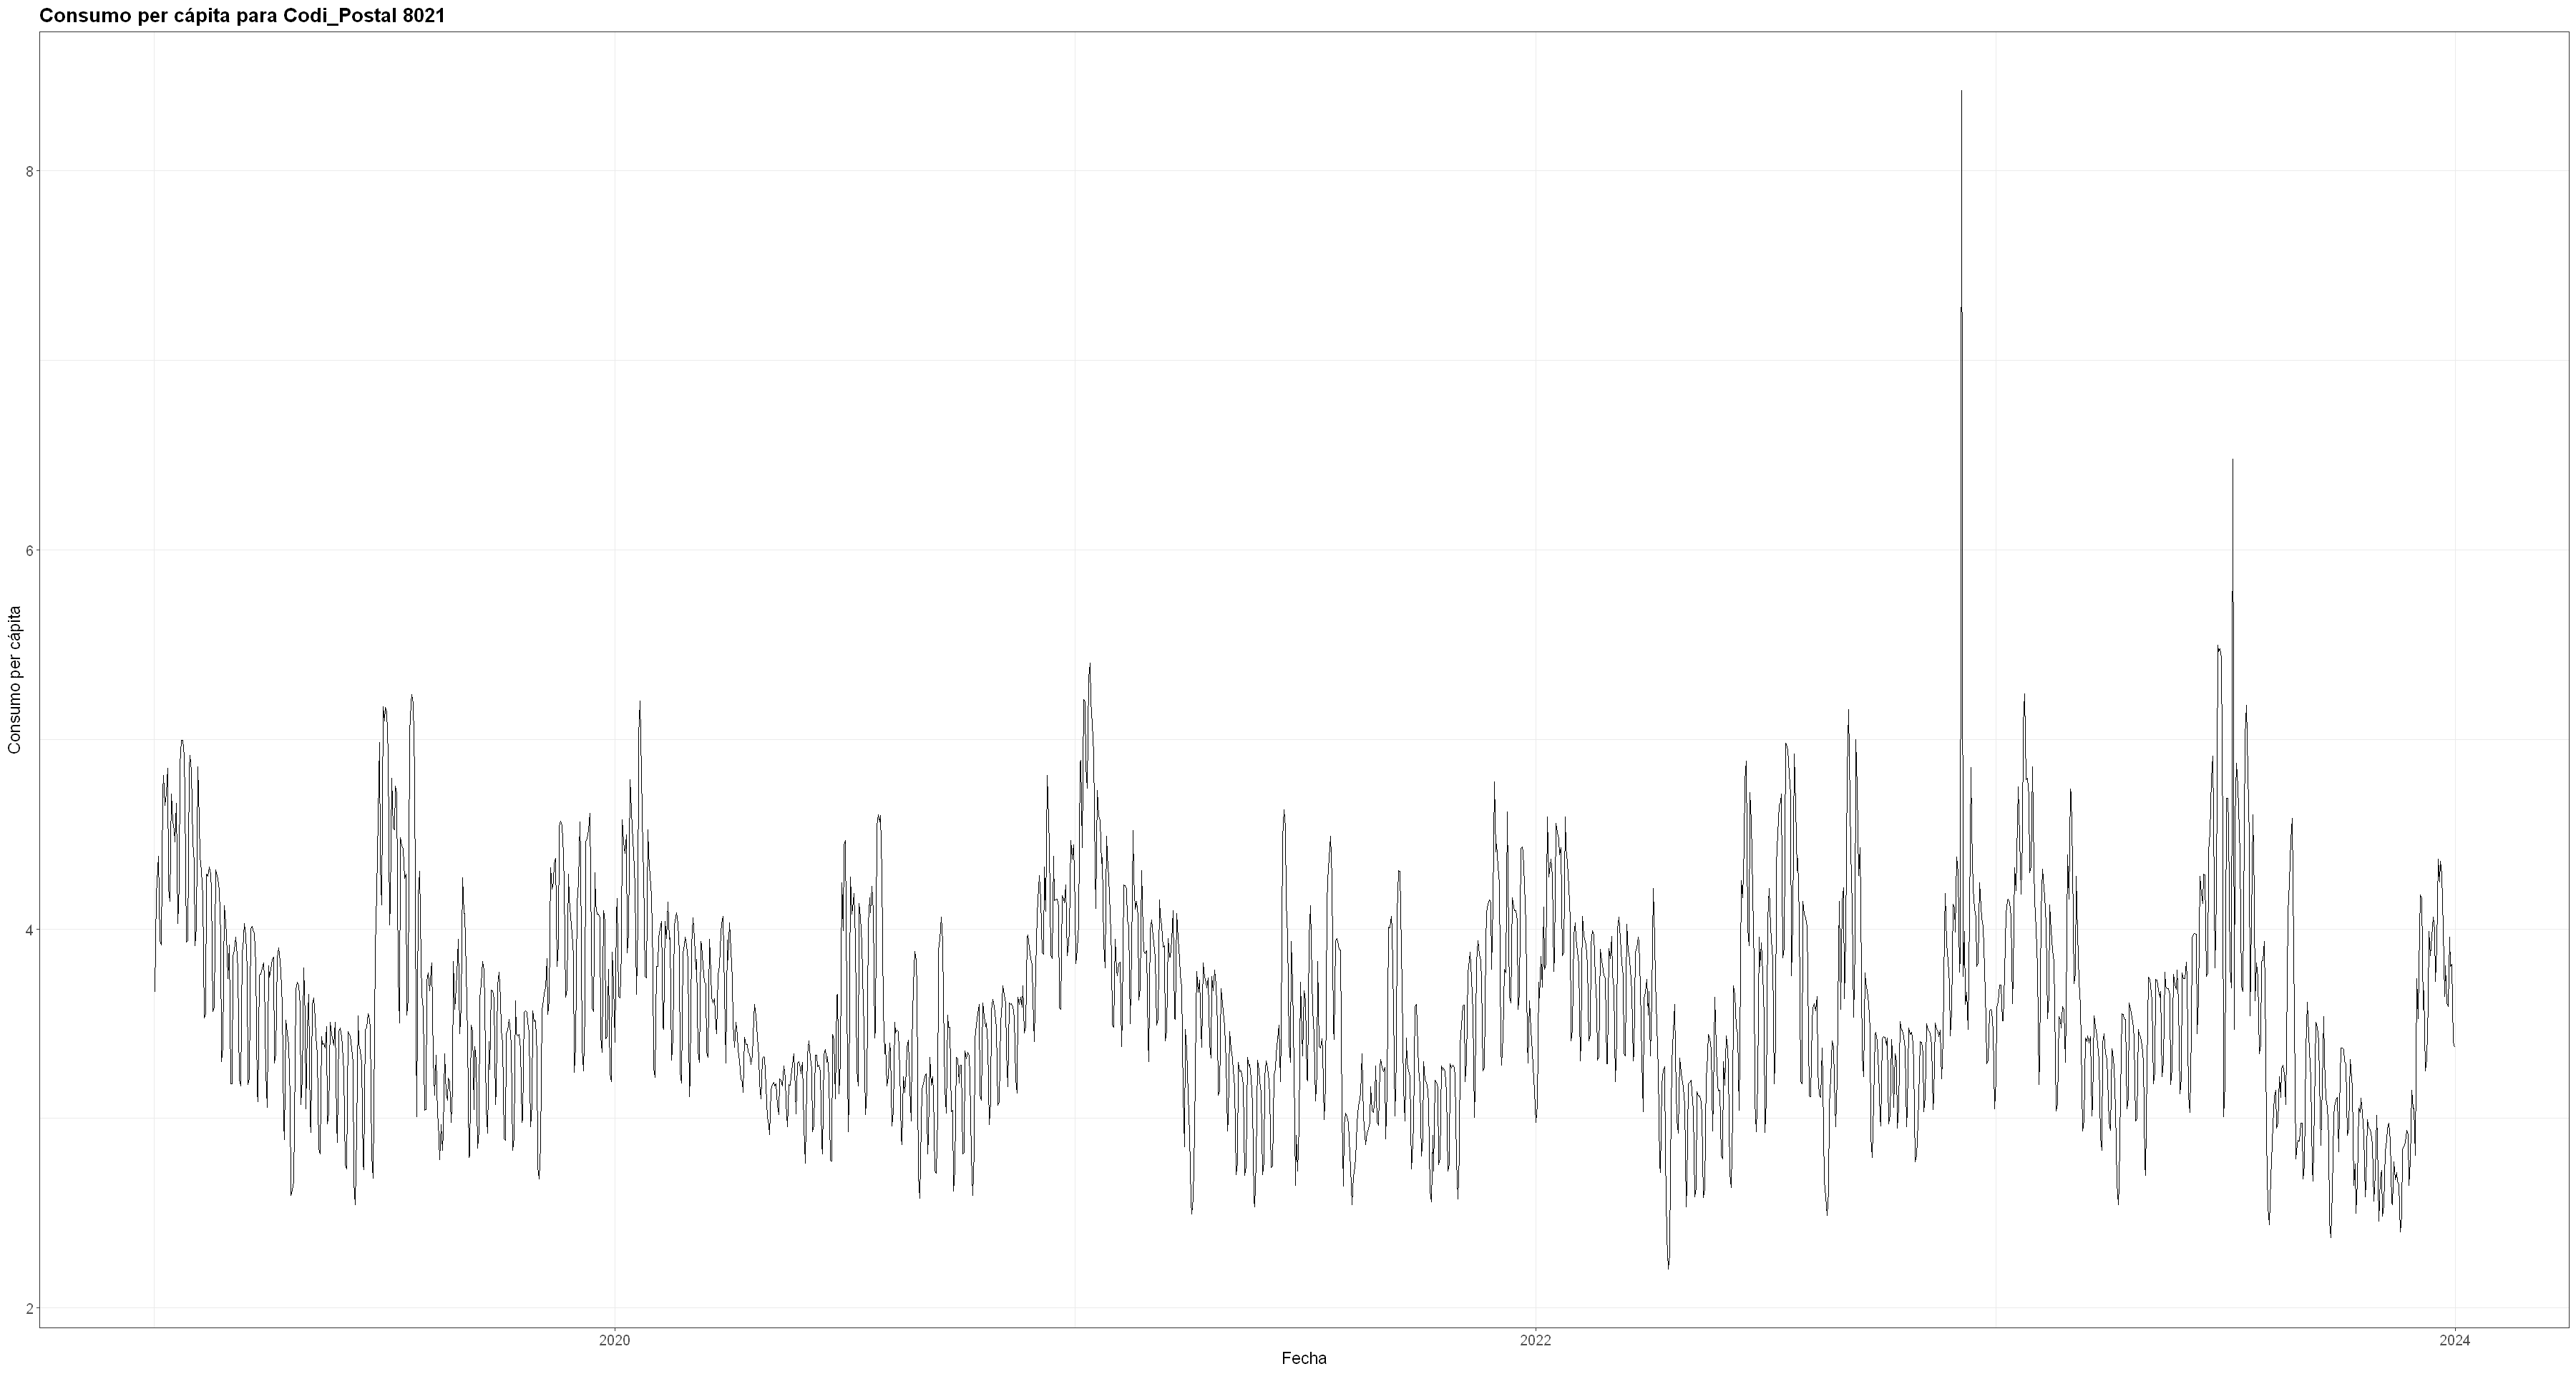

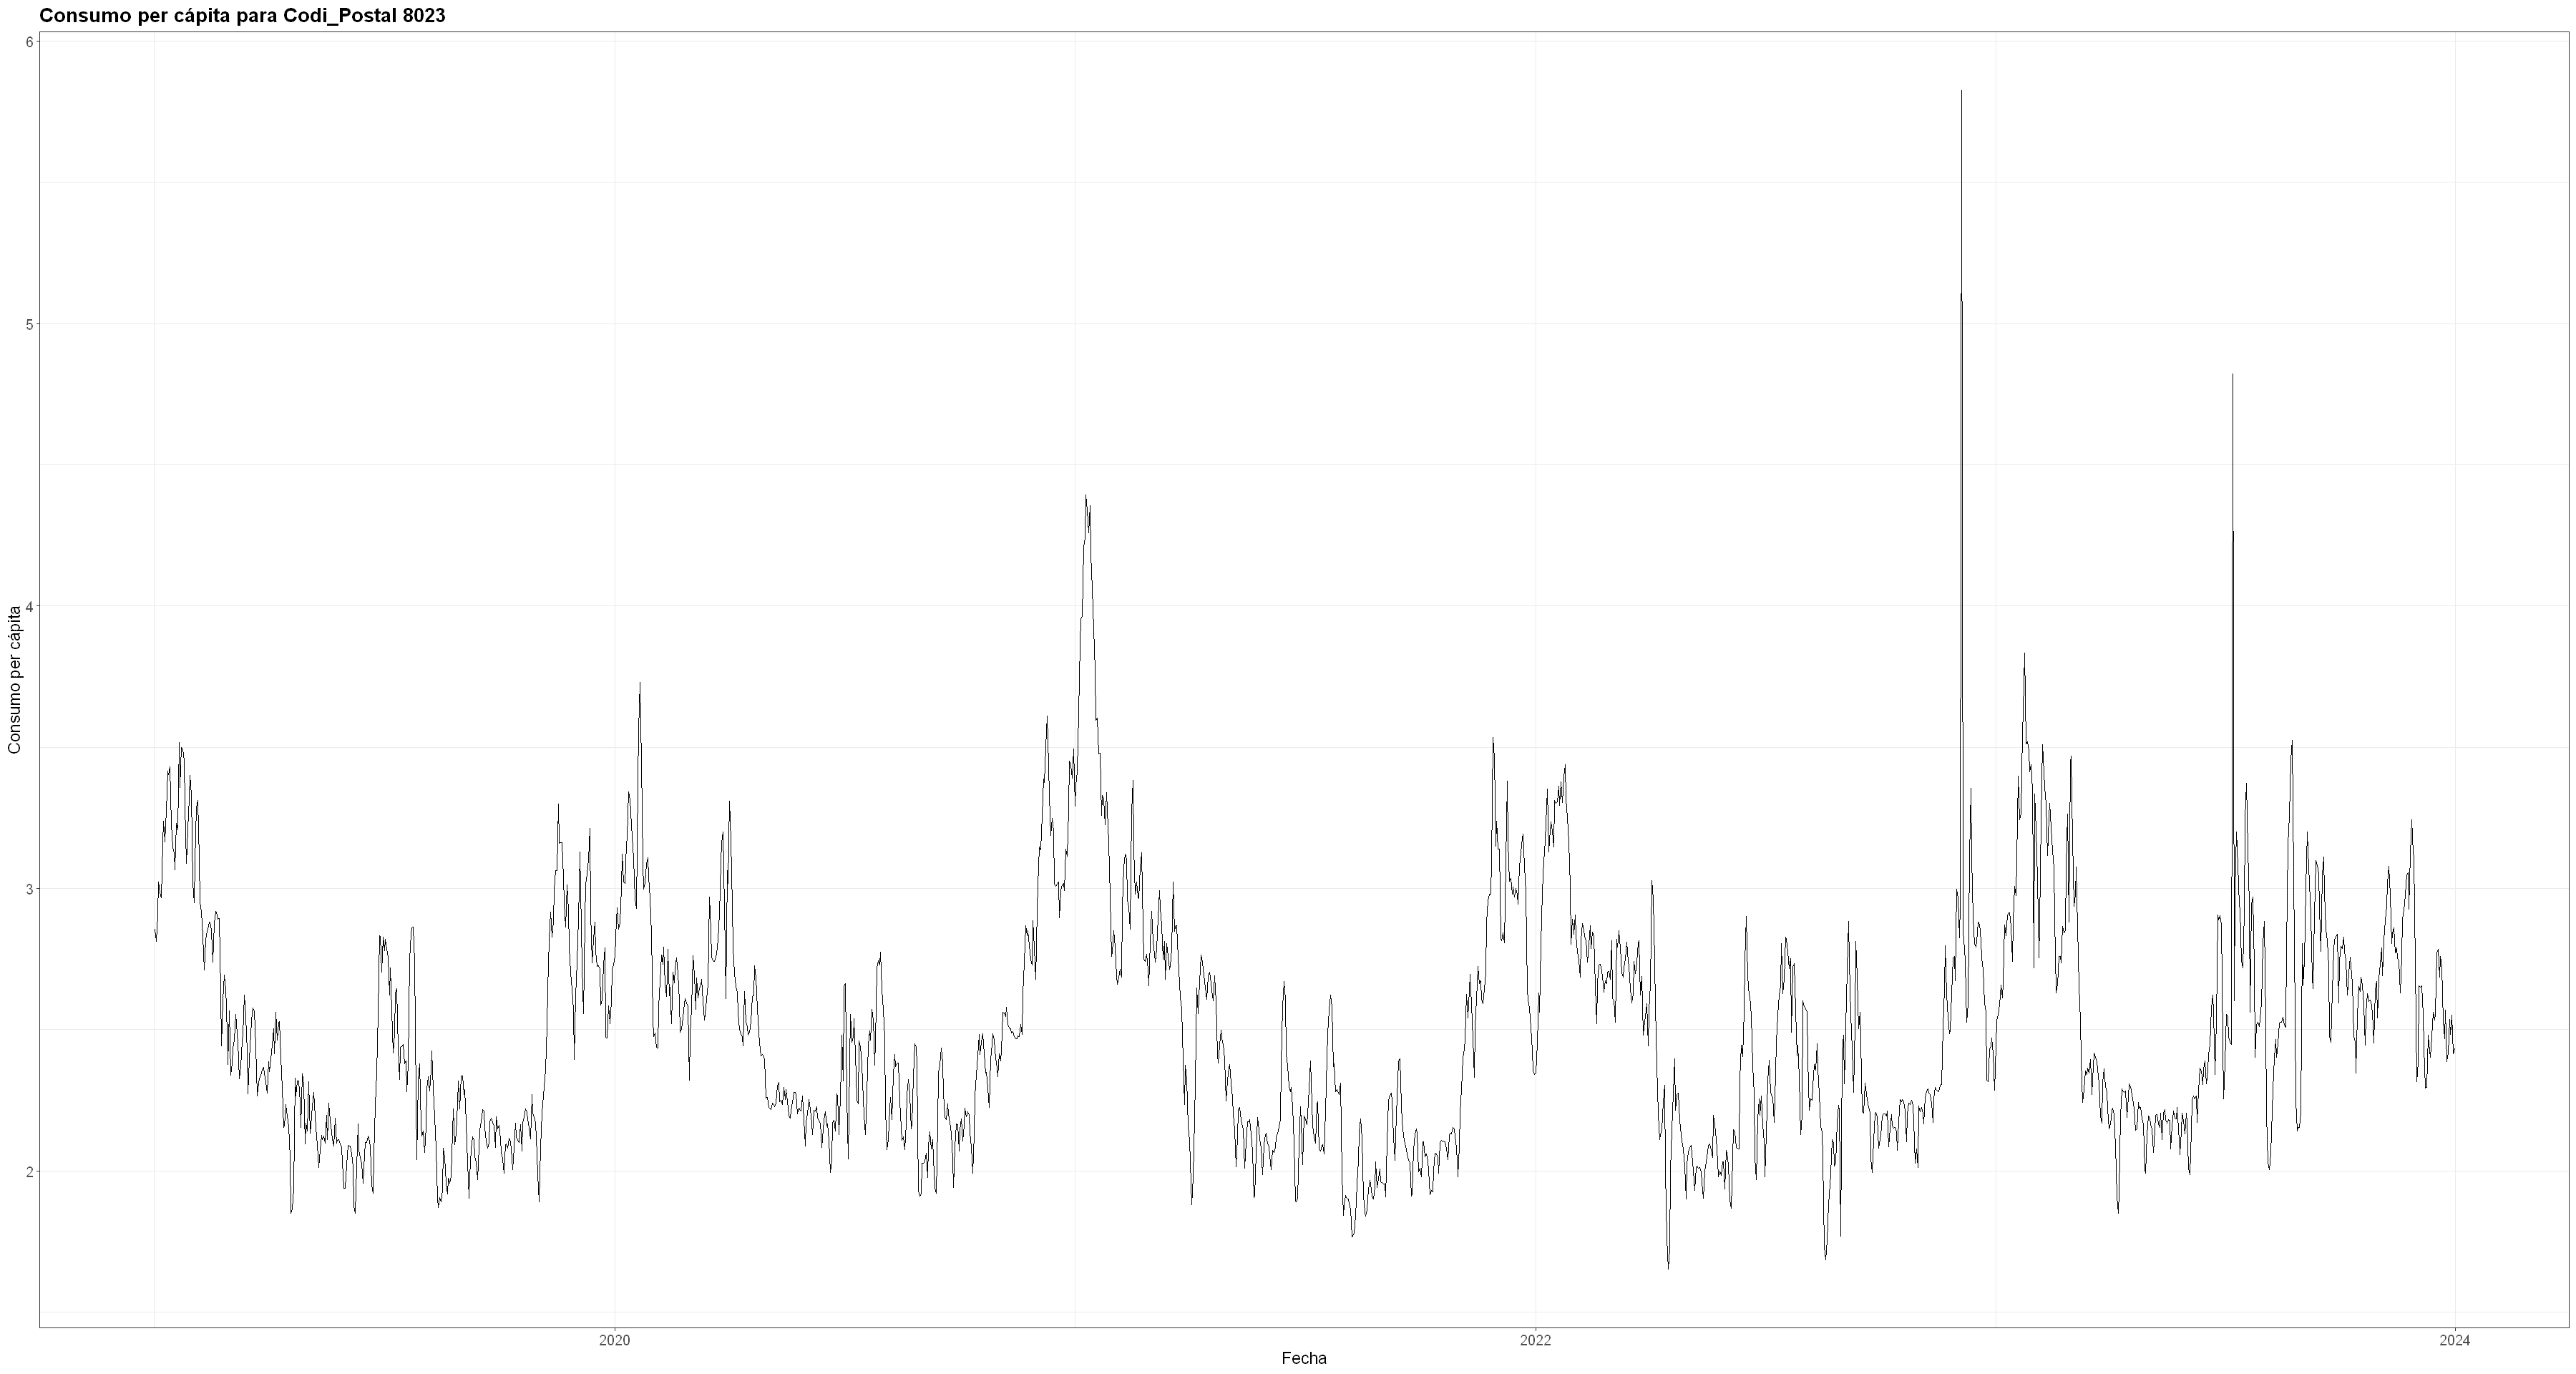

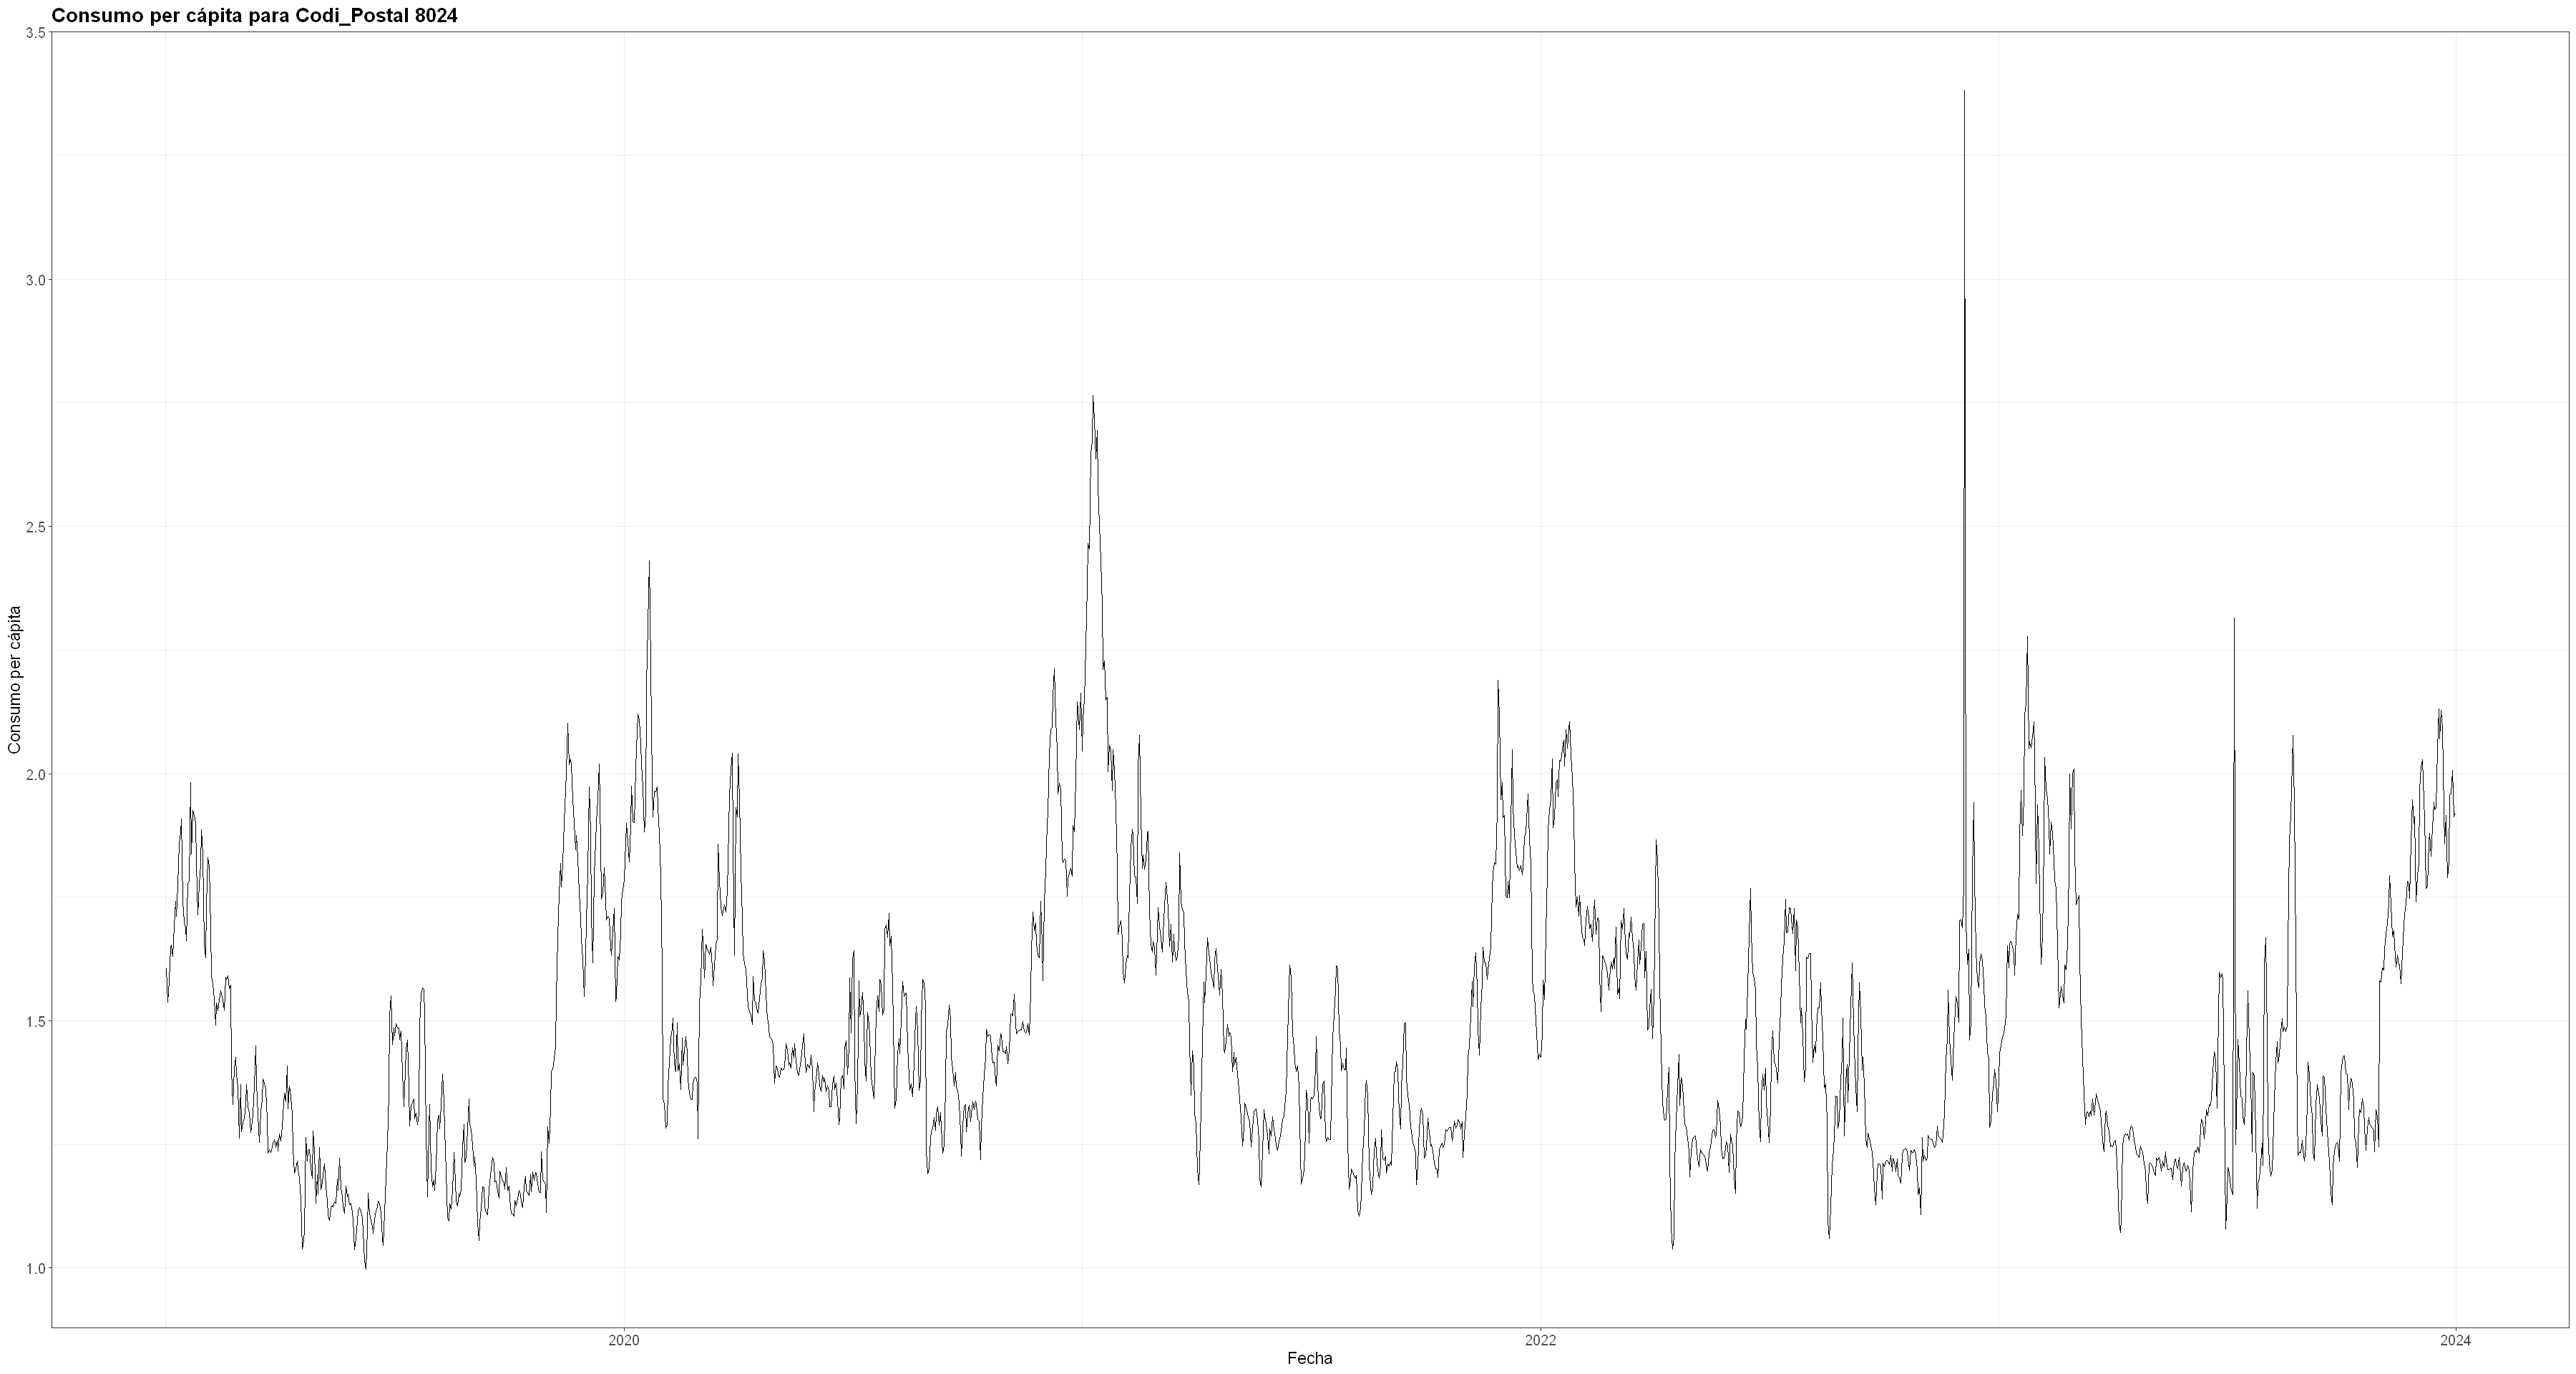

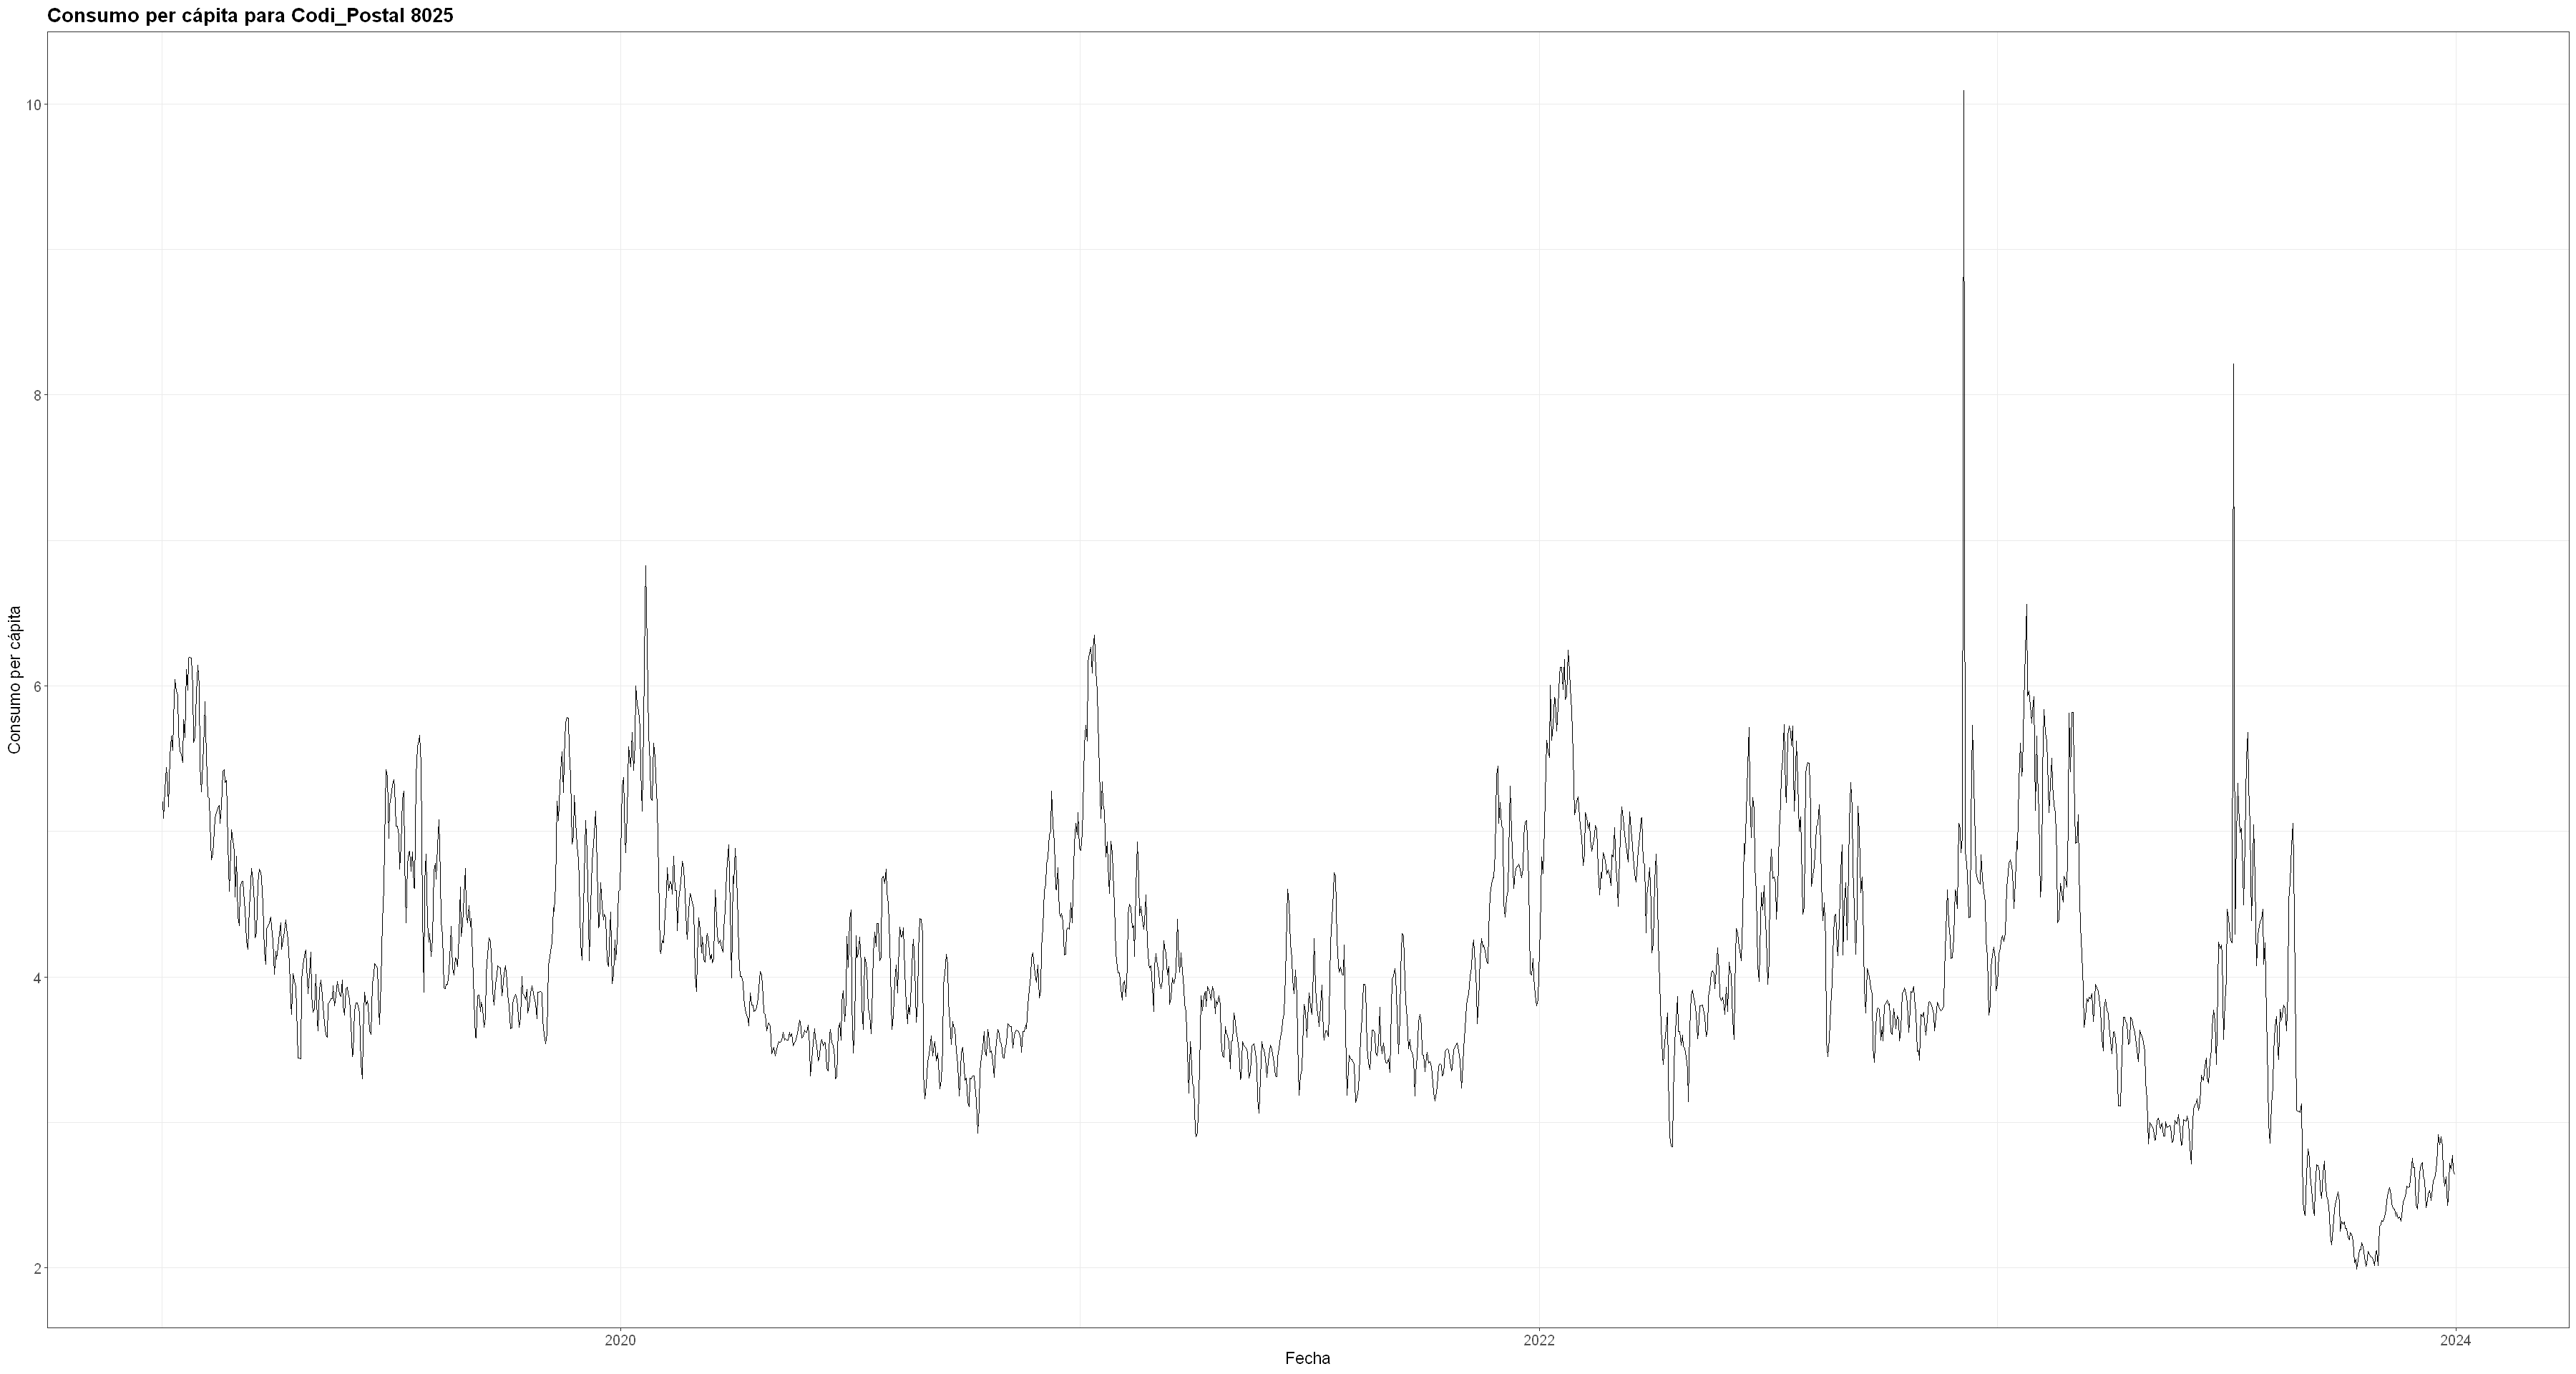

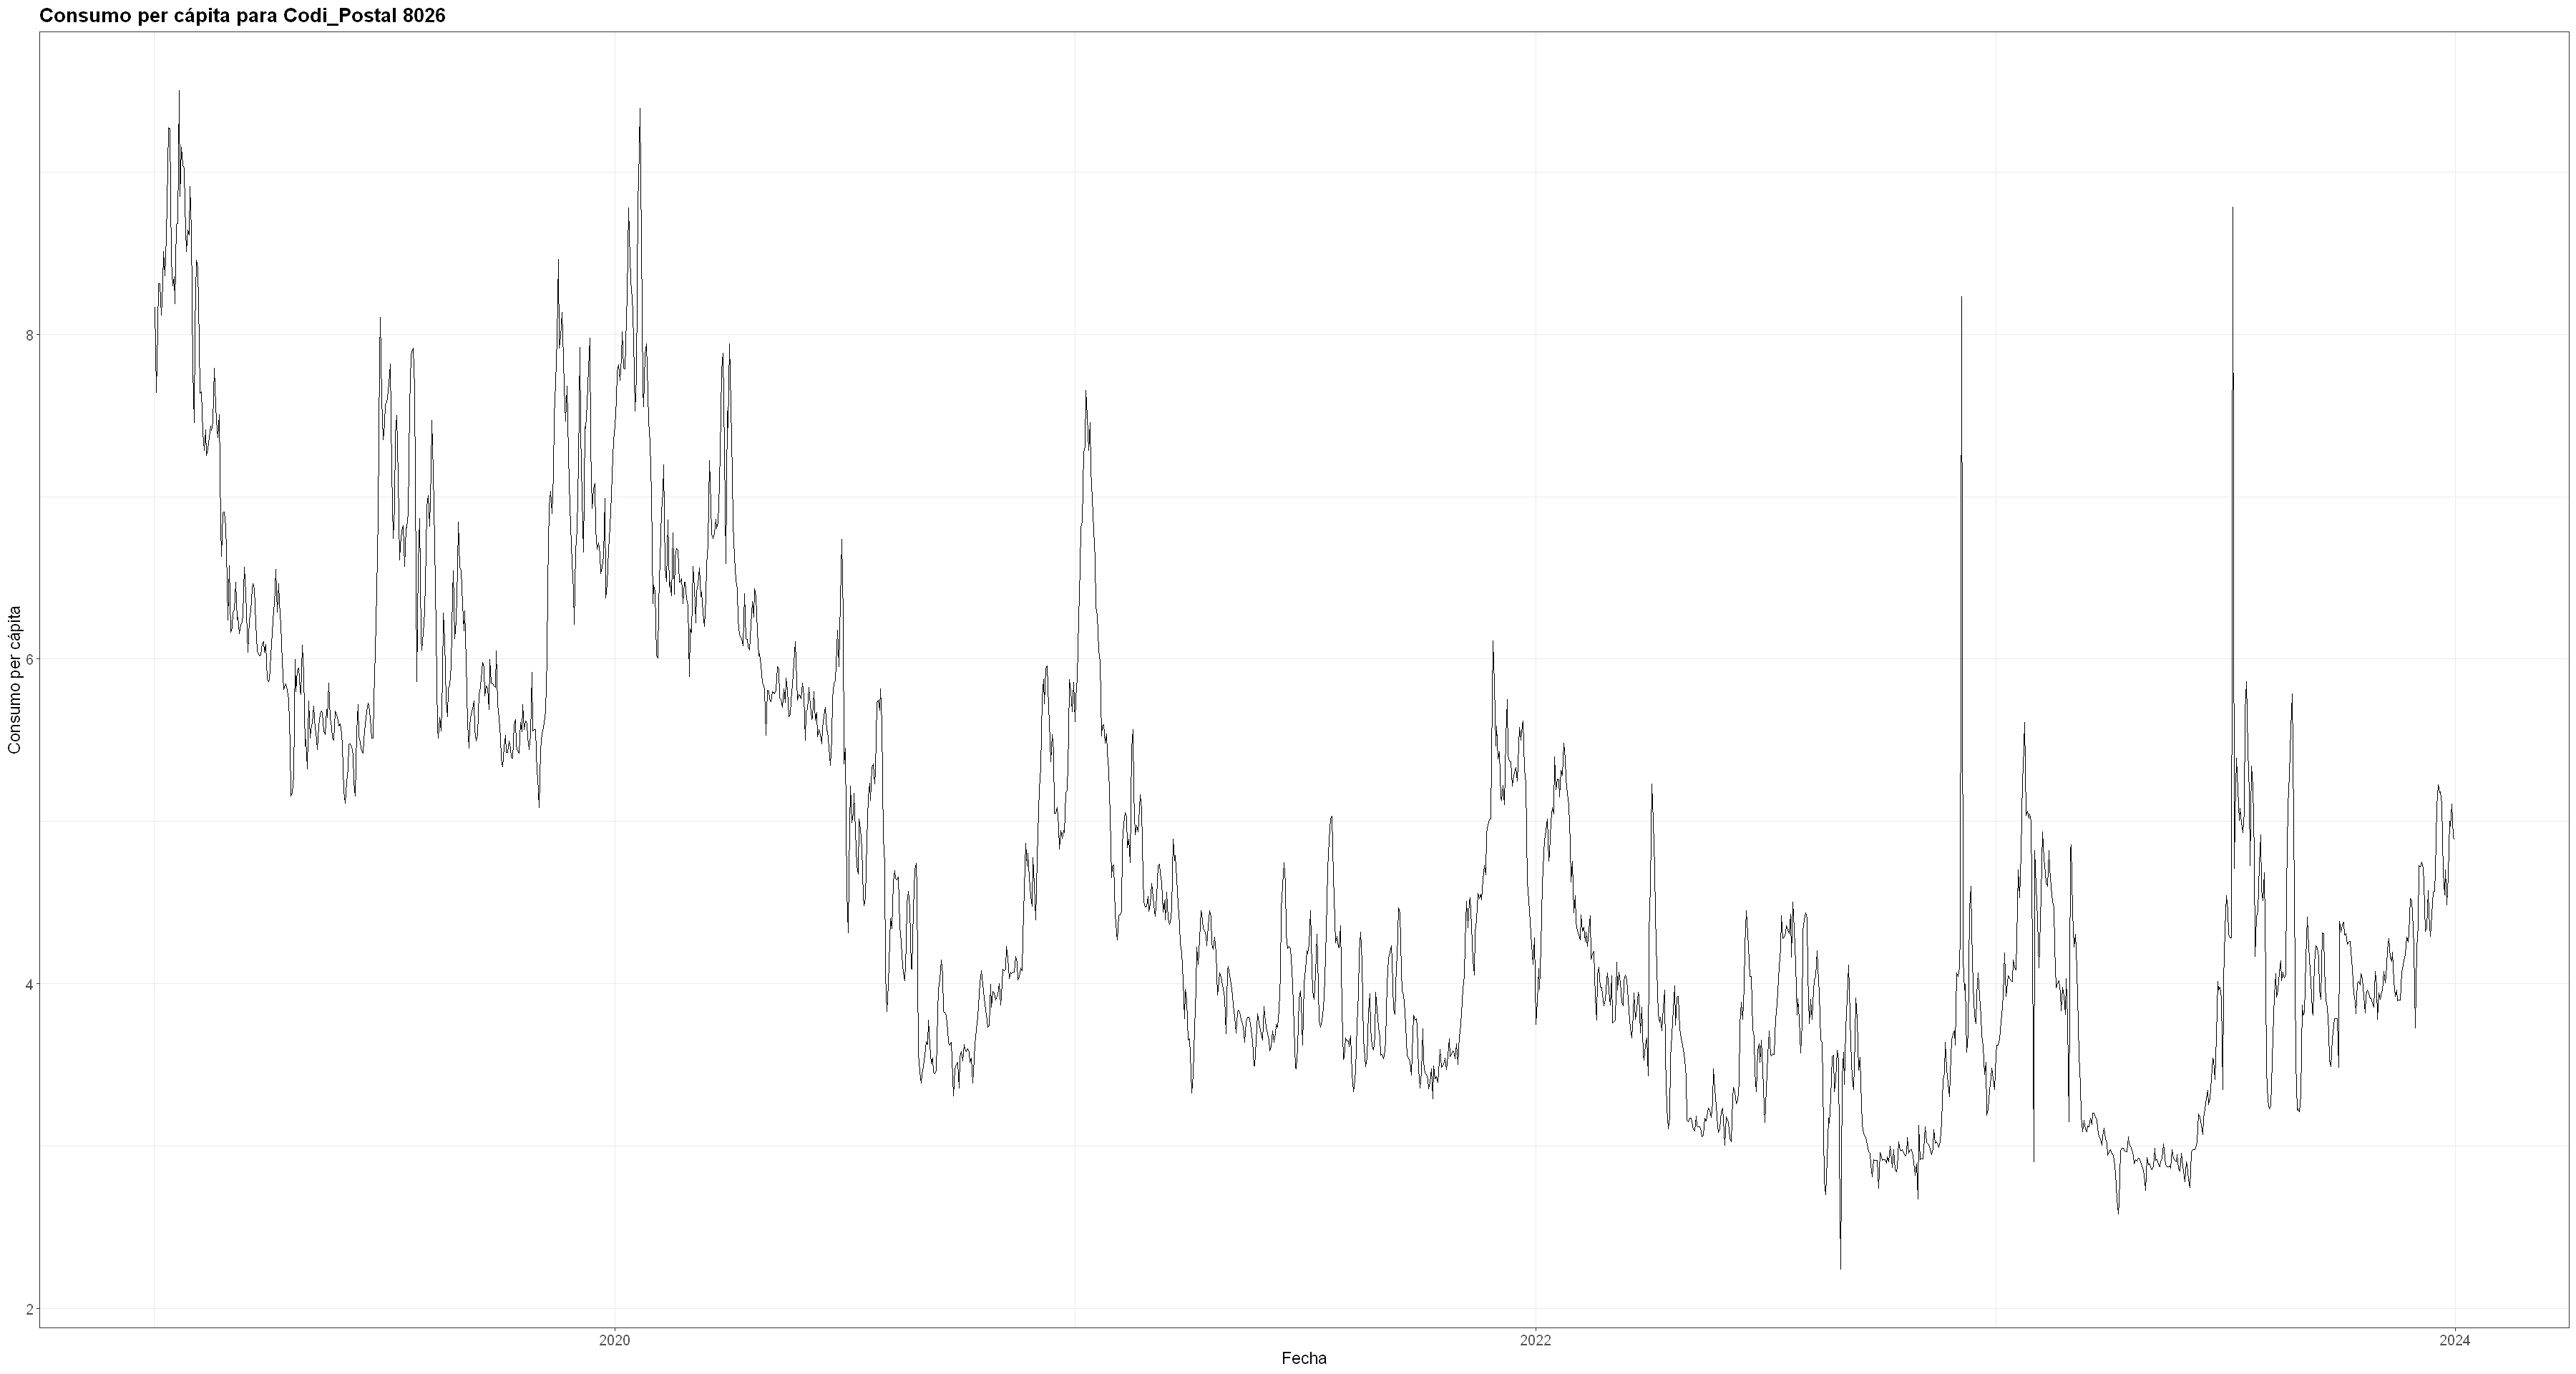

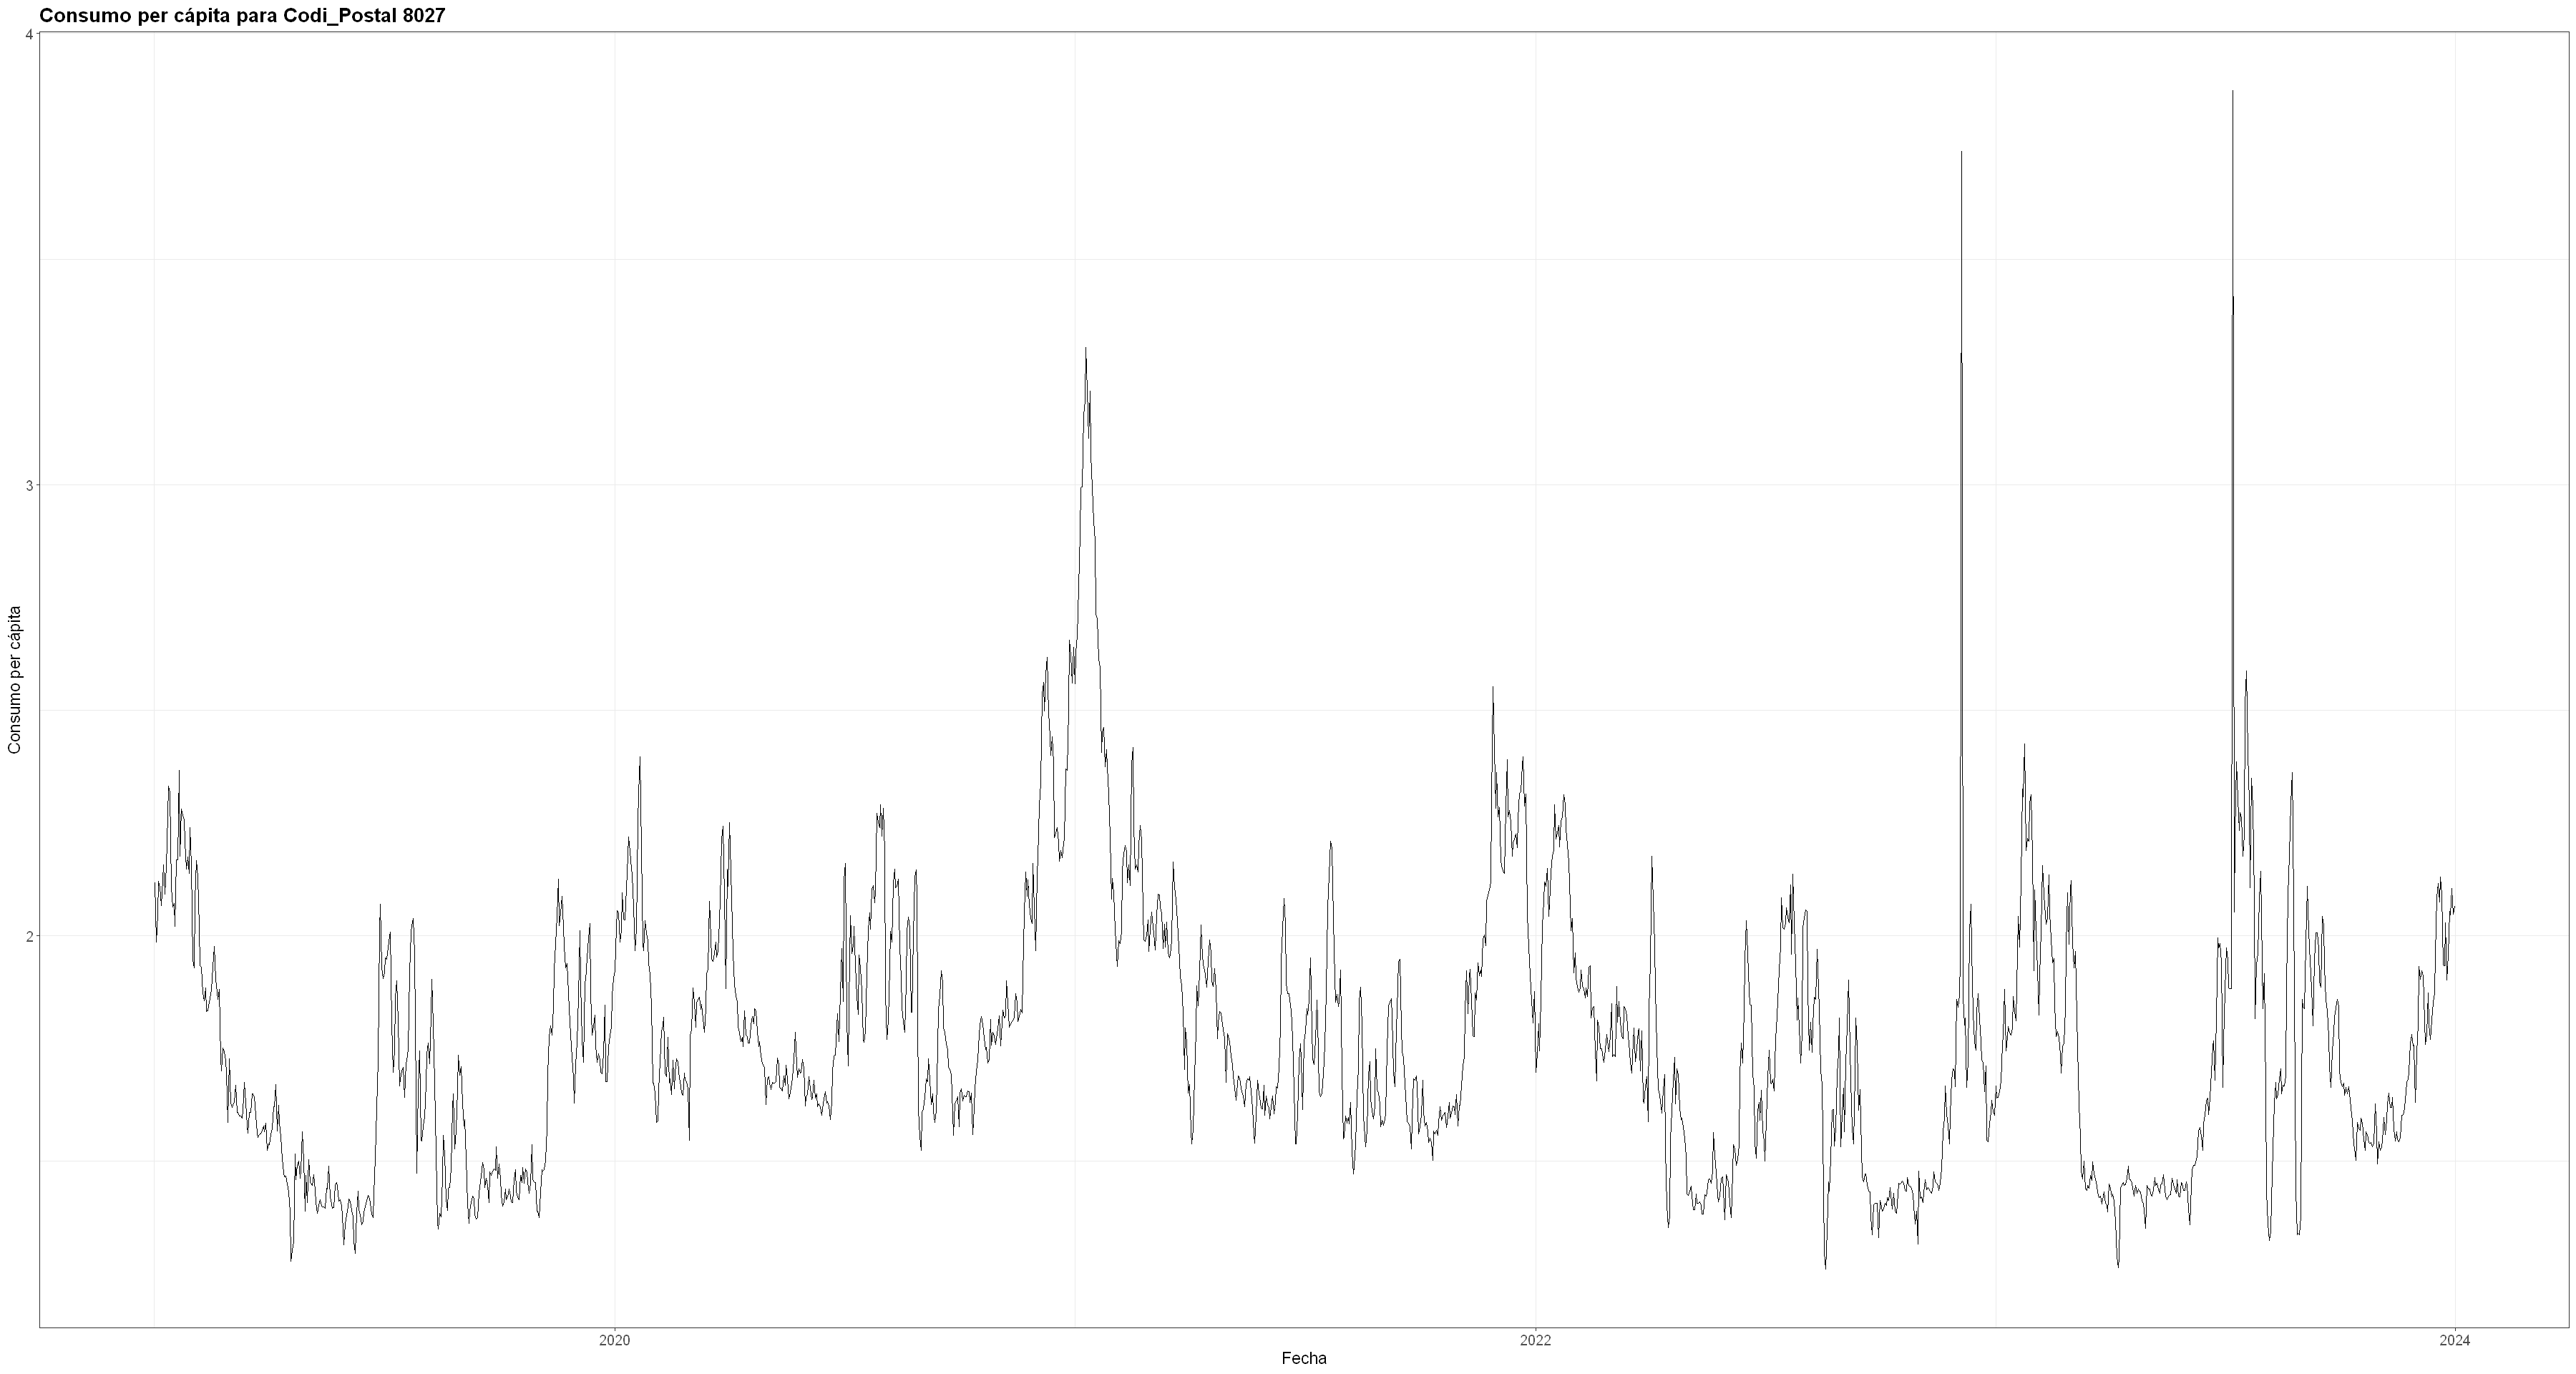

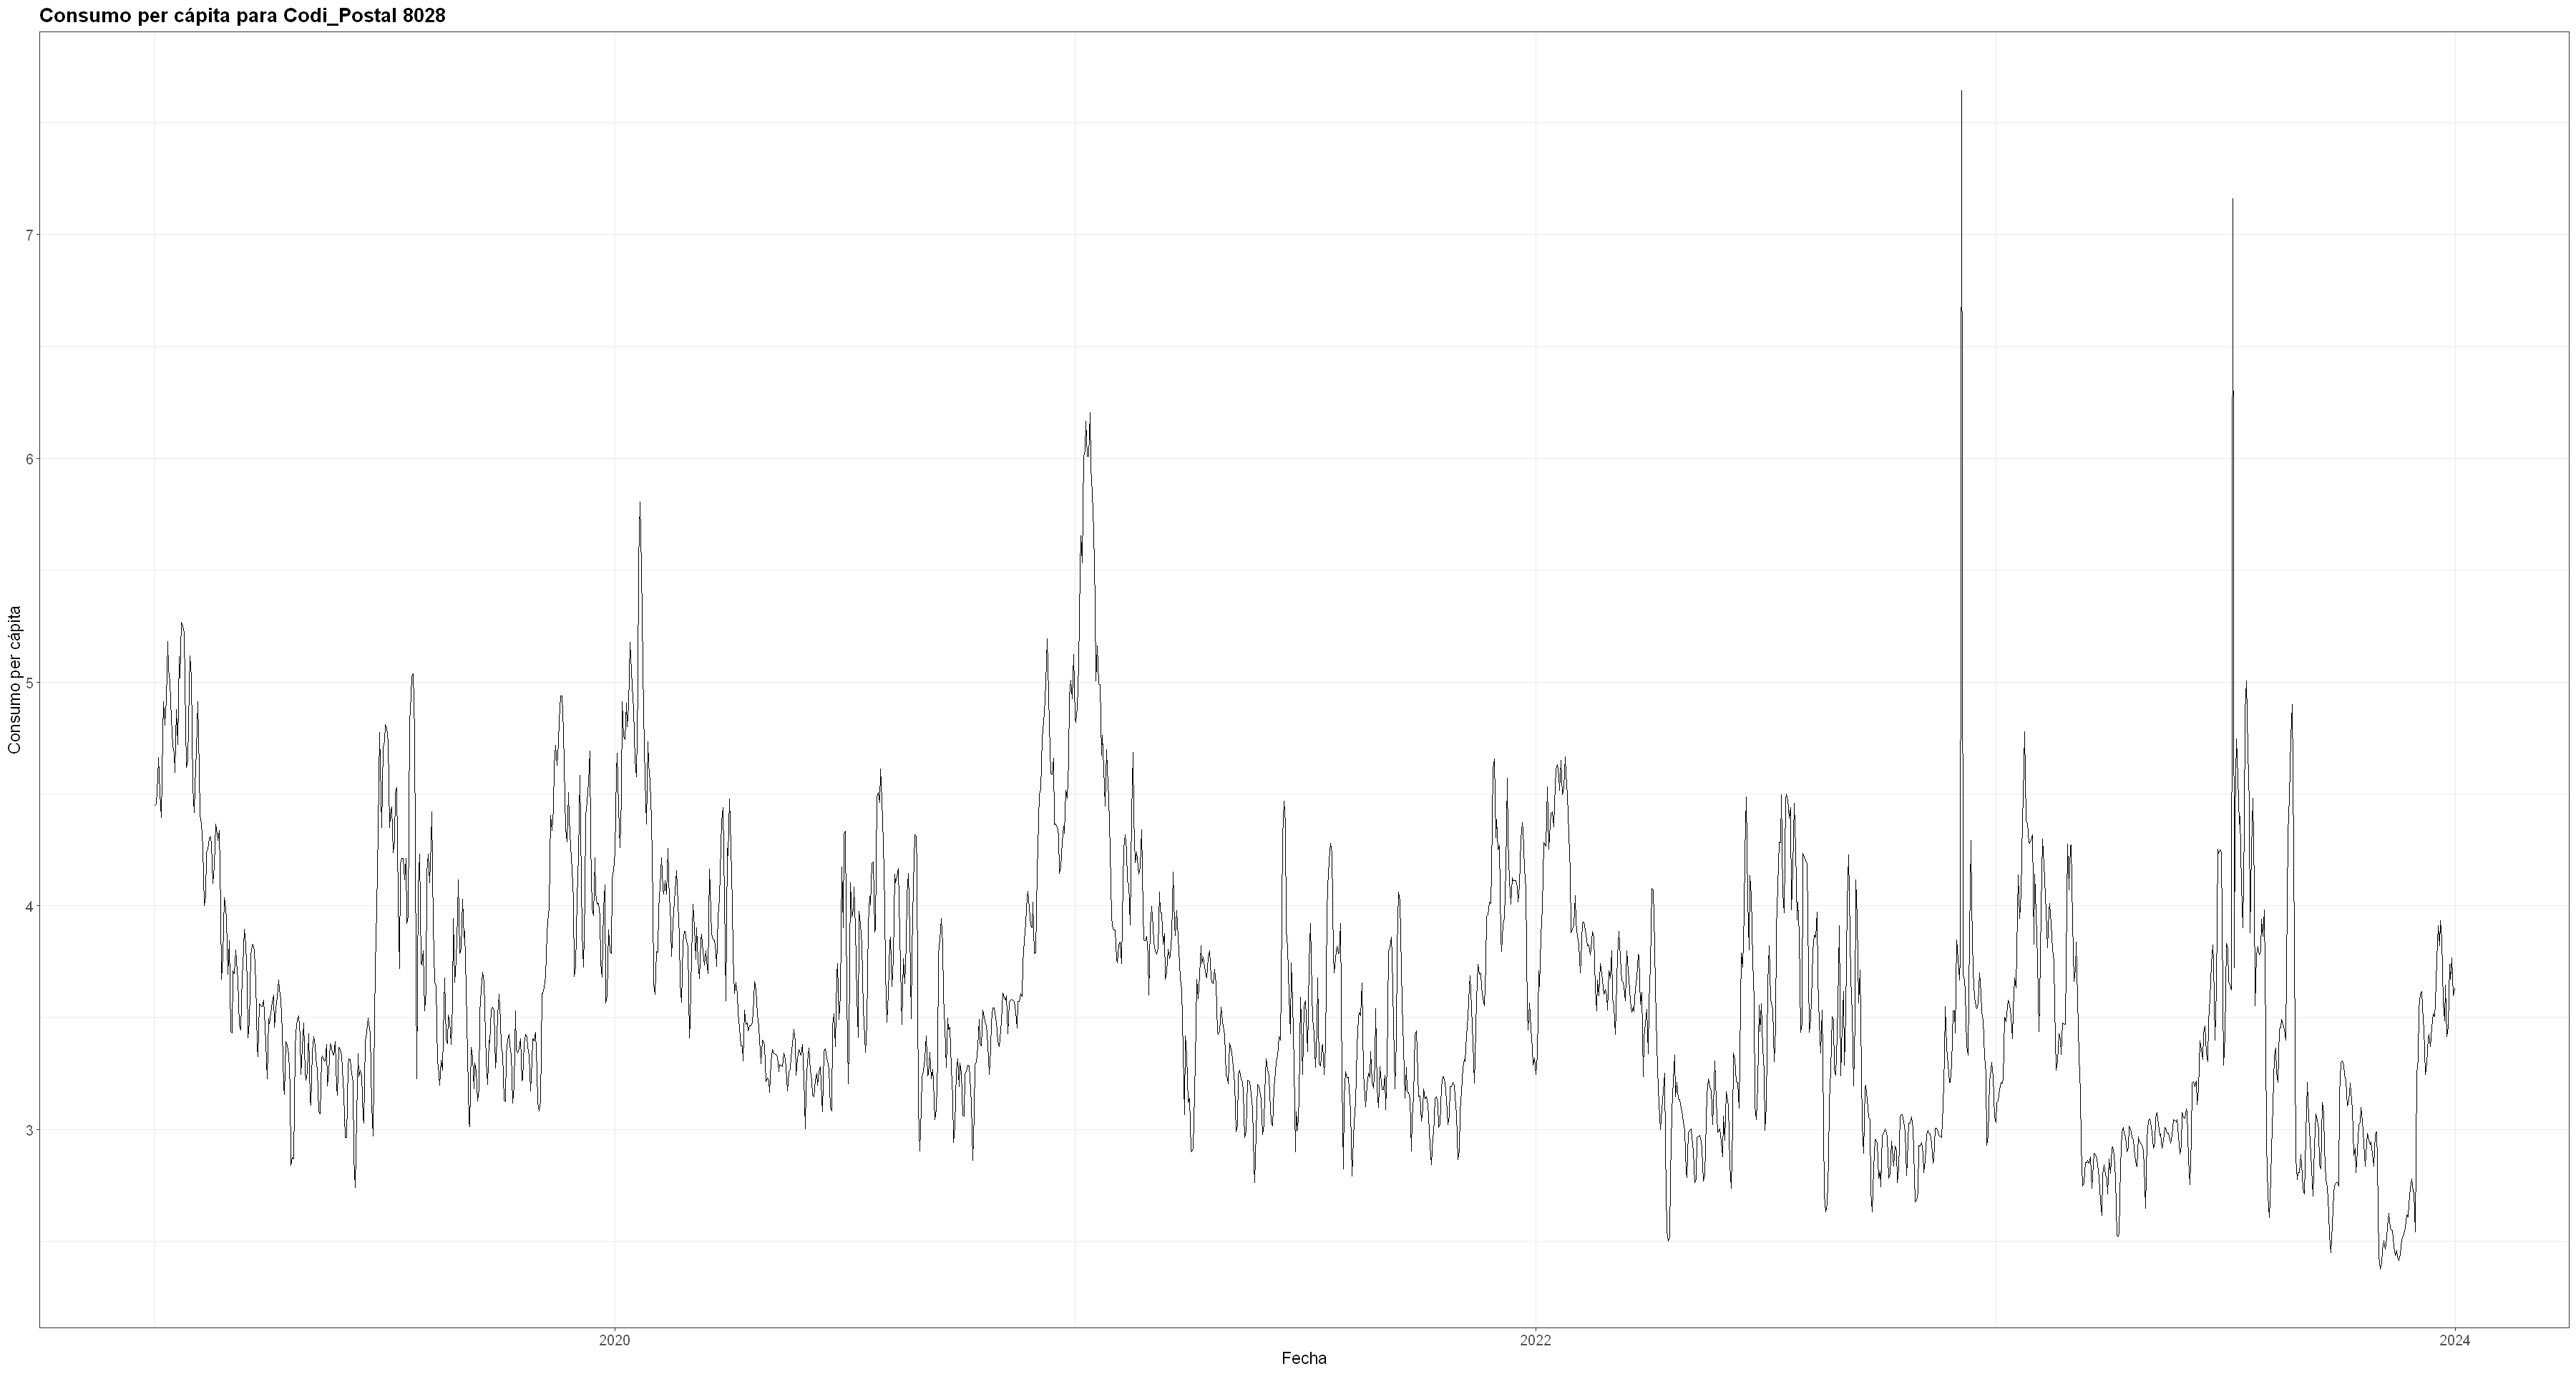

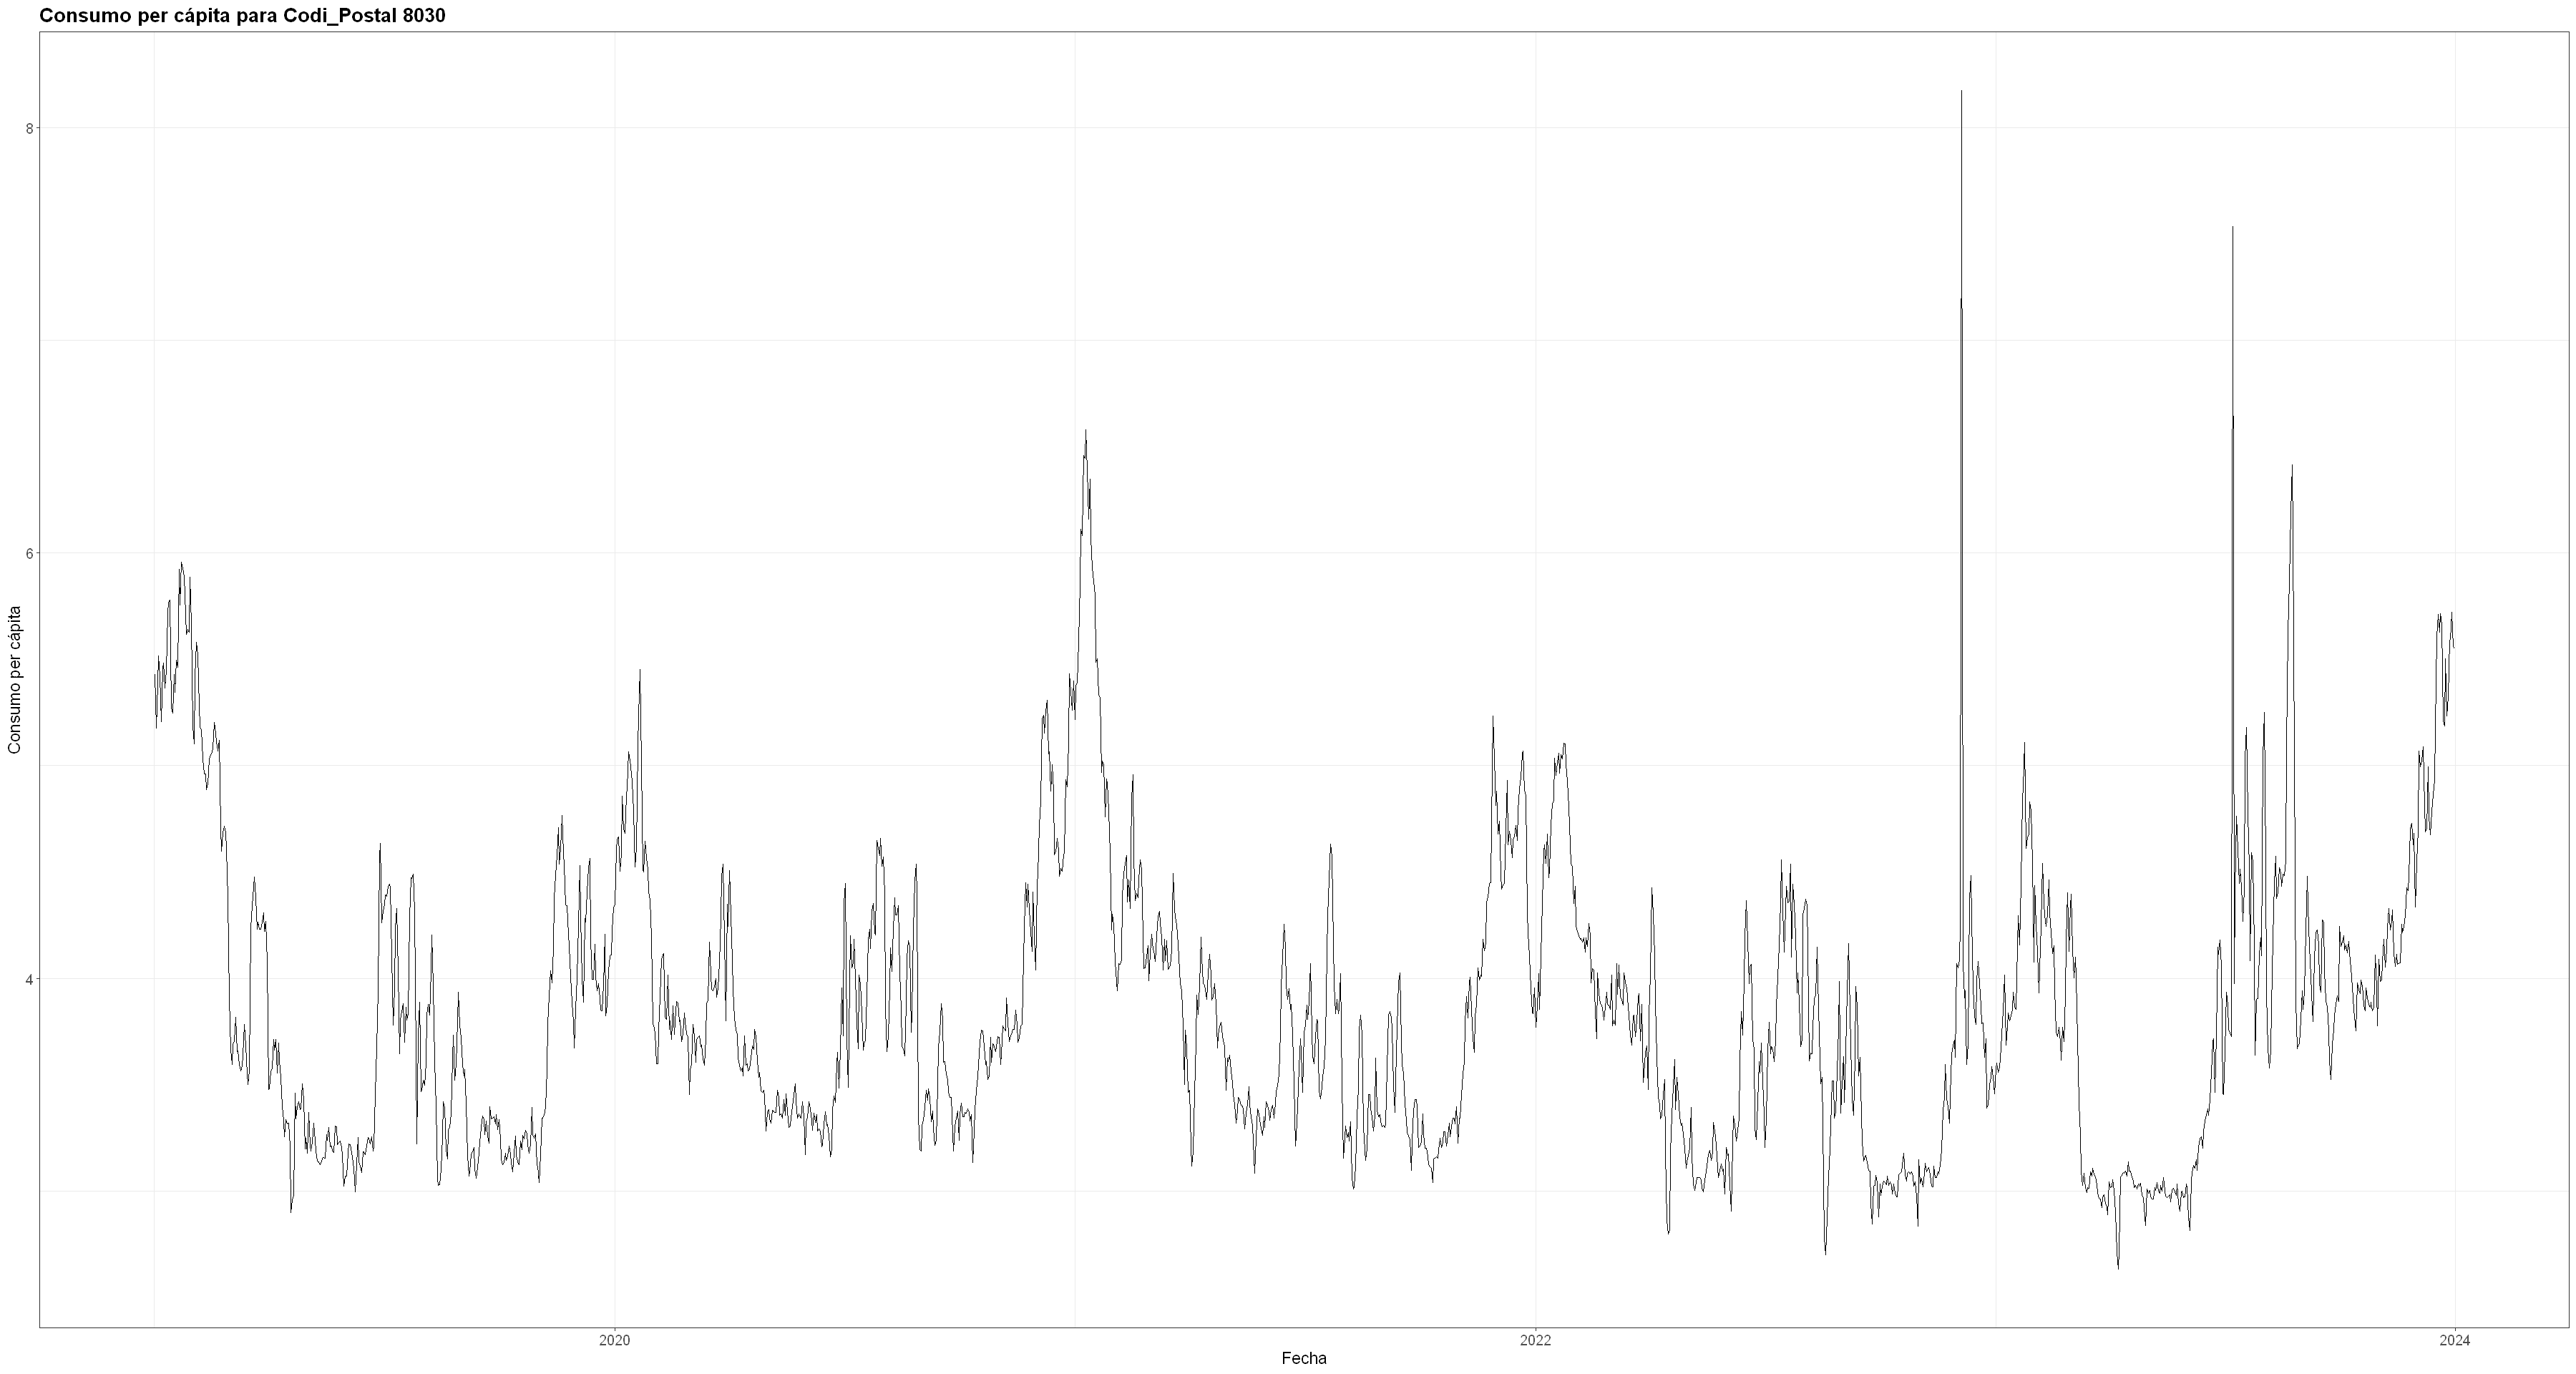

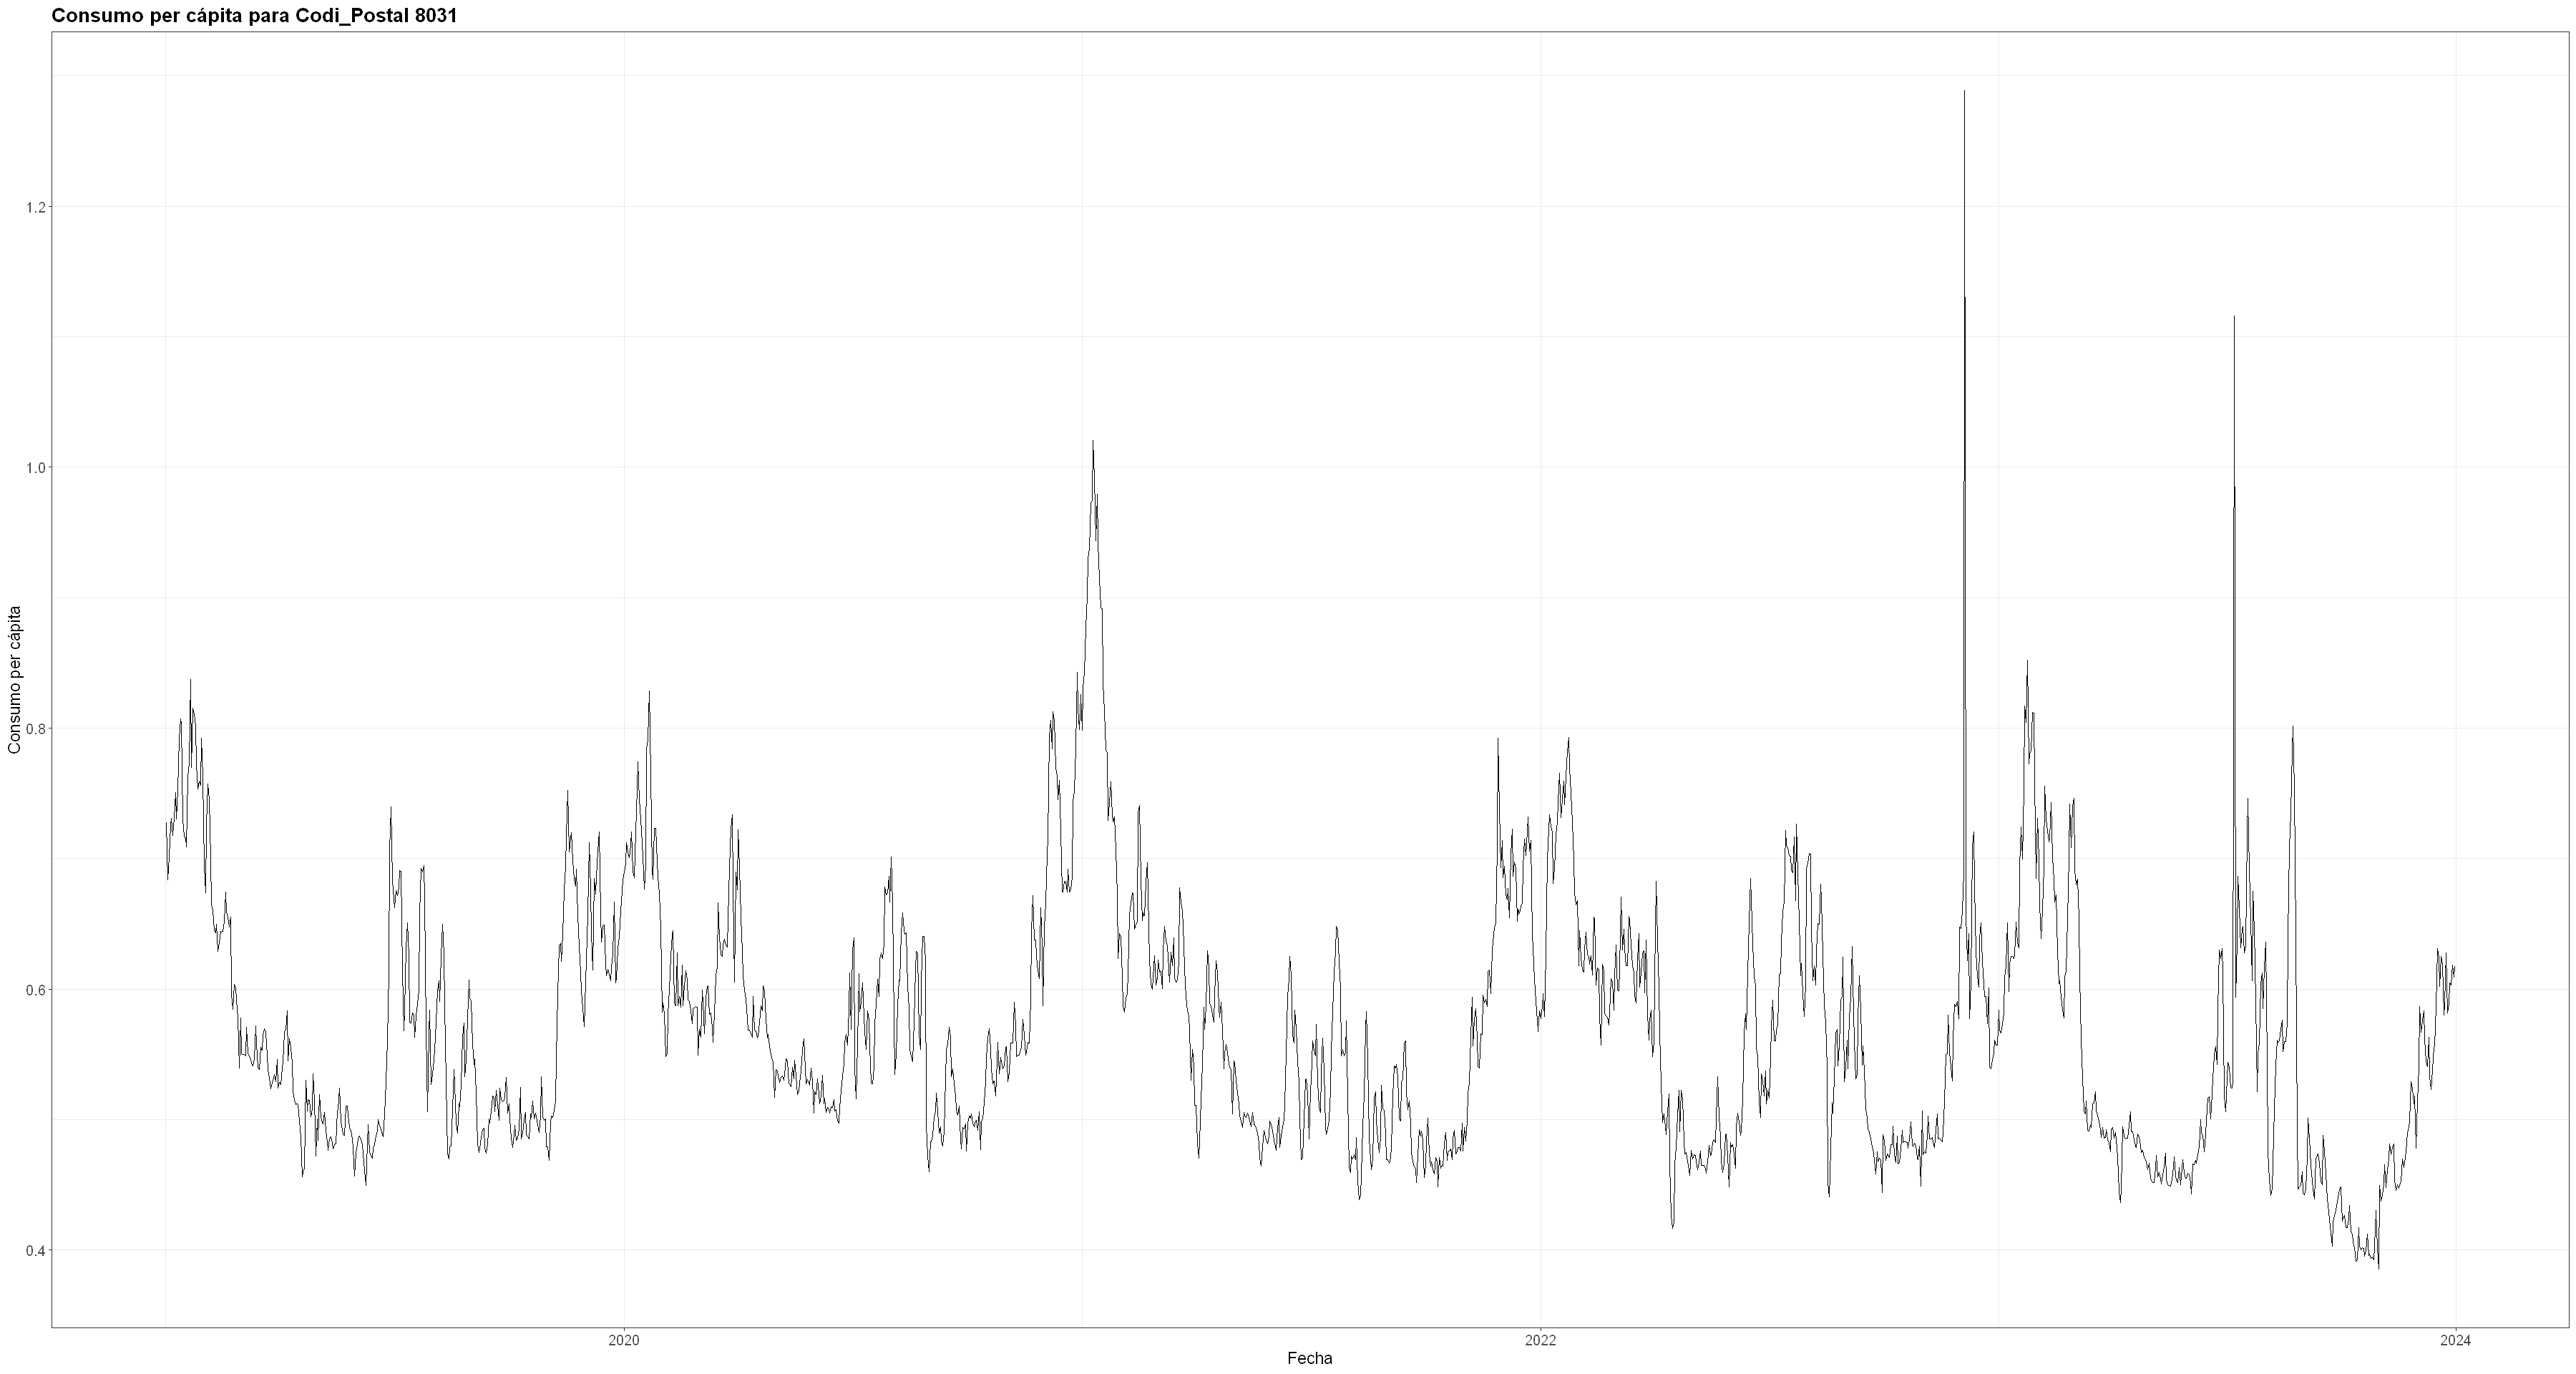

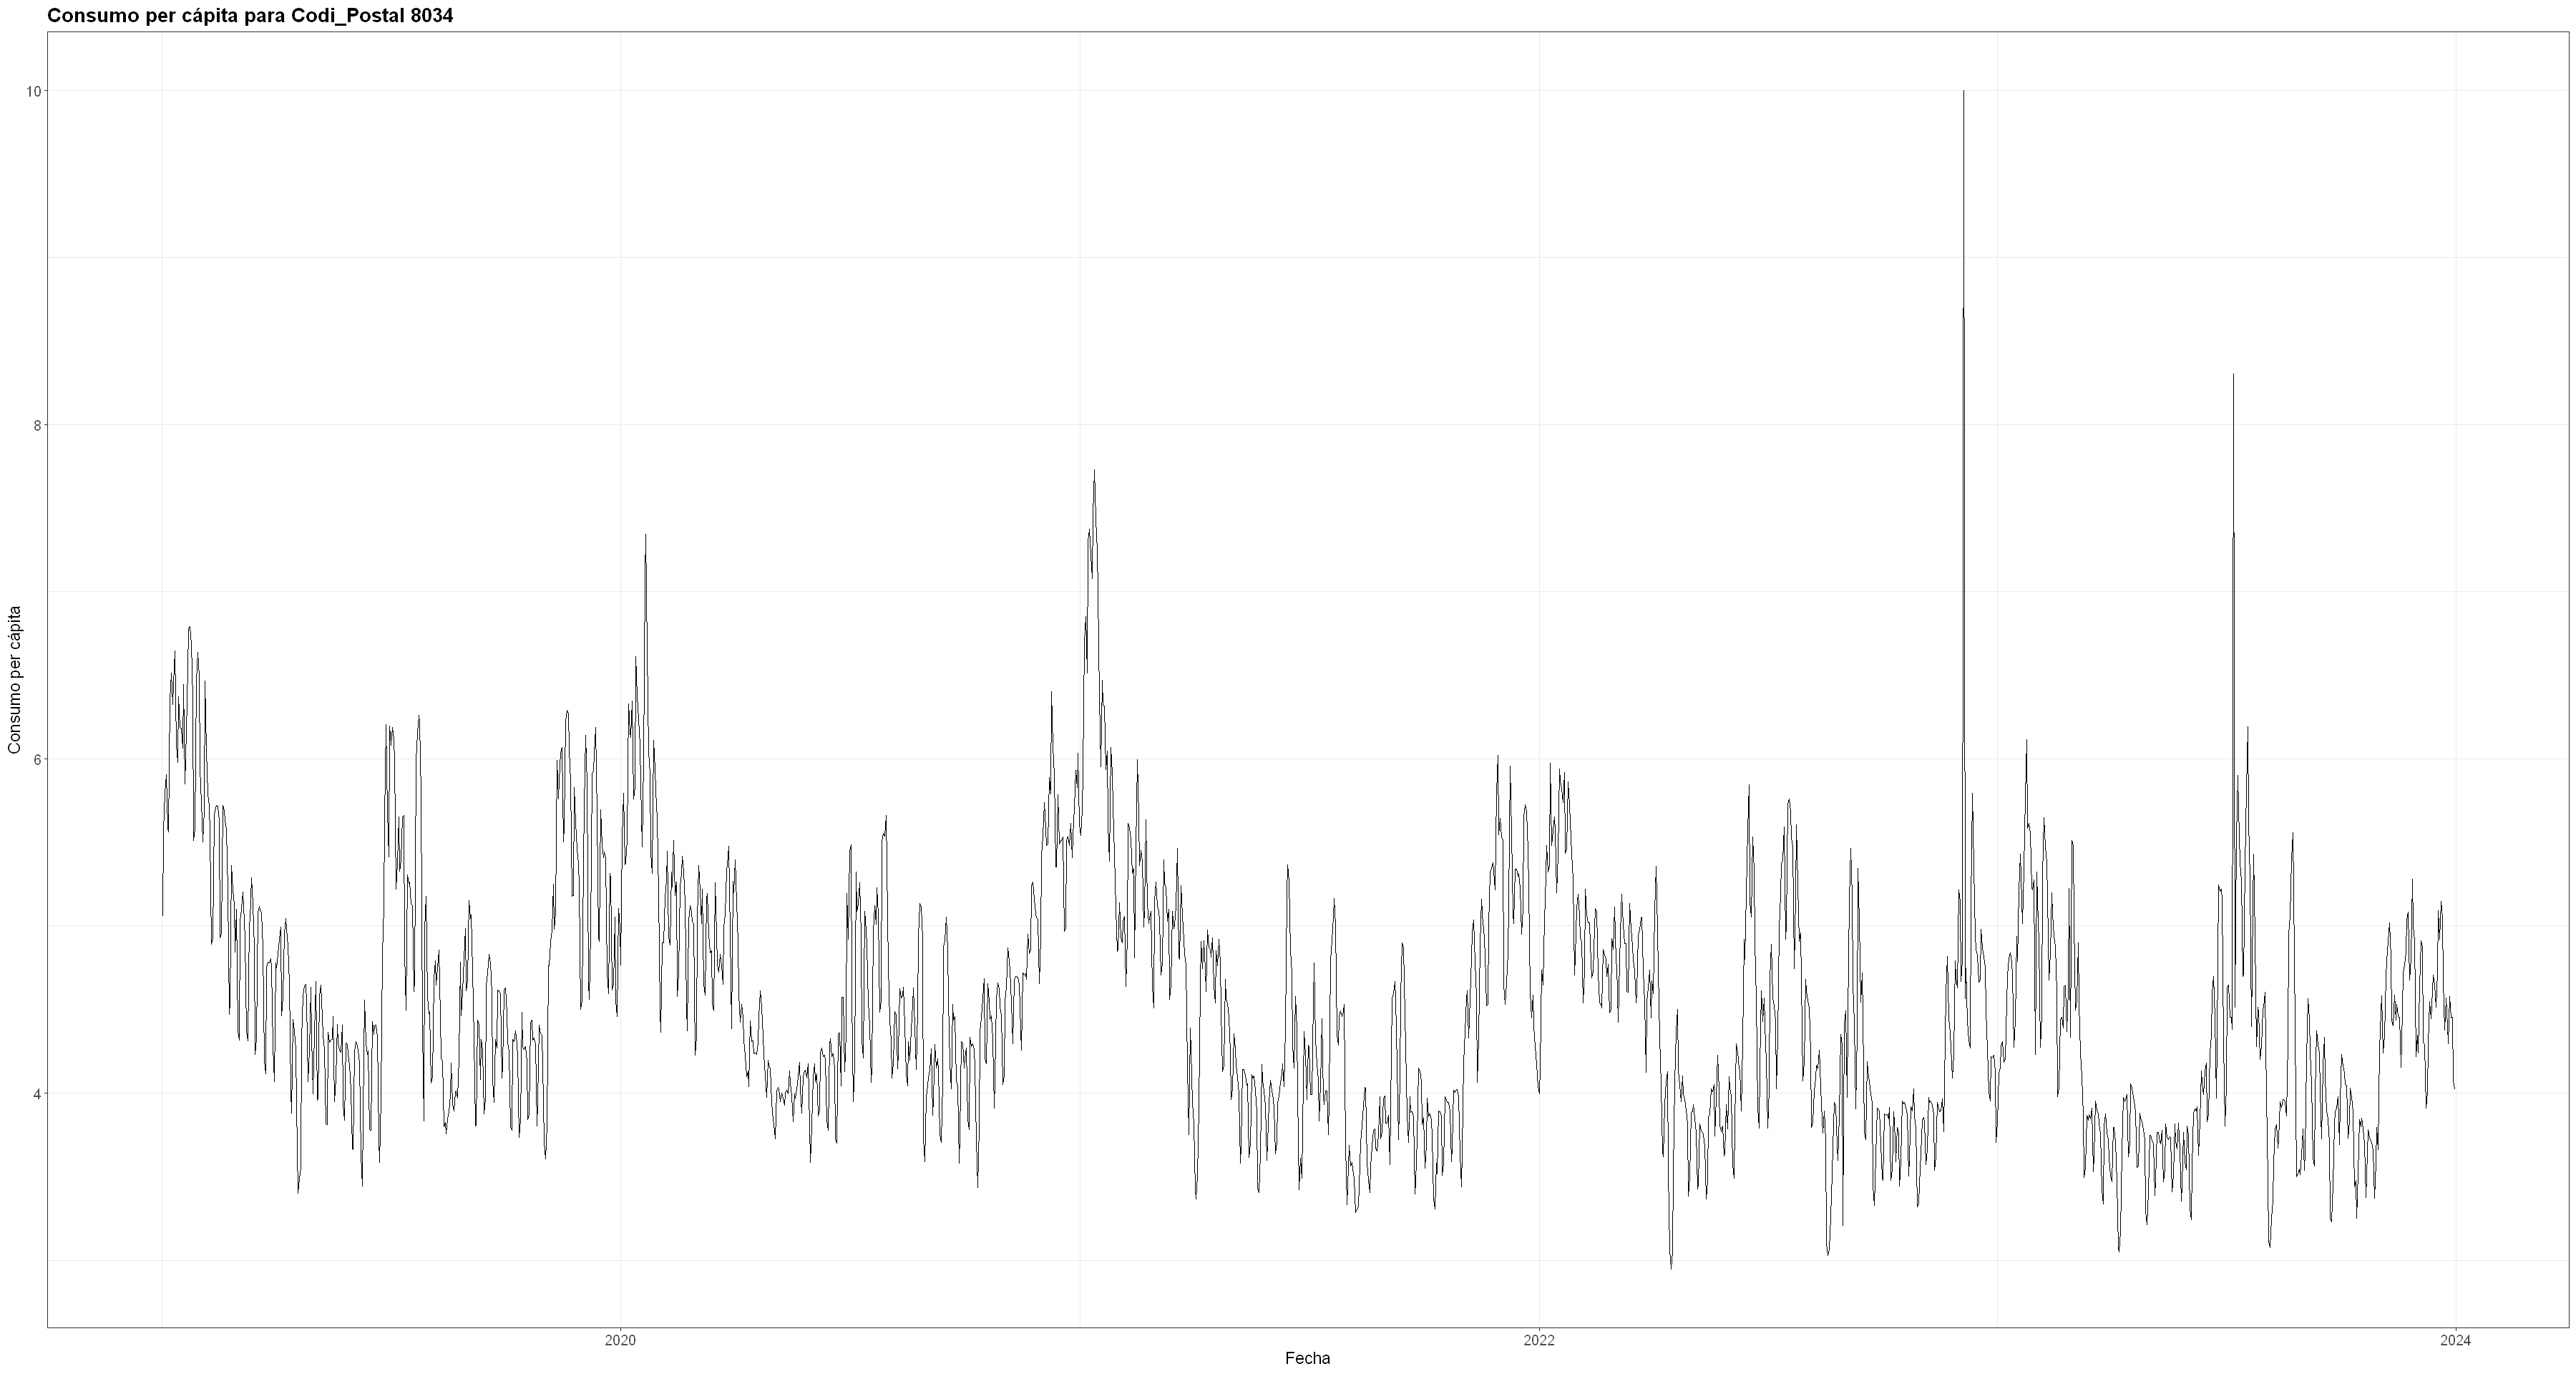

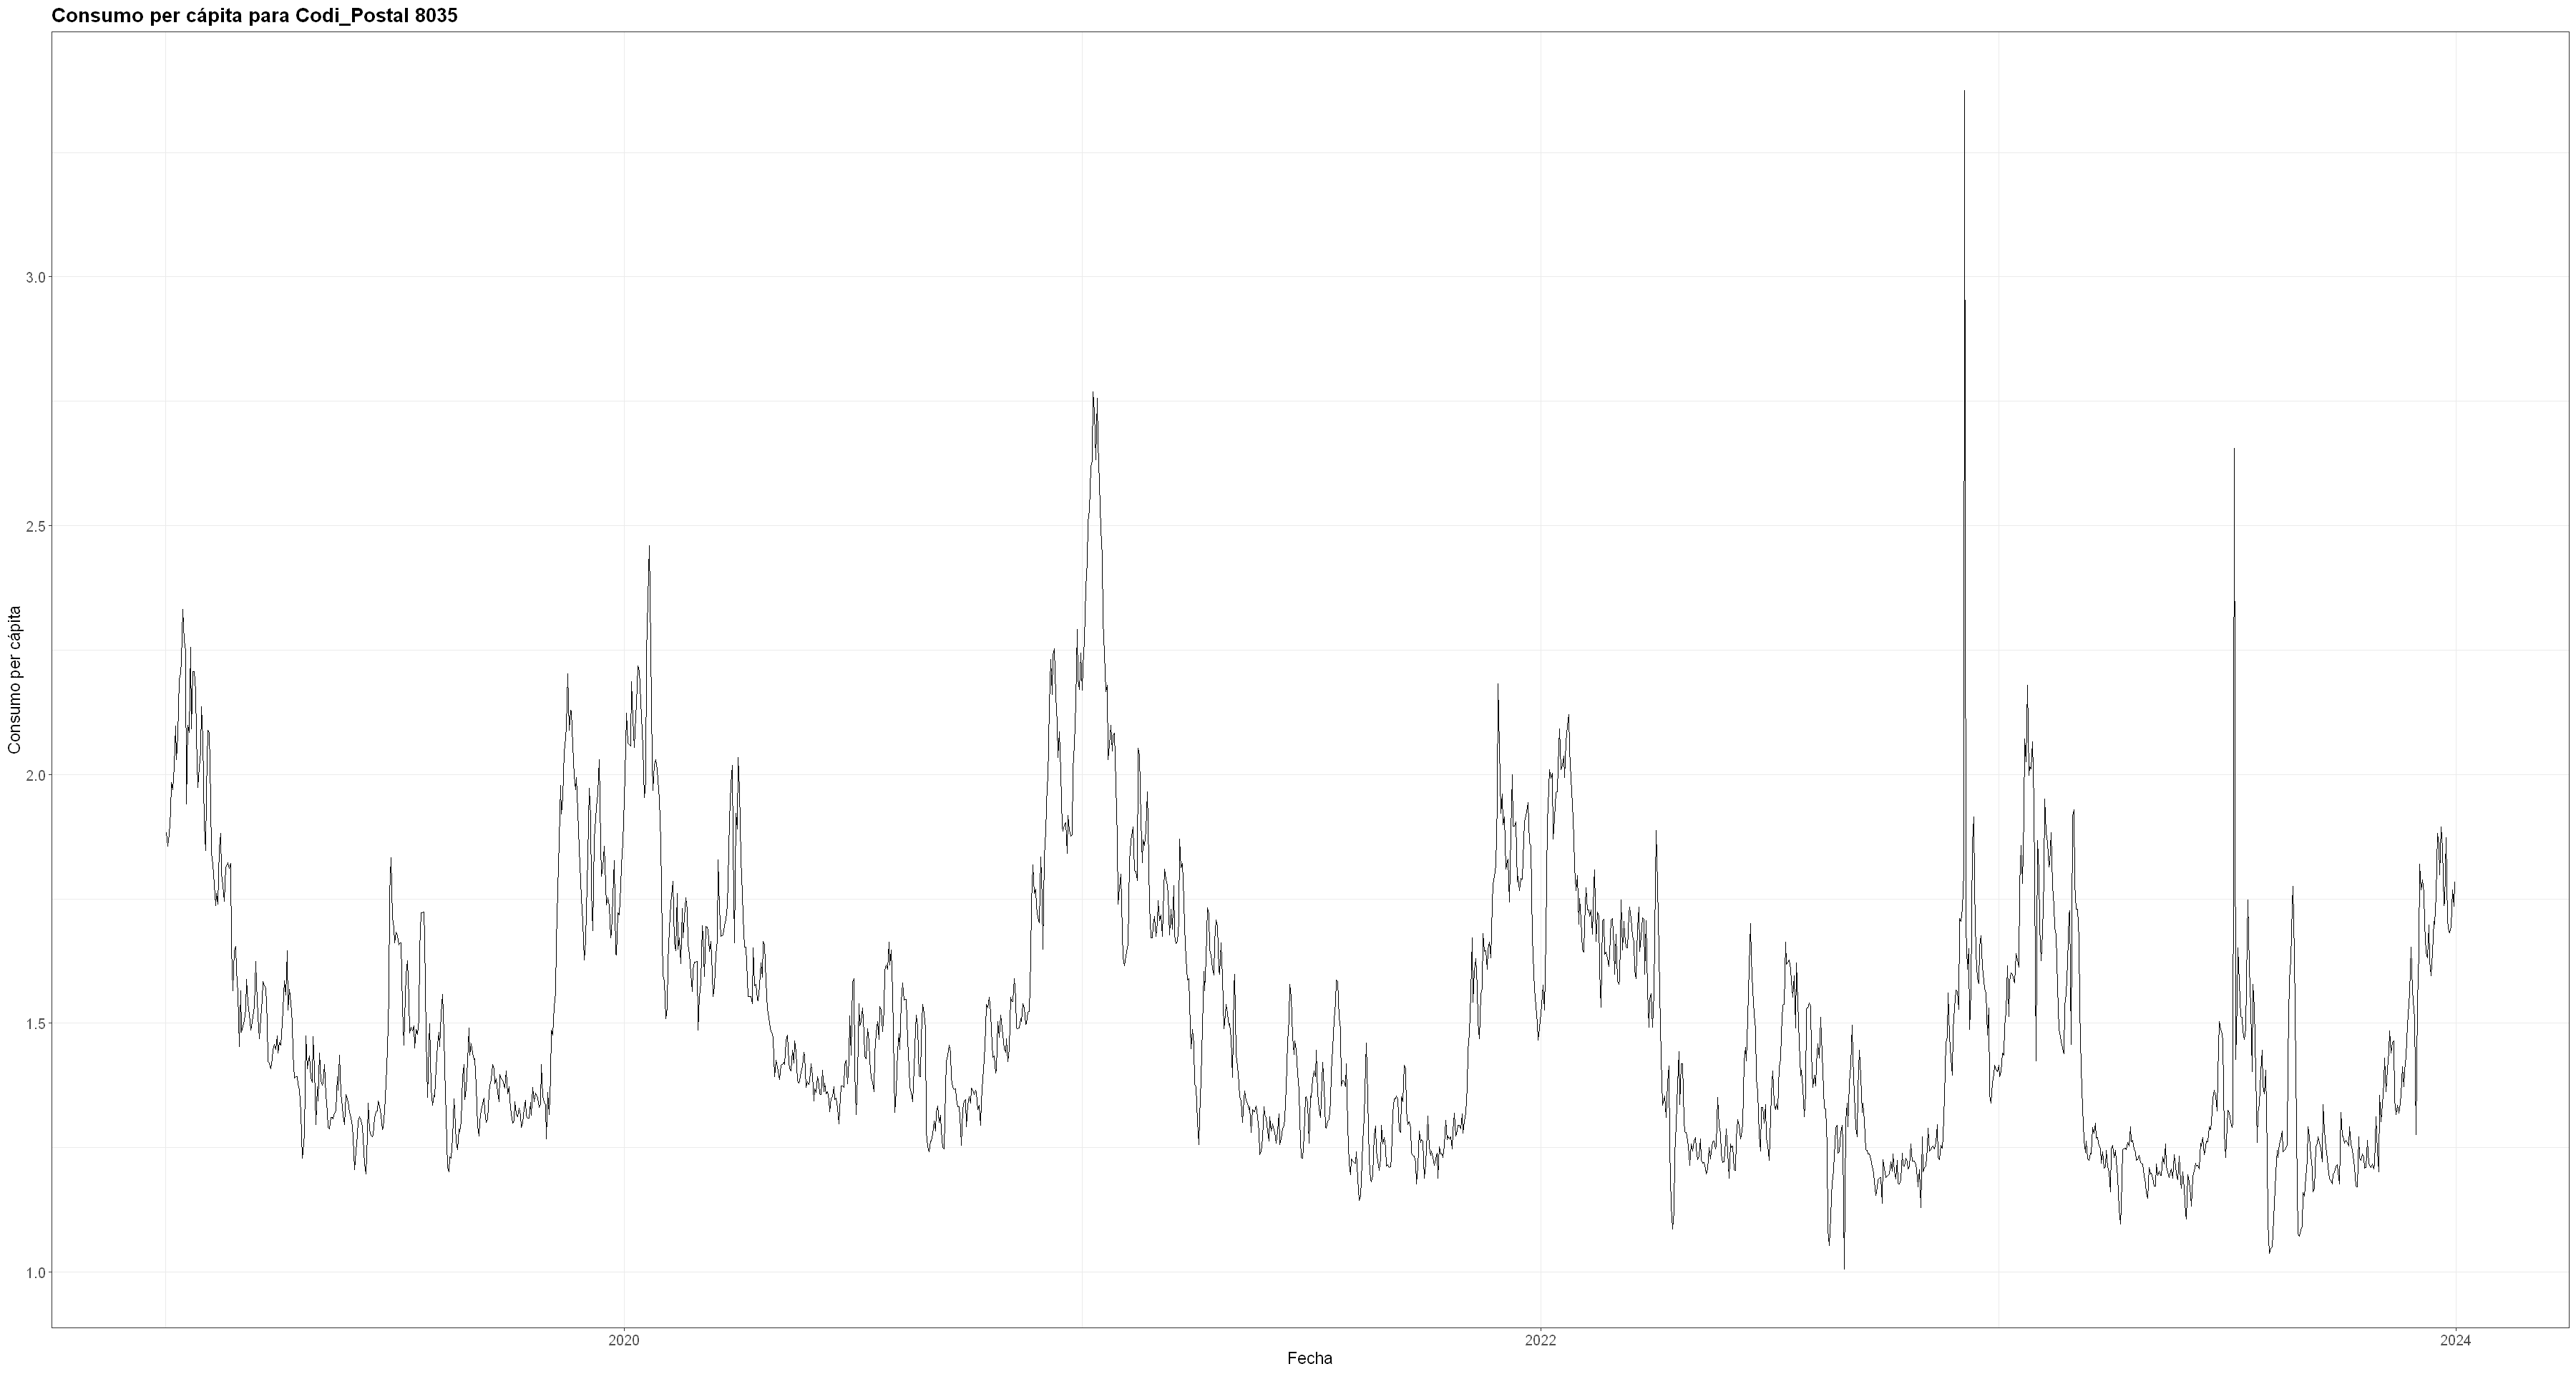

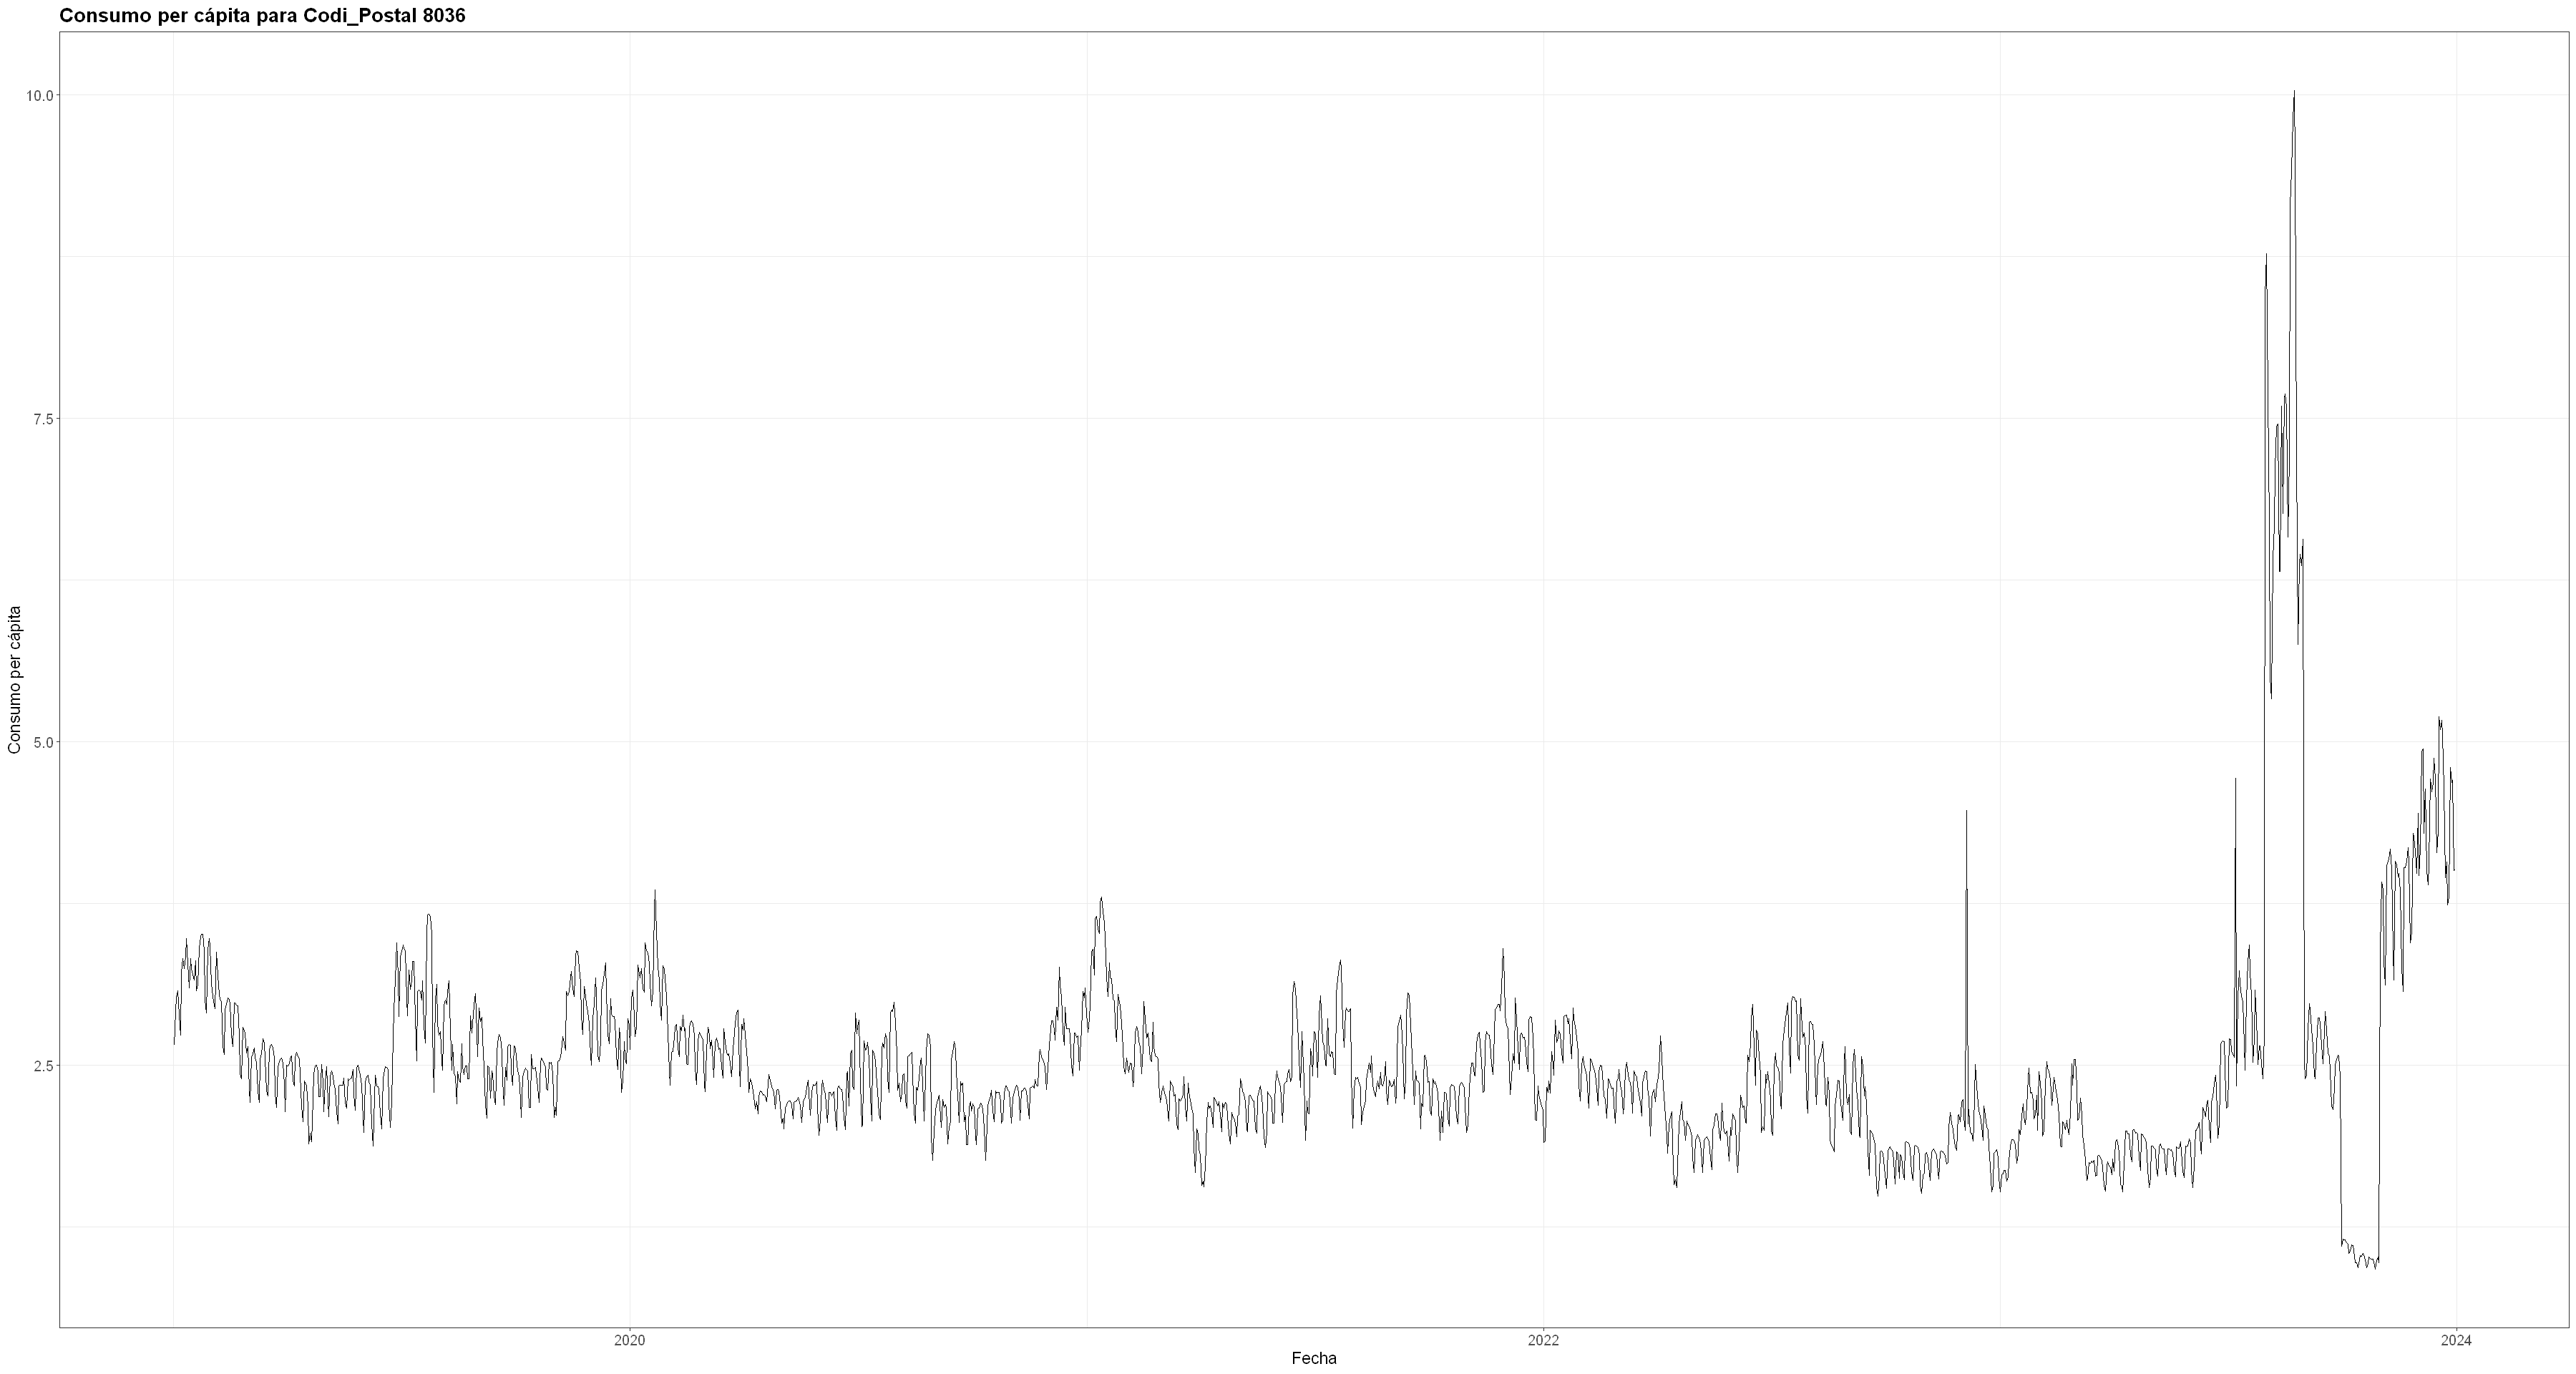

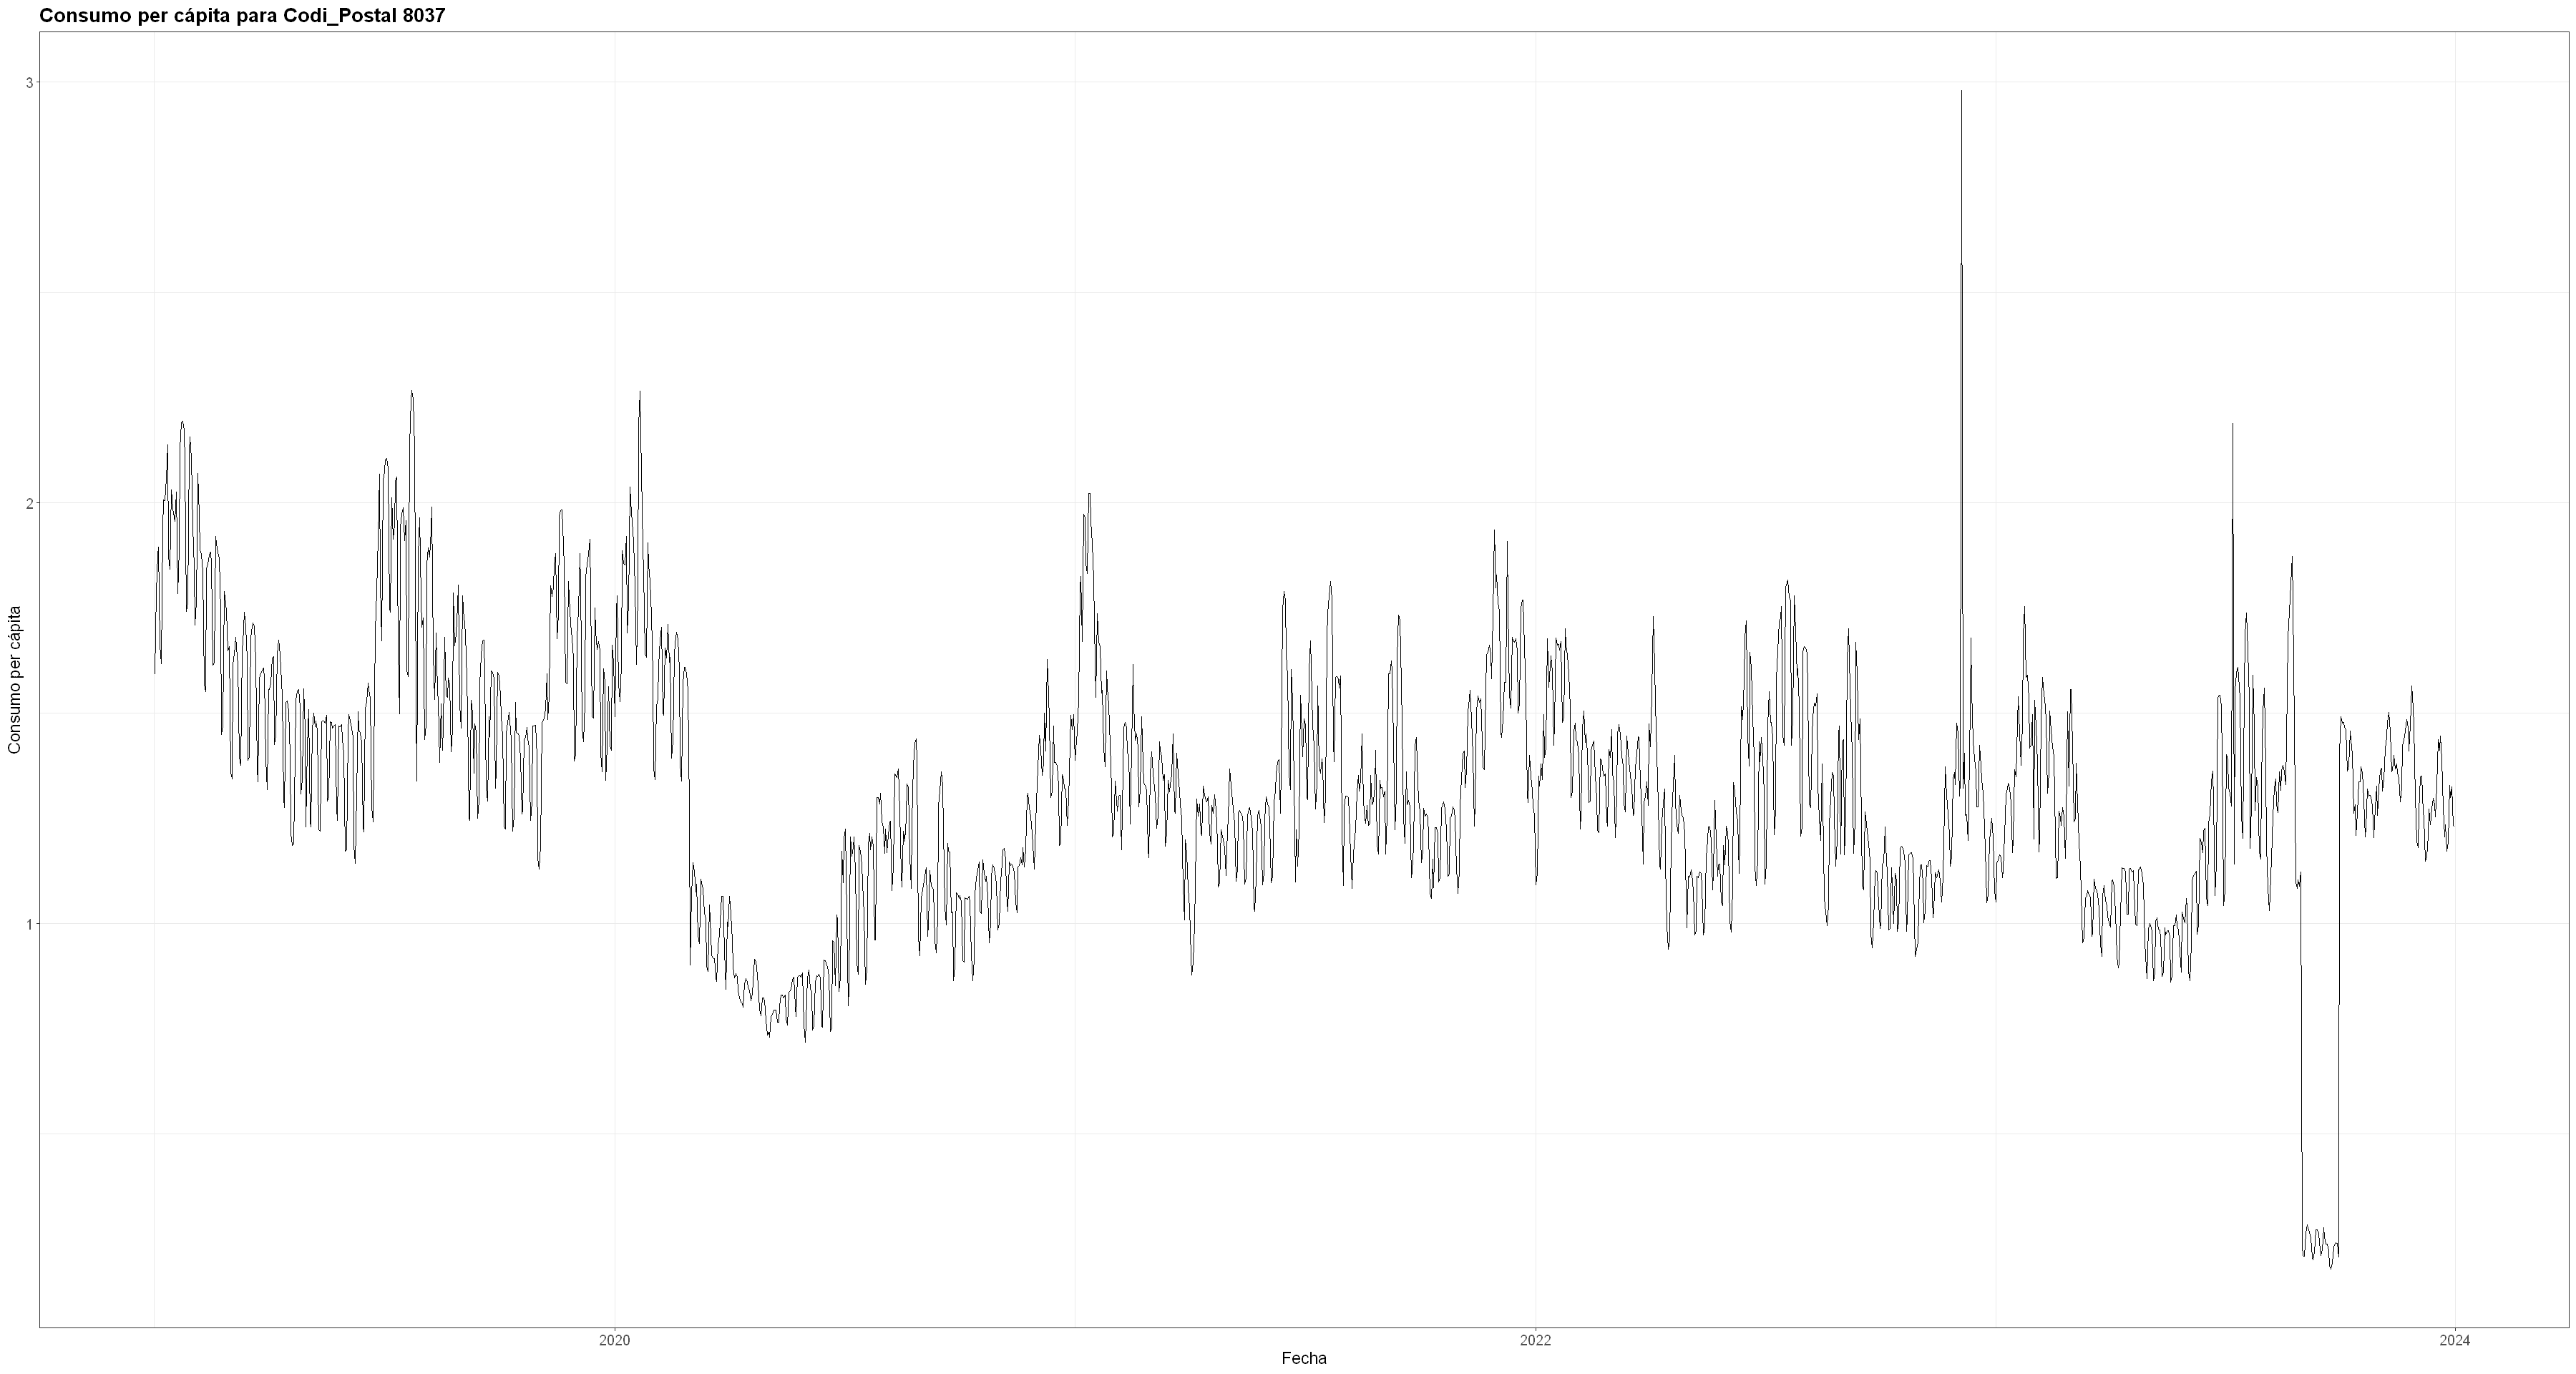

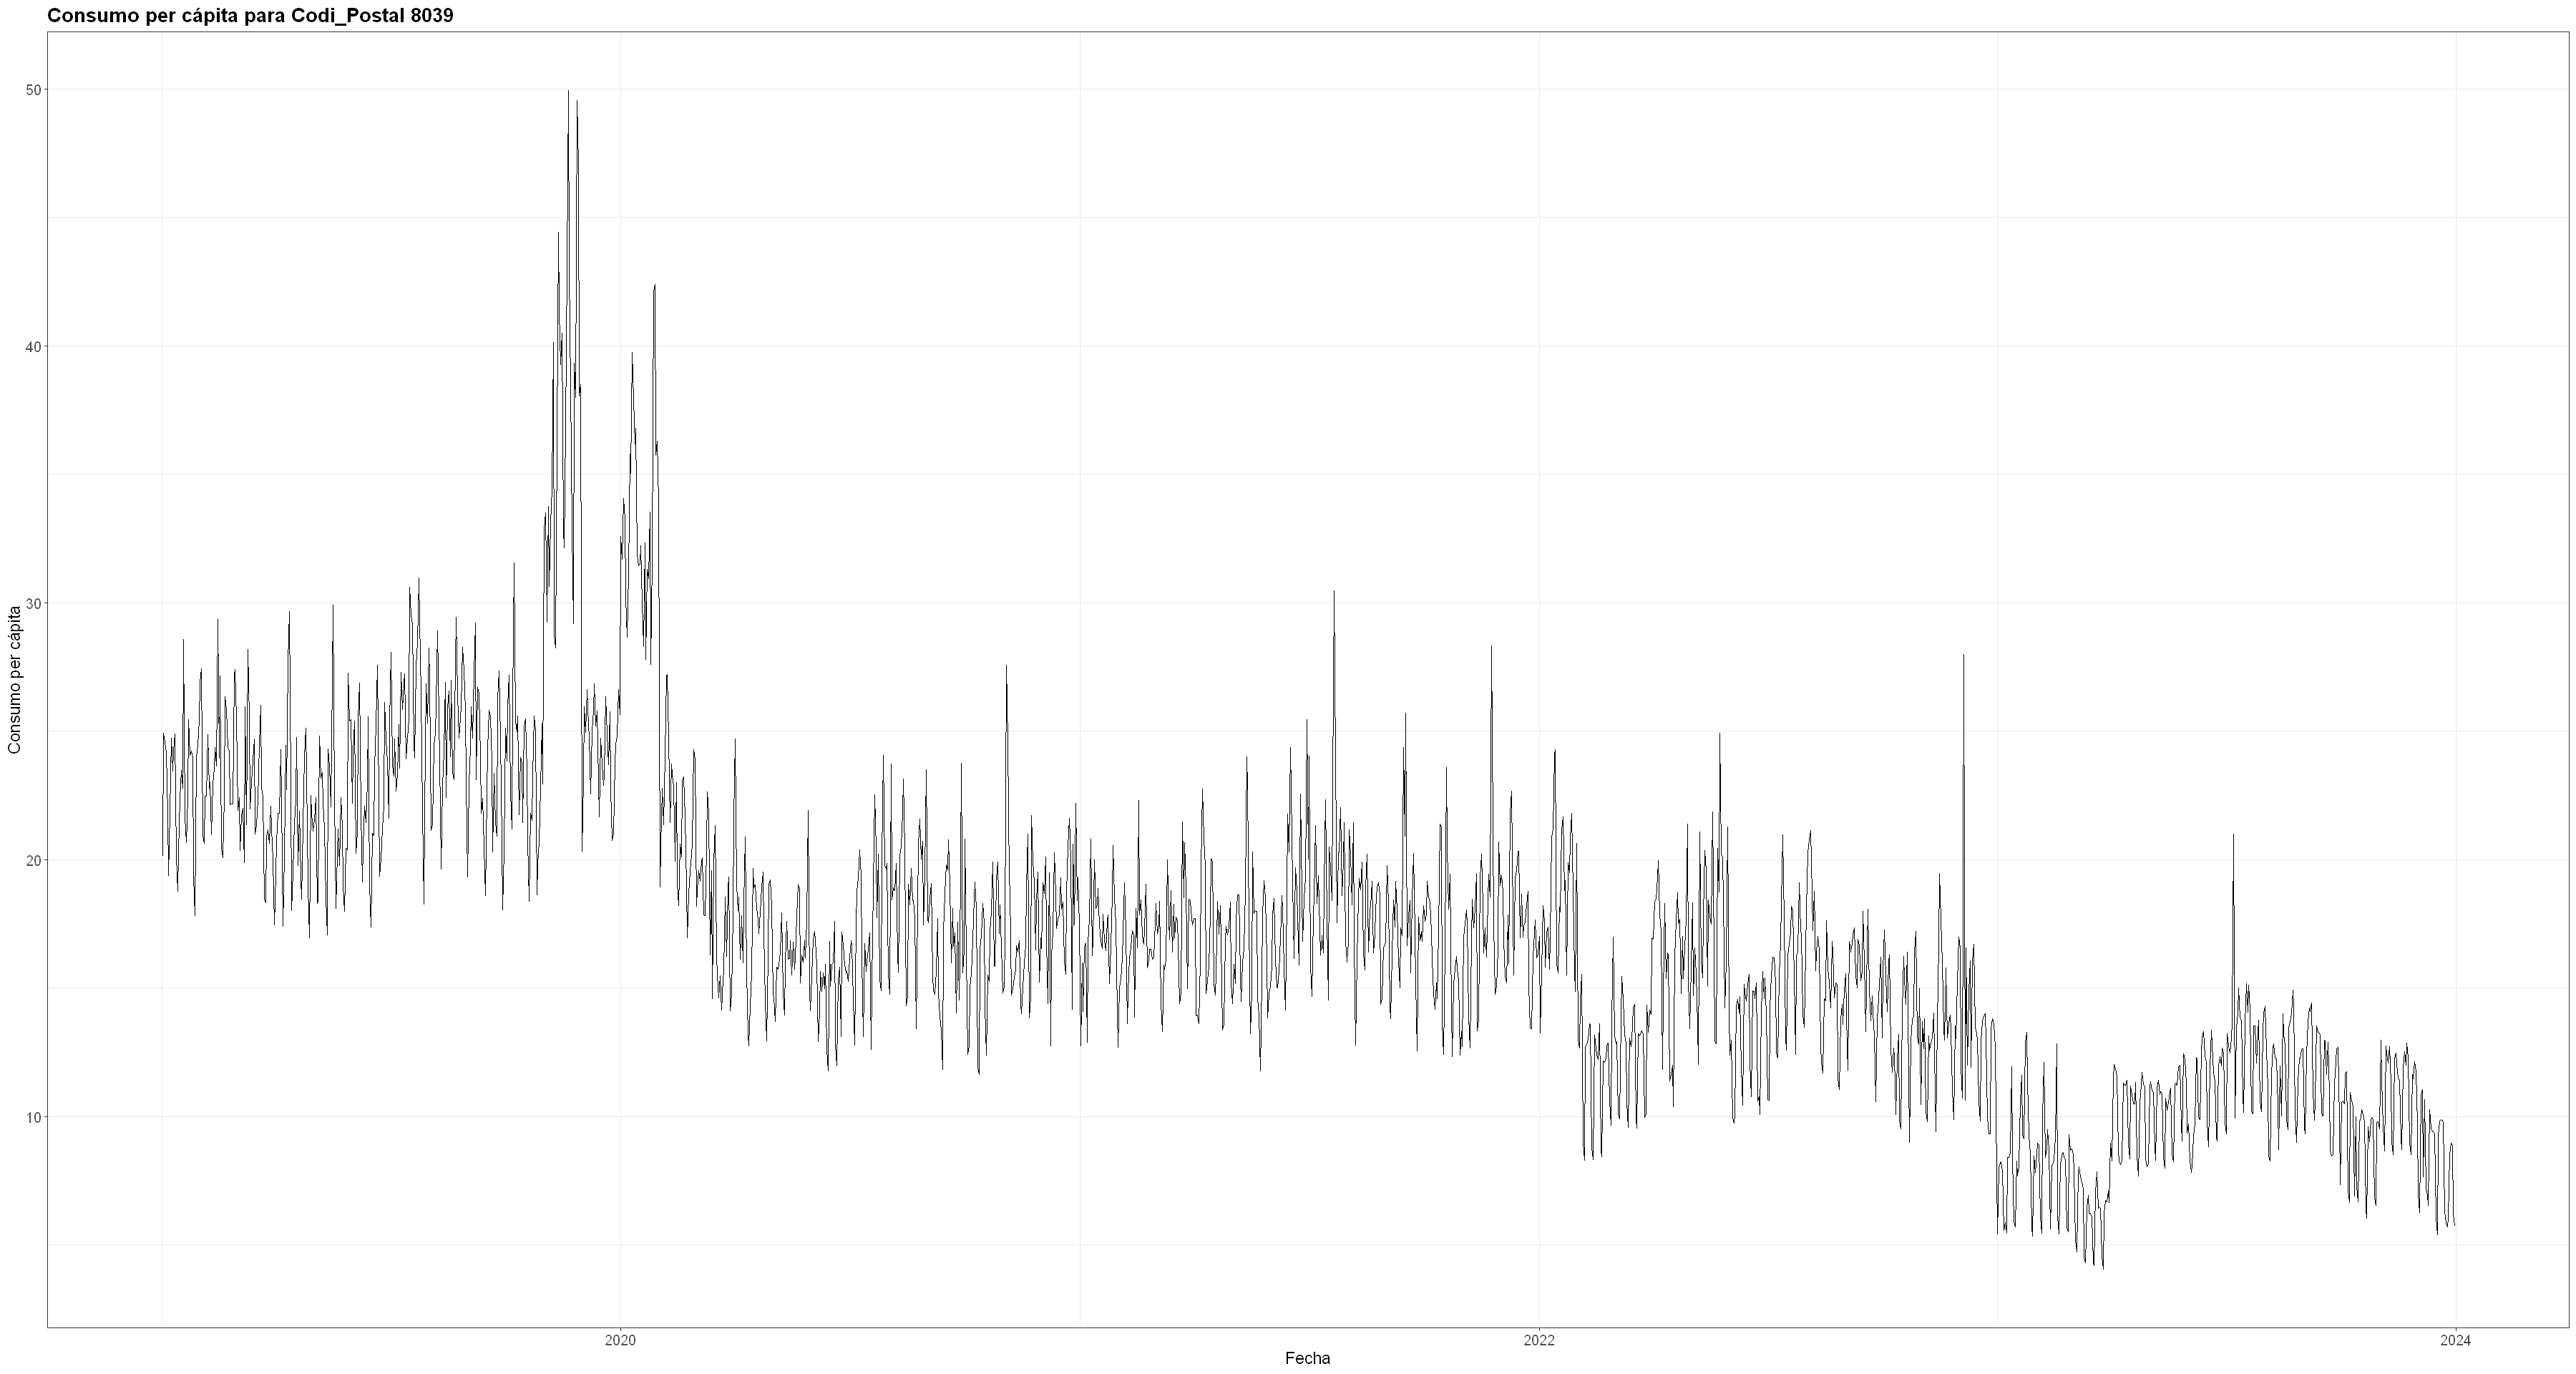

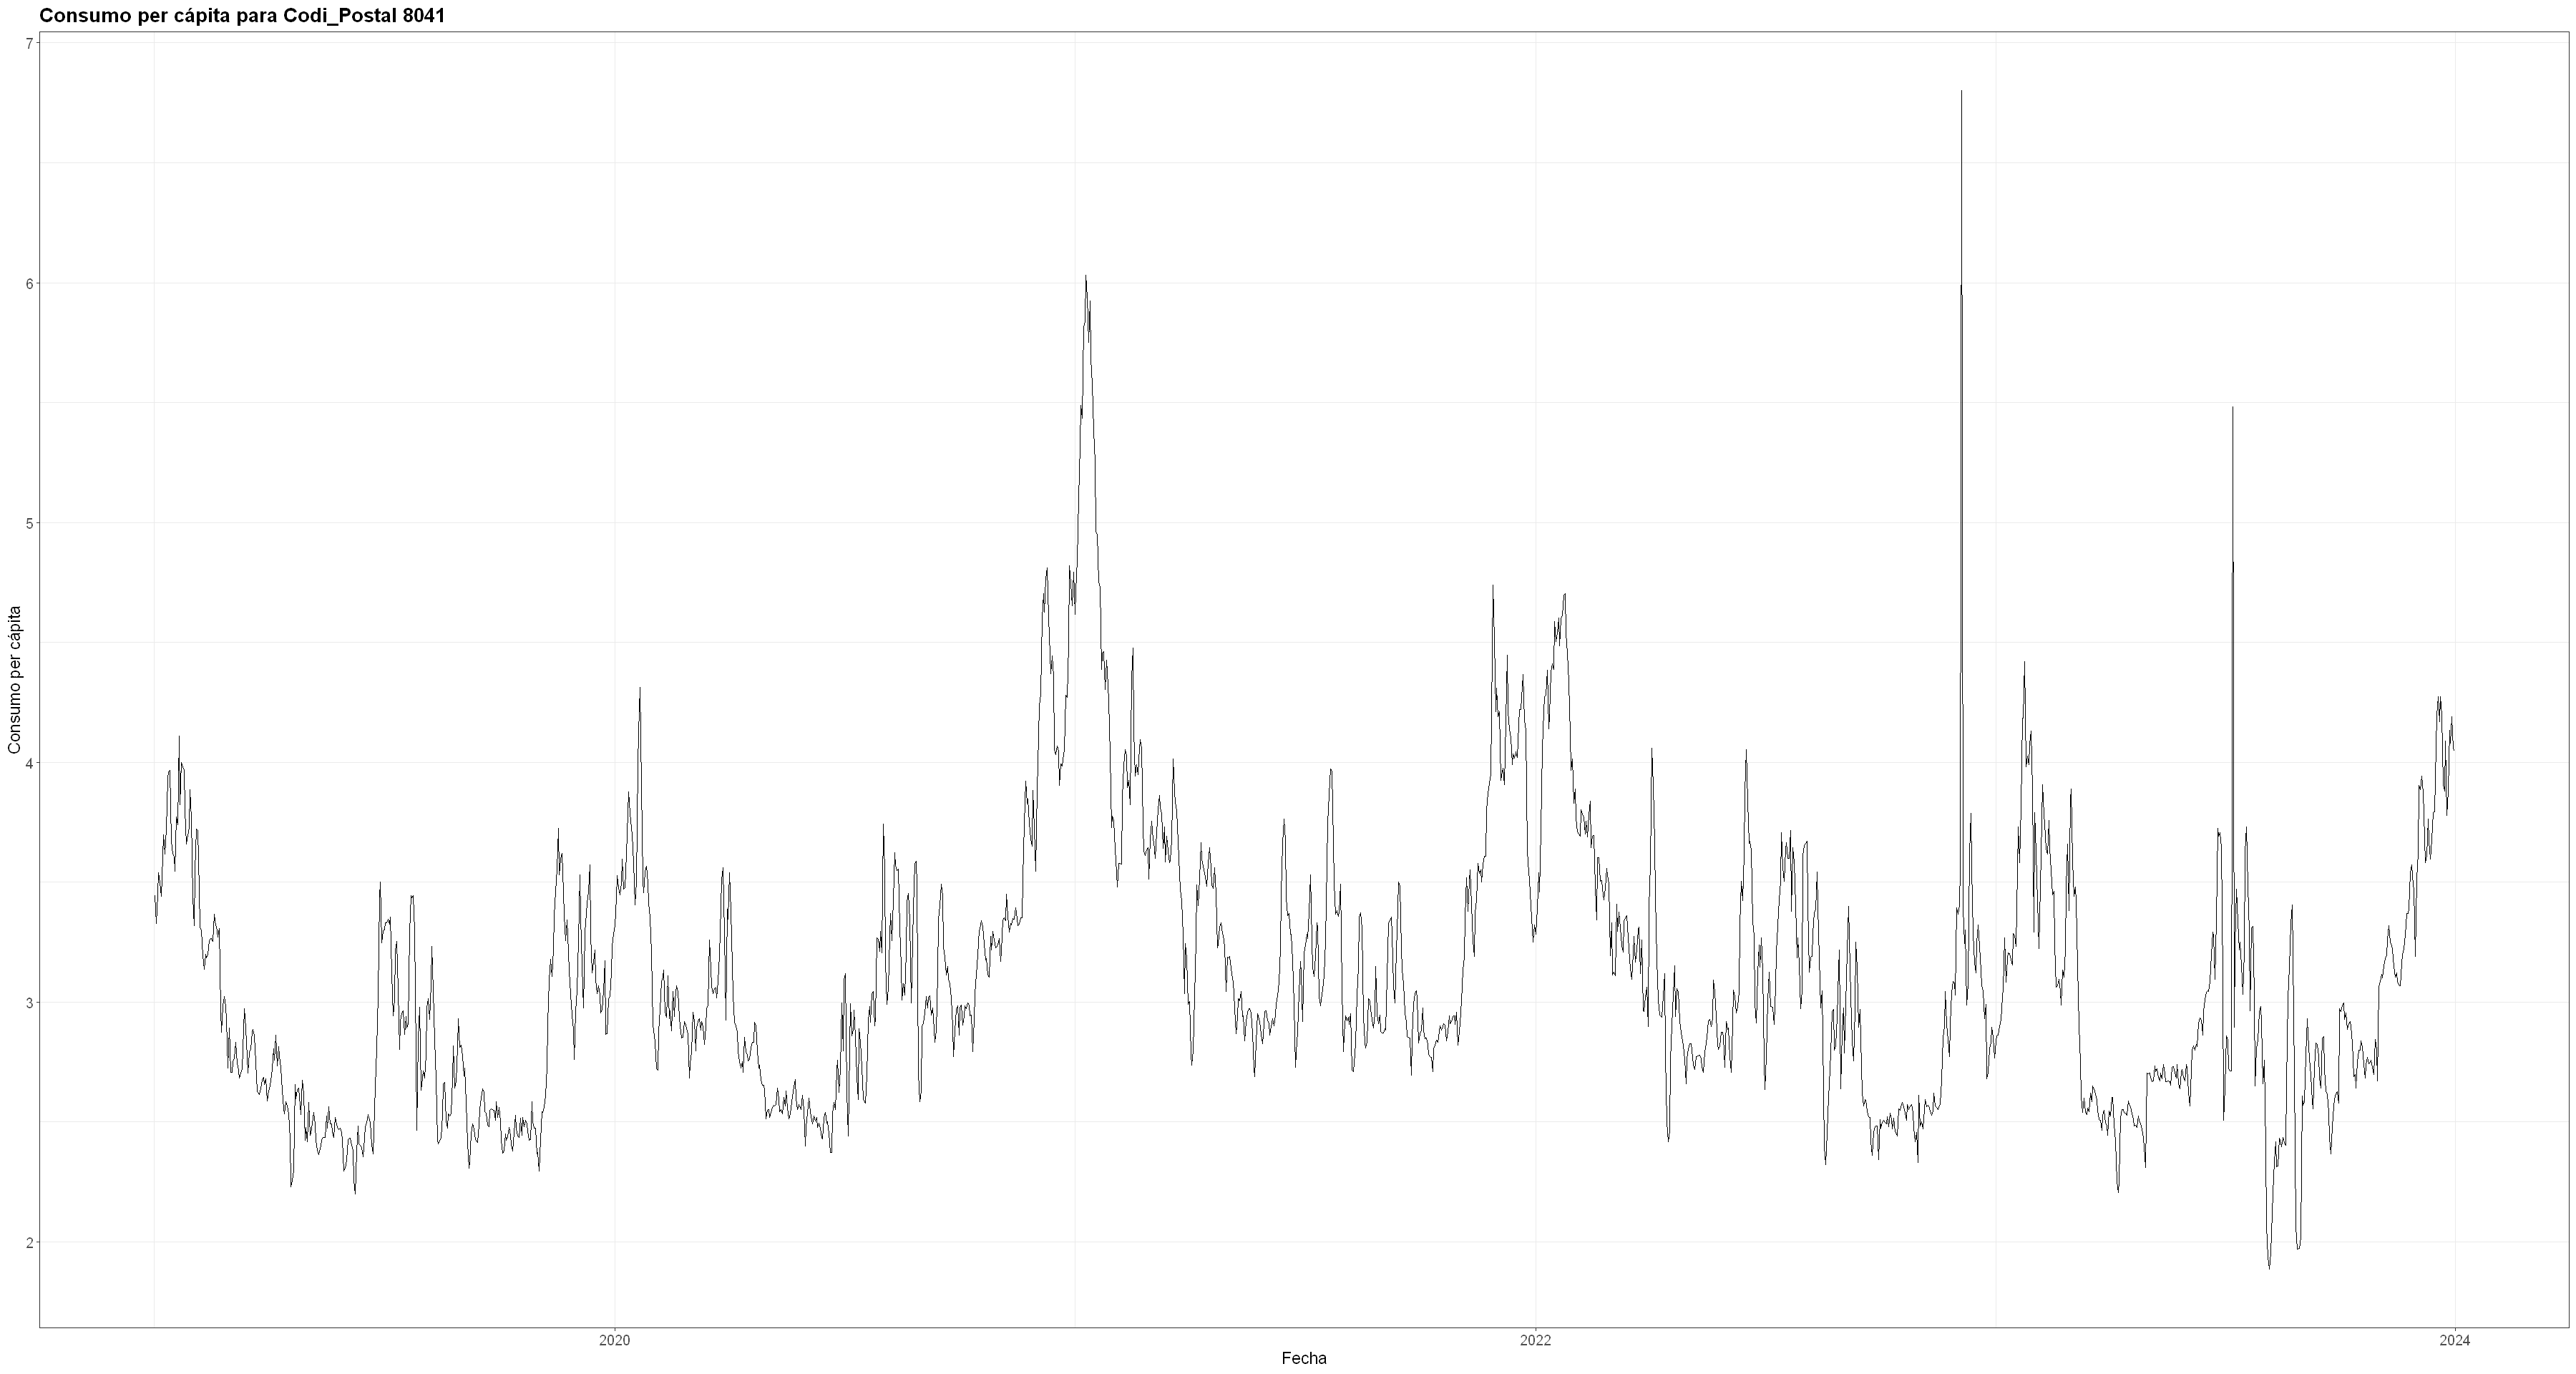

In [244]:
library(ggplot2)
library(dplyr)

# Define una función para generar el gráfico para un código postal específico
generar_grafico <- function(codigo_postal) {
  # Filtrar datos para el código postal dado
  datos_cp <- aggregated_data2 %>% 
    filter(Codi_Postal == codigo_postal)
  
  # Crear el gráfico de líneas
  ggplot(data = datos_cp, aes(x = Data, y = consumo_per_capita)) +
    geom_line() +
    labs(x = "Fecha", y = "Consumo per cápita", 
         title = paste("Consumo per cápita para Codi_Postal", codigo_postal)) +
    theme_bw() + 
    theme(
      plot.title = element_text(size = 16, face = "bold"),  
      axis.title = element_text(size = 14),  
      axis.text = element_text(size = 12),   
      legend.title = element_text(size = 12),  
      legend.text = element_text(size = 10)    
    )
}

# Lista de códigos postales que deseas analizar
codigos_postales <- c(8001, 8002, 8003, 8004, 8005, 8013, 8014, 8015, 8017, 8018, 8019, 8020,
 8021, 8023, 8024, 8025, 8026, 8027, 8028, 8030, 8031, 8034, 8035, 8036, 8037, 8039, 8041)  # Agrega los códigos postales que desees aquí

# Generar y mostrar el gráfico para cada código postal en la lista
for (cp in codigos_postales) {
  print(generar_grafico(cp))
}


In [245]:
library(dplyr)

# Calcular la media del consumo por código postal
consumo_medio_por_cp <- aggregated_data2 %>%
  group_by(Codi_Postal) %>%
  summarise(media_consumo = mean(consumo_per_capita))

# Ordenar los códigos postales de acuerdo con su consumo medio de mayor a menor
consumo_medio_ordenado <- consumo_medio_por_cp %>%
  arrange(desc(media_consumo))

# Mostrar los códigos postales ordenados por consumo medio de mayor a menor
head(consumo_medio_ordenado)

Codi_Postal,media_consumo
<int>,<dbl>
8039,17.141711
8018,12.969442
8013,7.712161
8002,6.795242
8026,4.787115
8034,4.557459


## <font color='#5CCD3A'>**4. Datos socioeconomicos por Barrios**</font>

In [246]:
# Cargar la librería writexl
library(writexl)
alquiler <- read_excel("cp2.xlsx")
#datos <- read_xlsx("alquiler_m2.xlsx")
#head(datos)
head(alquiler)

Barris,Codi_Postal,alquiler_m2,superficie_m2,alquiler_prom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1. el Raval,8001,15.0,65,975.0
2. el Barri Gòtic,8002,15.7,84,1318.8
3. la Barceloneta,8003,18.3,57,1043.1
"4. Sant Pere, Santa Caterina i la Ribera",8003,16.7,71,1185.7
5. el Fort Pienc,8013,15.3,76,1162.8
6. la Sagrada Família,8025,16.0,70,1120.0


## <font color='#5CCD3A'>**5. Producto para el area de Marketing**</font>

In [247]:
library(forecast)
library(dplyr)

# Define una función para ajustar el modelo ARIMA y hacer predicciones para un código postal específico
generar_predicciones_arima <- function(codigo_postal) {
  # Filtrar datos para el código postal dado
  datos_cp <- aggregated_data2 %>% 
    filter(Codi_Postal == codigo_postal)
  
  # Convertir la columna Data a tipo de dato fecha
  datos_cp$Data <- as.Date(datos_cp$Data)
  
  # Crear una serie temporal con los datos
  ts_data_cp <- ts(datos_cp$consumo_per_capita, frequency = 1)
  
  # Ajustar el modelo ARIMA a los datos
  arima_model_cp <- auto.arima(ts_data_cp)
  
  # Hacer predicciones para 2024
  predictions_2024_cp <- forecast(arima_model_cp, h = 90)  # Predicciones para los próximos 3 meses
  
  # Calcular la media de las predicciones
  mean_prediction <- mean(predictions_2024_cp$mean)
  
  # Crear un data frame con el código postal y la media de las predicciones
  df_result <- data.frame(Codi_Postal = codigo_postal, media_predicciones = mean_prediction)
  
  # Devolver el data frame
  return(df_result)
}

# Lista de códigos postales 
codigos_postales <- c(8001, 8002, 8003, 8004, 8005, 8013, 8014, 8015, 8017, 8018, 8019, 8020,
                      8021, 8023, 8024, 8025, 8026, 8027, 8028, 8030, 8031, 8034, 8035, 8036, 
                      8037, 8039, 8041)  # Agrega los códigos postales que desees aquí

# Generar un data frame para almacenar los resultados
resultados_df <- data.frame(Codi_Postal = numeric(), media_predicciones = numeric())

# Generar y calcular la media de las predicciones ARIMA para cada código postal en la lista
for (cp in codigos_postales) {
  # Generar predicciones y almacenar resultados en el data frame
  resultados_df <- rbind(resultados_df, generar_predicciones_arima(cp))
}

# Imprimir el data frame con los resultados
head(resultados_df)

,Codi_Postal,media_predicciones
,<dbl>,<dbl>
1,8001,1.622636
2,8002,6.532700
3,8003,4.292171
4,8004,3.715033
5,8005,3.362461
6,8013,7.020897


In [248]:
tabla_alquiler <- merge(alquiler ,resultados_df, by = "Codi_Postal")
head(tabla_alquiler)

,Codi_Postal,Barris,alquiler_m2,superficie_m2,alquiler_prom,media_predicciones
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,8001,1. el Raval,15.0,65,975.0,1.622636
2,8001,10. Sant Antoni,15.3,76,1162.8,1.622636
3,8002,2. el Barri Gòtic,15.7,84,1318.8,6.532700
4,8003,3. la Barceloneta,18.3,57,1043.1,4.292171
5,8003,"4. Sant Pere, Santa Caterina i la Ribera",16.7,71,1185.7,4.292171
6,8004,11. el Poble Sec - AEI Parc Montjuïc,15.7,61,957.7,3.715033


In [249]:
# Multiplicar la columna media_predicciones por la columna poblacion
# Primero, combina las dos tablas por la columna Codi_Postal
tabla_combinada <- merge(merged_data2, resultados_df, by = "Codi_Postal")

# Realiza la multiplicación
tabla_combinada$producto <- tabla_combinada$media_predicciones * tabla_combinada$poblacion

# Mostrar la tabla resultante
print(tabla_combinada)


   Codi_Postal                                           Barris poblacion
1         8001                                      1. el Raval     47986
2         8001                                  10. Sant Antoni     38412
3         8002                                2. el Barri Gòtic     16240
4         8003         4. Sant Pere, Santa Caterina i la Ribera     22923
5         8003                                3. la Barceloneta     15101
6         8004             11. el Poble Sec - AEI Parc Montjuïc     40358
7         8005                67. la Vila Olímpica del Poblenou      9404
8         8005                                  68. el Poblenou     33931
9         8013                                 5. el Fort Pienc     32048
10        8014                                   16. la Bordeta     18561
11        8014                                  15. Hostafrancs     15949
12        8014                                17. Sants - Badal     24047
13        8014                        

In [251]:
str(tabla_alquiler)
str(tabla_combinada)

head(tabla_alquiler)
head(tabla_combinada)

'data.frame':	72 obs. of  6 variables:
 $ Codi_Postal       : num  8001 8001 8002 8003 8003 ...
 $ Barris            : chr  "1. el Raval  " " 10. Sant Antoni  " "2. el Barri Gòtic  " "3. la Barceloneta  " ...
 $ alquiler_m2       : num  15 15.3 15.7 18.3 16.7 15.7 20 17 15.3 15.3 ...
 $ superficie_m2     : num  65 76 84 57 71 61 82 68 76 66 ...
 $ alquiler_prom     : num  975 1163 1319 1043 1186 ...
 $ media_predicciones: num  1.62 1.62 6.53 4.29 4.29 ...
'data.frame':	72 obs. of  5 variables:
 $ Codi_Postal       : num  8001 8001 8002 8003 8003 ...
 $ Barris            : chr  "1. el Raval" "10. Sant Antoni" "2. el Barri Gòtic" "4. Sant Pere, Santa Caterina i la Ribera" ...
 $ poblacion         : num  47986 38412 16240 22923 15101 ...
 $ media_predicciones: num  1.62 1.62 6.53 4.29 4.29 ...
 $ producto          : num  77864 62329 106091 98389 64816 ...


,Codi_Postal,Barris,alquiler_m2,superficie_m2,alquiler_prom,media_predicciones
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,8001,1. el Raval,15.0,65,975.0,1.622636
2,8001,10. Sant Antoni,15.3,76,1162.8,1.622636
3,8002,2. el Barri Gòtic,15.7,84,1318.8,6.532700
4,8003,3. la Barceloneta,18.3,57,1043.1,4.292171
5,8003,"4. Sant Pere, Santa Caterina i la Ribera",16.7,71,1185.7,4.292171
6,8004,11. el Poble Sec - AEI Parc Montjuïc,15.7,61,957.7,3.715033


,Codi_Postal,Barris,poblacion,media_predicciones,producto
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,8001,1. el Raval,47986,1.622636,77863.82
2,8001,10. Sant Antoni,38412,1.622636,62328.70
3,8002,2. el Barri Gòtic,16240,6.532700,106091.04
4,8003,"4. Sant Pere, Santa Caterina i la Ribera",22923,4.292171,98389.43
5,8003,3. la Barceloneta,15101,4.292171,64816.07
6,8004,11. el Poble Sec - AEI Parc Montjuïc,40358,3.715033,149931.32


In [252]:
# Eliminar columna utilizando subset()
tabla_alquiler <- subset(tabla_alquiler, select = -media_predicciones)


In [253]:
head(tabla_alquiler)
head(tabla_combinada)

,Codi_Postal,Barris,alquiler_m2,superficie_m2,alquiler_prom
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,8001,1. el Raval,15.0,65,975.0
2,8001,10. Sant Antoni,15.3,76,1162.8
3,8002,2. el Barri Gòtic,15.7,84,1318.8
4,8003,3. la Barceloneta,18.3,57,1043.1
5,8003,"4. Sant Pere, Santa Caterina i la Ribera",16.7,71,1185.7
6,8004,11. el Poble Sec - AEI Parc Montjuïc,15.7,61,957.7


,Codi_Postal,Barris,poblacion,media_predicciones,producto
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,8001,1. el Raval,47986,1.622636,77863.82
2,8001,10. Sant Antoni,38412,1.622636,62328.70
3,8002,2. el Barri Gòtic,16240,6.532700,106091.04
4,8003,"4. Sant Pere, Santa Caterina i la Ribera",22923,4.292171,98389.43
5,8003,3. la Barceloneta,15101,4.292171,64816.07
6,8004,11. el Poble Sec - AEI Parc Montjuïc,40358,3.715033,149931.32


In [277]:
# Supongamos que tienes un dataframe llamado df

# Opción 1: Utilizando la función seq()
tabla_alquiler$ID <- seq(1, nrow(tabla_alquiler))
tabla_combinada$ID <- seq(1, nrow(tabla_combinada))

# Opción 2: Utilizando la secuencia de filas del dataframe
tabla_alquiler$ID <- 1:nrow(tabla_alquiler)
tabla_combinada$ID <- 1:nrow(tabla_combinada)

# Mostrar el dataframe con la nueva columna ID
head(tabla_alquiler)
head(tabla_combinada)


,Codi_Postal,Barris,alquiler_m2,superficie_m2,alquiler_prom,ID
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,8001,1. el Raval,15.0,65,975.0,1
2,8001,10. Sant Antoni,15.3,76,1162.8,2
3,8002,2. el Barri Gòtic,15.7,84,1318.8,3
4,8003,3. la Barceloneta,18.3,57,1043.1,4
5,8003,"4. Sant Pere, Santa Caterina i la Ribera",16.7,71,1185.7,5
6,8004,11. el Poble Sec - AEI Parc Montjuïc,15.7,61,957.7,6


,Codi_Postal,Barris,poblacion,media_predicciones,producto,ID
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,8001,1. el Raval,47986,1.622636,77863.82,1
2,8001,10. Sant Antoni,38412,1.622636,62328.70,2
3,8002,2. el Barri Gòtic,16240,6.532700,106091.04,3
4,8003,"4. Sant Pere, Santa Caterina i la Ribera",22923,4.292171,98389.43,4
5,8003,3. la Barceloneta,15101,4.292171,64816.07,5
6,8004,11. el Poble Sec - AEI Parc Montjuïc,40358,3.715033,149931.32,6


Realizamos match entre las tablas resultantes, como por la variable "Barris" nos crea problemas y gracias al analisis hecho evidenciamos que las tablas estan distribuidas igual, se crea una tabla ID para las dos y de este modo realizamos el match

In [278]:
# Unir las tablas por la columna Codi_Postal

tabla_final <- merge(tabla_combinada,tabla_alquiler, by = "ID")
head(tabla_final)

,ID,Codi_Postal.x,Barris.x,poblacion,media_predicciones,producto,Codi_Postal.y,Barris.y,alquiler_m2,superficie_m2,alquiler_prom
,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1,8001,1. el Raval,47986,1.622636,77863.82,8001,1. el Raval,15.0,65,975.0
2,2,8001,10. Sant Antoni,38412,1.622636,62328.70,8001,10. Sant Antoni,15.3,76,1162.8
3,3,8002,2. el Barri Gòtic,16240,6.532700,106091.04,8002,2. el Barri Gòtic,15.7,84,1318.8
4,4,8003,"4. Sant Pere, Santa Caterina i la Ribera",22923,4.292171,98389.43,8003,3. la Barceloneta,18.3,57,1043.1
5,5,8003,3. la Barceloneta,15101,4.292171,64816.07,8003,"4. Sant Pere, Santa Caterina i la Ribera",16.7,71,1185.7
6,6,8004,11. el Poble Sec - AEI Parc Montjuïc,40358,3.715033,149931.32,8004,11. el Poble Sec - AEI Parc Montjuïc,15.7,61,957.7


Acomodamos el dateframe para que no tenga columnas repetidas y tengan bien su nombre

In [282]:
# Eliminar columna utilizando subset()
tabla_final <- subset(tabla_final, select = -Codi_Postal.y)
tabla_final <- subset(tabla_final, select = -Barris.y)

# Supongamos que deseas cambiar el nombre de la columna "Barris" a "Barrios" en tu data frame
names(tabla_final)[names(tabla_final) == "Codi_Postal.x"] <- "Codi_Postal"
names(tabla_final)[names(tabla_final) == "Barris.x"] <- "Barris"
names(tabla_final)[names(tabla_final) == "producto"] <- "media_consumo_barrios"
# Mostrar el data frame con el nombre de columna cambiado
head(tabla_final)



,ID,Codi_Postal,Barris,poblacion,media_predicciones,media_consumo_barrios,alquiler_m2,superficie_m2,alquiler_prom
,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,8001,1. el Raval,47986,1.622636,77863.82,15.0,65,975.0
2,2,8001,10. Sant Antoni,38412,1.622636,62328.70,15.3,76,1162.8
3,3,8002,2. el Barri Gòtic,16240,6.532700,106091.04,15.7,84,1318.8
4,4,8003,"4. Sant Pere, Santa Caterina i la Ribera",22923,4.292171,98389.43,18.3,57,1043.1
5,5,8003,3. la Barceloneta,15101,4.292171,64816.07,16.7,71,1185.7
6,6,8004,11. el Poble Sec - AEI Parc Montjuïc,40358,3.715033,149931.32,15.7,61,957.7


In [283]:
# Carga la librería
library(openxlsx)

# Escribir el dataframe en un archivo xlsx
write.xlsx(tabla_final, "ConsumoElectricidad.xlsx")

# Mensaje de confirmación
cat("El archivo ConsumoElectricidad.xlsx se ha creado exitosamente.")


El archivo ConsumoElectricidad.xlsx se ha creado exitosamente.